# DATA MINING PROJECT - PREDICTING DEPRESSION

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [63]:
raw_df=pd.read_csv("Depression.csv", sep = ",")
raw_df

SEQN     Depression  Gender  Age                   Race  Citizenship  \
0       31131  Not Depressed  Female   44                  Black      Citizen   
1       31132  Not Depressed    Male   70                  White      Citizen   
2       31134  Not Depressed    Male   73                  White      Citizen   
3       31139  Not Depressed  Female   18         Other Hispanic      Citizen   
4       31143  Not Depressed    Male   19                  White      Citizen   
...       ...            ...     ...  ...                    ...          ...   
36254  102949  Not Depressed    Male   33                  White      Citizen   
36255  102952  Not Depressed  Female   70  Other and Multiracial      Citizen   
36256  102953  Not Depressed    Male   42                Mexican  Not Citizen   
36257  102954  Not Depressed  Female   41                  Black      Citizen   
36258  102956  Not Depressed    Male   38                  White      Citizen   

                 Education Level Marital Status  Household Size Pregnant  ...  \
0      Some College or AA Degree        Married               4       No  ...   
1      College Graduate or Above        Married               2  Missing  ...   
2                    High School        Married               2  Missing  ...   
3                        Missing  Never Married               3       No  ...   
4                        Missing  Never Married               3  Missing  ...   
...                          ...            ...             ...      ...  ...   
36254                High School        Partner               5  Missing  ...   
36255                High School        Married               2  Missing  ...   
36256                High School      Separated               1  Missing  ...   
36257  College Graduate or Above  Never Married               7       No  ...   
36258  Some College or AA Degree       Divorced               5  Missing  ...   

      Rx Insulin Regular Rx Days Insulin Regular Rx Memantine  \
0                     No                     0.0           No   
1                     No                     0.0           No   
2                     No                     0.0           No   
3                     No                     0.0           No   
4                     No                     0.0           No   
...                  ...                     ...          ...   
36254                 No                     0.0           No   
36255                 No                     0.0           No   
36256                 No                     0.0           No   
36257                 No                     0.0           No   
36258                 No                     0.0           No   

      Rx Days Memantine  Rx Diphenhydramine Rx Days Diphenhydramine  \
0                   0.0                  No                     0.0   
1                   0.0                  No                     0.0   
2                   0.0                  No                     0.0   
3                   0.0                  No                     0.0   
4                   0.0                  No                     0.0   
...                 ...                 ...                     ...   
36254               0.0                  No                     0.0   
36255               0.0                  No                     0.0   
36256               0.0                  No                     0.0   
36257               0.0                  No                     0.0   
36258               0.0                  No                     0.0   

      Rx Minocycline Rx Days Minocycline Rx Methocarbamol  \
0                 No                 0.0               No   
1                 No                 0.0               No   
2                 No                 0.0               No   
3                 No                 0.0               No   
4                 No                 0.0               No   
...              ...                 ...              ...   
36

In [64]:
raw_df.shape

(36259, 492)

## DATA SELECTION AND REDUCTION

### Dimensionality Reduction

In [65]:
df=raw_df[["Gender","Age","Race","Education Level","Marital Status","Pregnant","Household Income","Asthma","Anemia","Ever Overweight","Blood Transfusion","Arthritis","Heart Failure","Heart Disease","Angina","Heart Attack","Stroke","Emphysema","Bronchitis","Thyroid Problem","Cancer","Heart Attack Relative","Asthma Relative","Diabetes Relative","Hay Fever","Weight","Height","BMI","Pulse","Irregular Pulse","Systolic","Diastolic","Total Cholesterol","HDL","Triglycerides","LDL","Albumin","ALT","AST","ALP","BUN","Calcium","CO2","Creatinine","GGT","Glucose","Iron","LHD","Phosphorus","Bilirubin","Total Protein","Uric Acid","Sodium","Potassium","Chloride","Osmolality","Globulin","White BCC","Lymphocyte Percent","Monocyte Percent","Neutrophils Percent","Eosinophils Percent","Basophils Percent","Lymphocyte Count","Monocyte Count","Neutrophils Count","Eosinophils Count","Basophils Count","RBC Count","Hemoglobin","Hematocrit","MCV","MCH","MCHC","RDW","Platelet Count","MPV","Trouble Sleeping History","Sleep Hours","Vigorous Recreation","Moderate Recreation","Vigorous Work","Moderate Work","Cant Work","Limited Work","Memory Problems","Health Problem Bone Or Joint","Health Problem Weight","Health Problem Back Or Neck","Health Problem Breathing","Health Problem Mental Retardation","Health Problem Hearing","Health Problem Vision","Health Problem Diabetes","Health Problem Birth Defect","Health Problem Senility","Marijuana Use","Cocaine Use","Heroine Use","Meth Use","Inject Drugs","Rehab Program","Current Smoker","Household Smokers","Depression"]]
df

Gender  Age                   Race            Education Level  \
0      Female   44                  Black  Some College or AA Degree   
1        Male   70                  White  College Graduate or Above   
2        Male   73                  White                High School   
3      Female   18         Other Hispanic                    Missing   
4        Male   19                  White                    Missing   
...       ...  ...                    ...                        ...   
36254    Male   33                  White                High School   
36255  Female   70  Other and Multiracial                High School   
36256    Male   42                Mexican                High School   
36257  Female   41                  Black  College Graduate or Above   
36258    Male   38                  White  Some College or AA Degree   

      Marital Status Pregnant Household Income Asthma Anemia Ever Overweight  \
0            Married       No            $75K+     No     No              No   
1            Married  Missing            $75K+     No     No              No   
2            Married  Missing       Below $25K     No     No             Yes   
3      Never Married       No            $75K+    Yes     No             Yes   
4      Never Married  Missing            $75K+     No     No              No   
...              ...      ...              ...    ...    ...             ...   
36254        Partner  Missing       Below $35K     No     No              No   
36255        Married  Missing       Below $20K     No     No              No   
36256      Separated  Missing       Below $25K    Yes     No             Yes   
36257  Never Married       No       Below $75K     No     No             Yes   
36258       Divorced  Missing       Below $45K     No     No             Yes   

       ... Health Problem Senility Marijuana Use Cocaine Use Heroine Use  \
0      ...                      No            No          No          No   
1      ...                      No            No          No          No   
2      ...                      No            No          No          No   
3      ...                      No            No          No          No   
4      ...                      No            No          No          No   
...    ...                     ...           ...         ...         ...   
36254  ...                      No           Yes         Yes          No   
36255  ...                      No            No          No          No   
36256  ...                      No            No          No          No   
36257  ...                      No            No          No          No   
36258  ...                      No           Yes          No          No   

      Meth Use Inject Drugs Rehab Program Current Smoker Household Smokers  \
0           No           No            No        Missing                 4   
1           No           No            No        Missing                 4   
2           No           No            No        Missing                 4   
3           No           No            No        Missing                 1   
4           No           No            No        Missing                 4   
...        ...          ...           ...            ...               ...   
36254      Yes           No           Yes      Every Day                 2   
36255       No           No            No        Missing                 0   
36256       No           No            No          Never                 0   
36257       No           No            No        Missing                 0   
36258       No           No            No      Every Day                 1   

          Depression  
0      Not Depressed  
1      Not Depressed  
2      Not Depressed  
3      Not Depressed  
4      Not Depressed  
...              ...  
36254  Not Depressed  
36255  Not Depressed  
36256  Not Depressed  
36257  Not Depressed  
36258  Not Depressed  

[36259 rows x 105 columns]

In [5]:
df.shape

(36259, 105)

# VISUALIZATION

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36259 entries, 0 to 36258
Data columns (total 105 columns):
 #    Column                             Dtype  
---   ------                             -----  
 0    Gender                             object 
 1    Age                                int64  
 2    Race                               object 
 3    Education Level                    object 
 4    Marital Status                     object 
 5    Pregnant                           object 
 6    Household Income                   object 
 7    Asthma                             object 
 8    Anemia                             object 
 9    Ever Overweight                    object 
 10   Blood Transfusion                  object 
 11   Arthritis                          object 
 12   Heart Failure                      object 
 13   Heart Disease                      object 
 14   Angina                             object 
 15   Heart Attack                       object 
 16   St

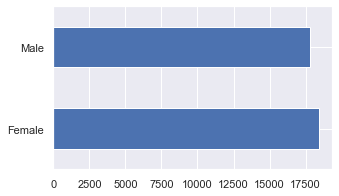

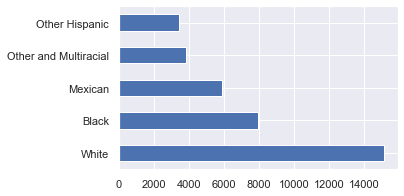

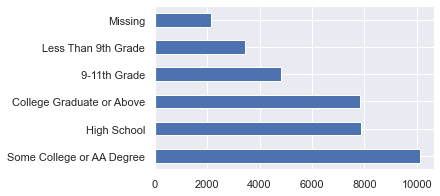

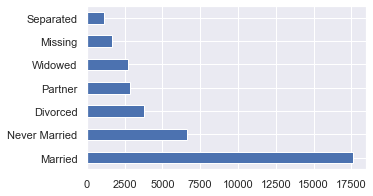

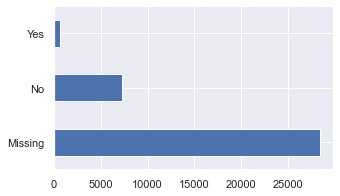

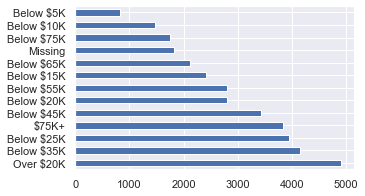

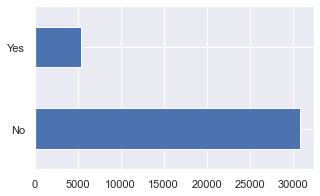

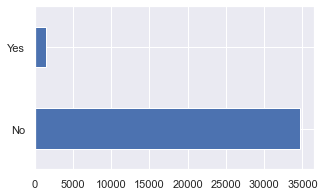

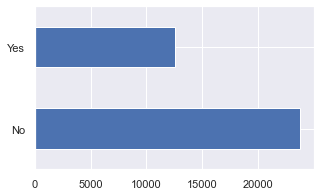

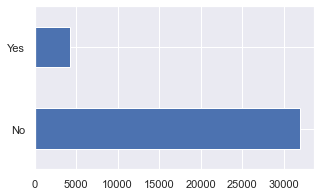

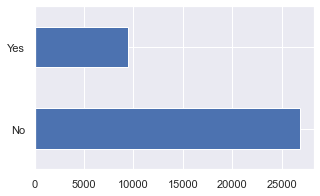

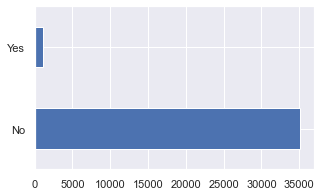

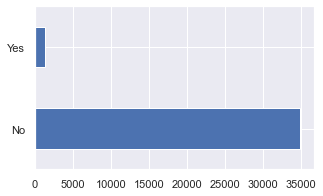

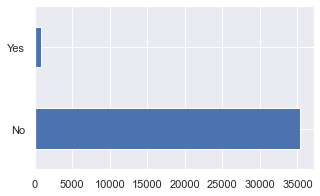

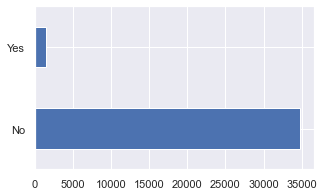

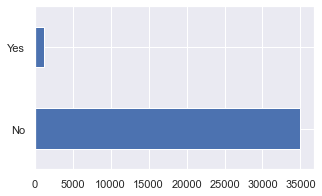

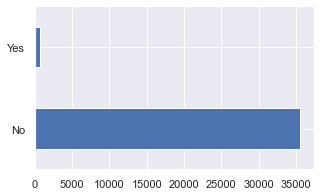

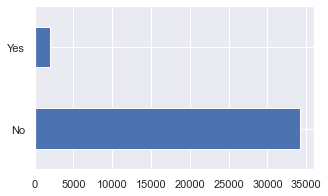

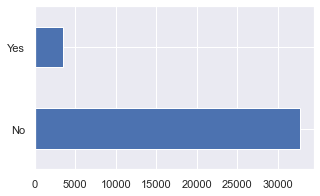

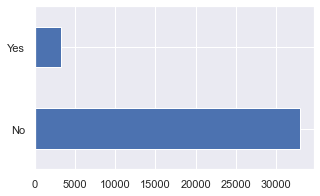

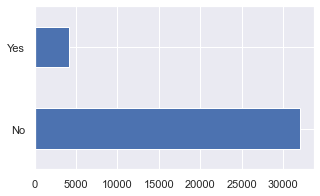

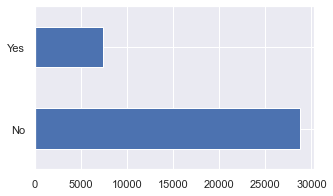

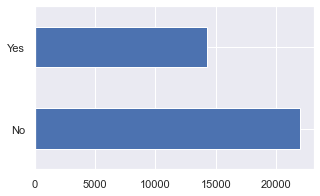

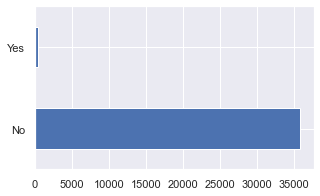

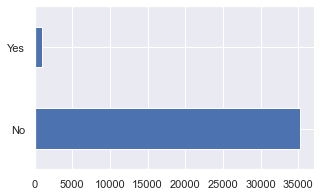

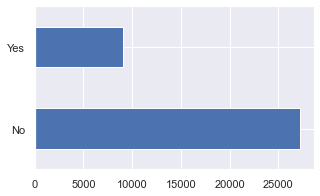

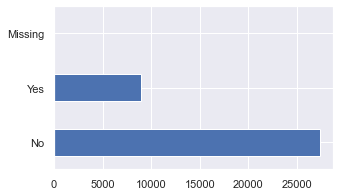

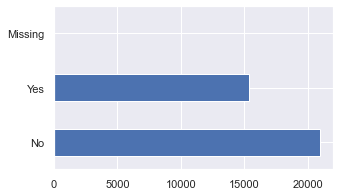

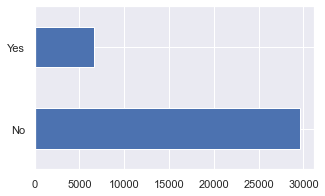

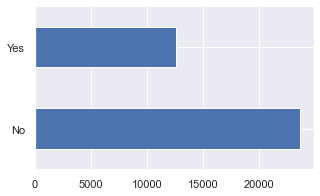

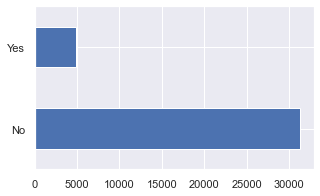

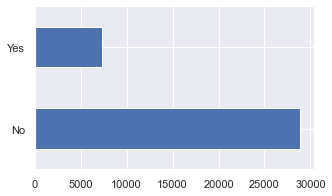

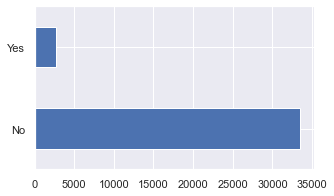

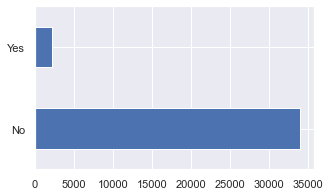

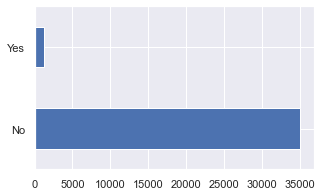

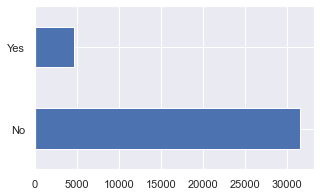

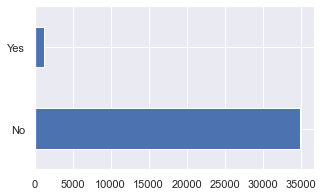

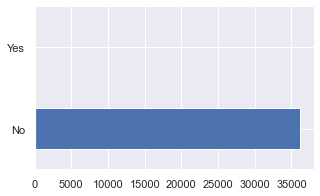

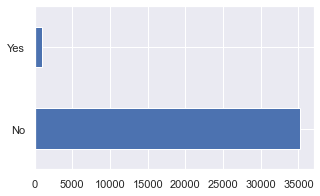

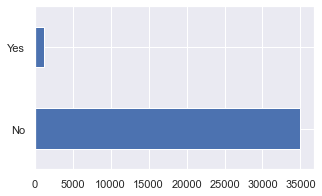

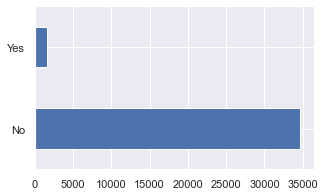

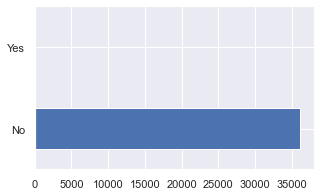

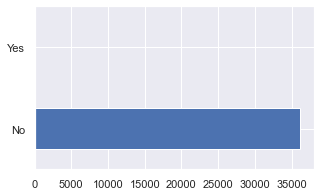

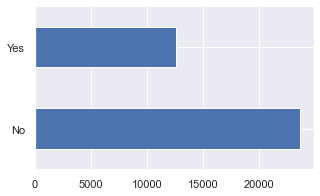

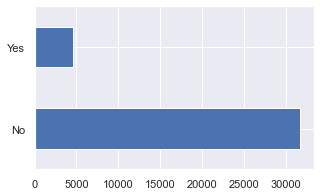

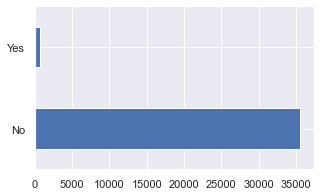

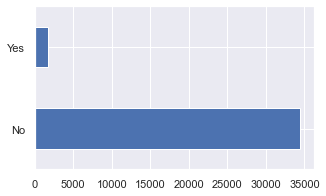

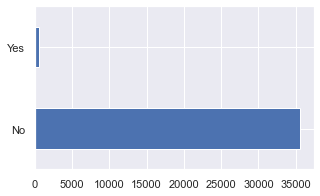

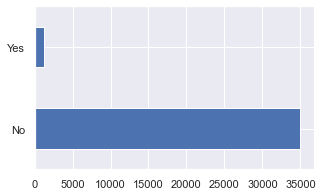

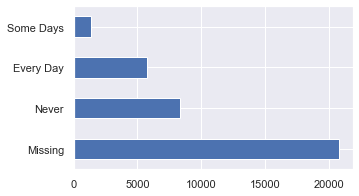

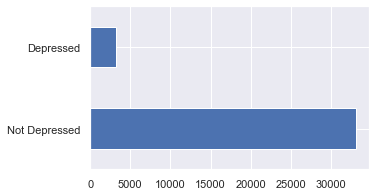

In [67]:
cols=df.select_dtypes(include=['object', 'category']).columns
for i in cols:
    df[i].value_counts().plot.barh(); 
    plt.show()

C:\Users\yucel\anaconda3\lib\site-packages\seaborn\axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


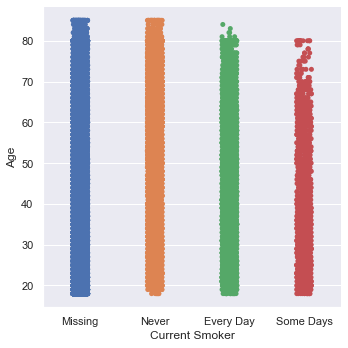

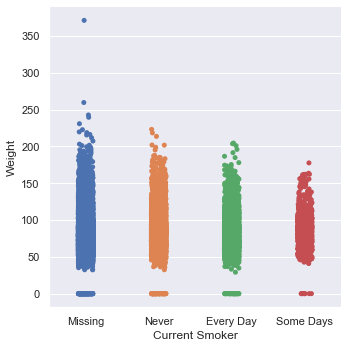

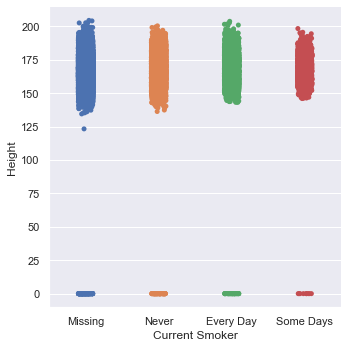

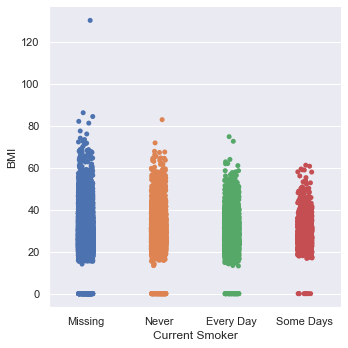

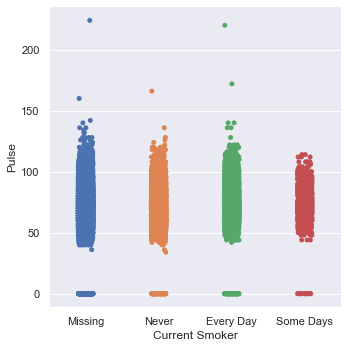

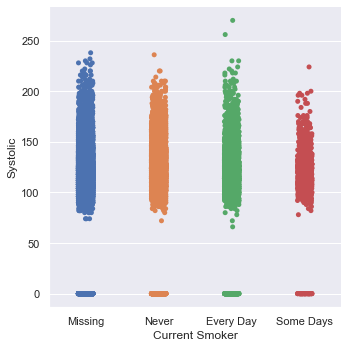

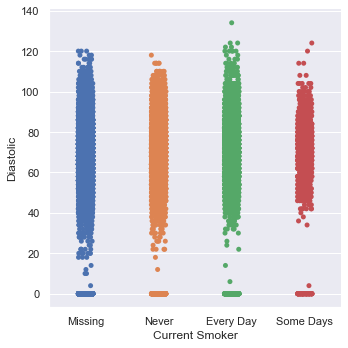

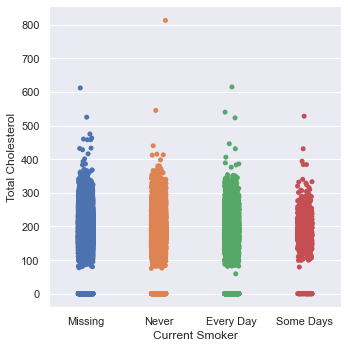

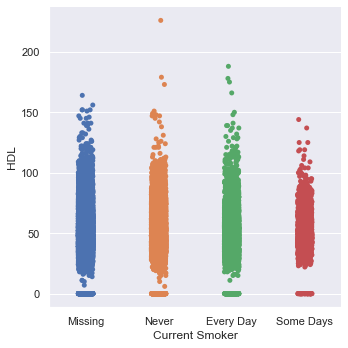

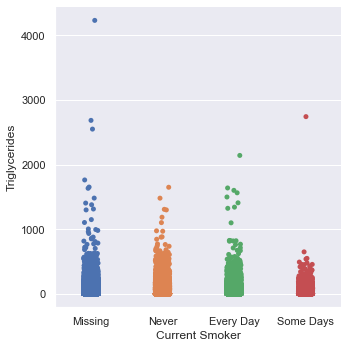

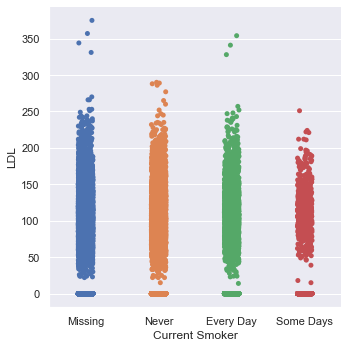

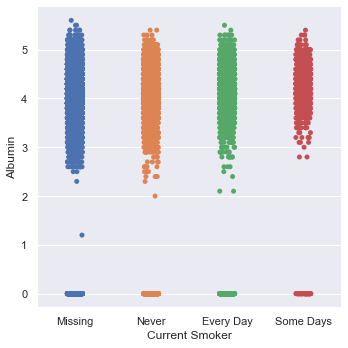

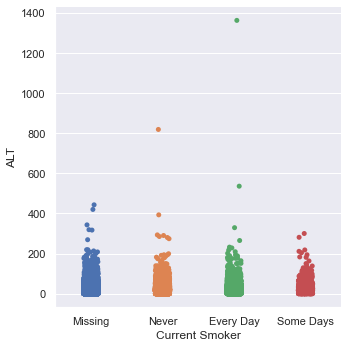

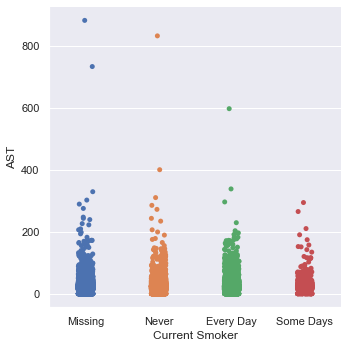

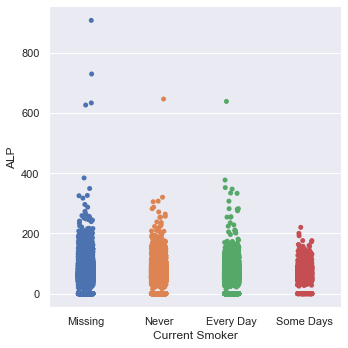

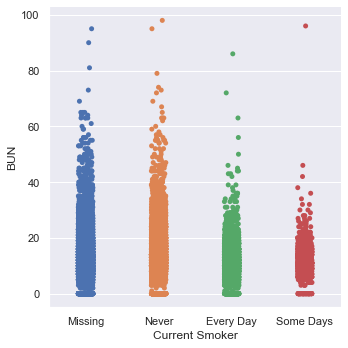

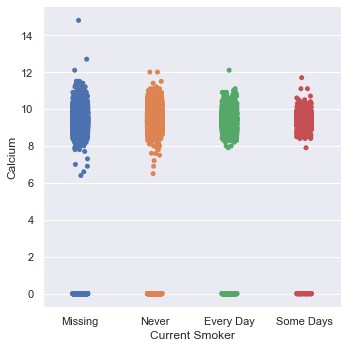

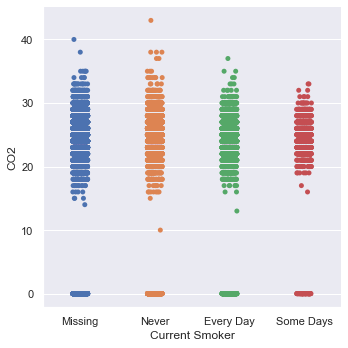

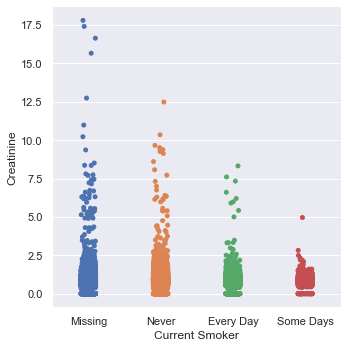

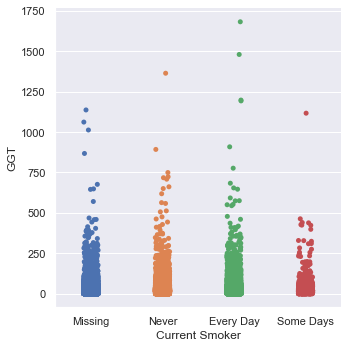

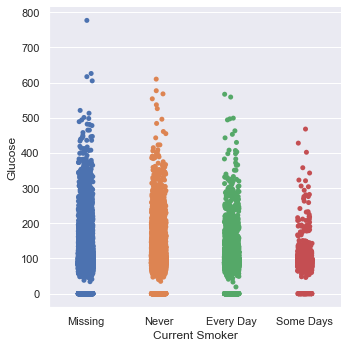

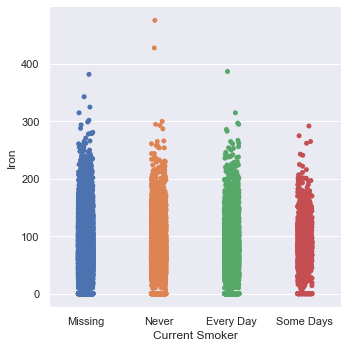

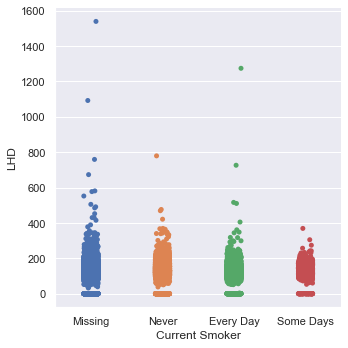

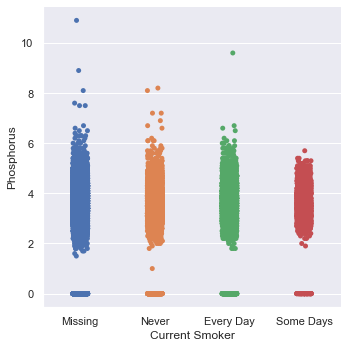

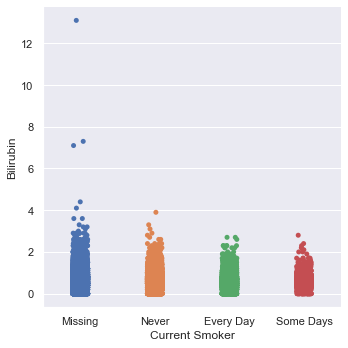

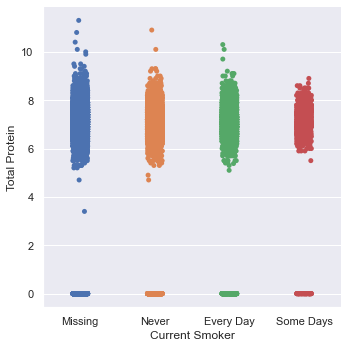

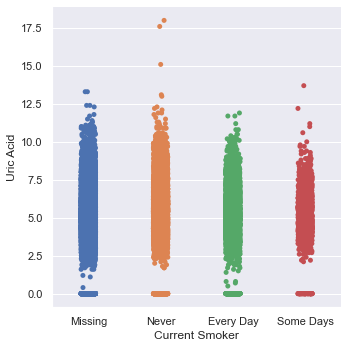

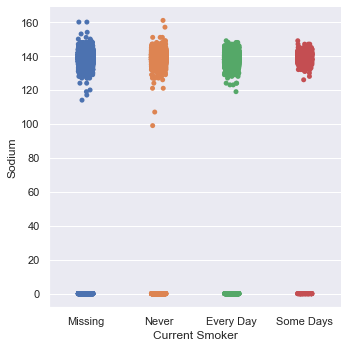

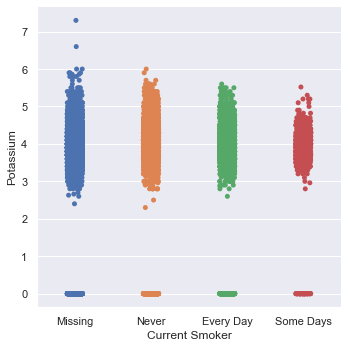

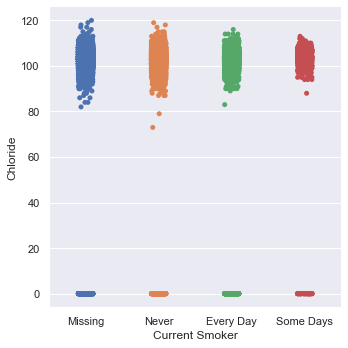

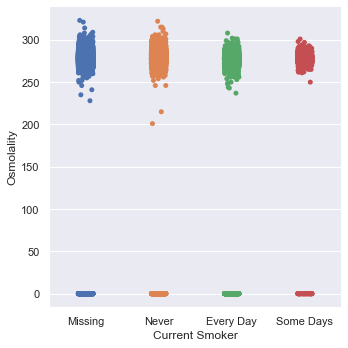

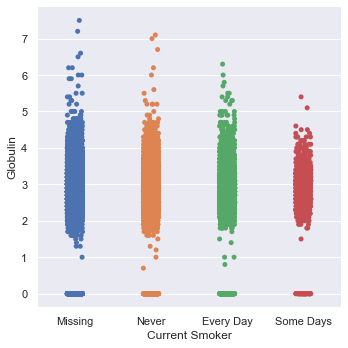

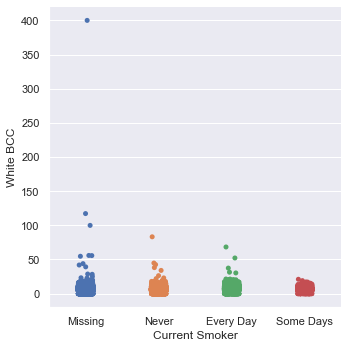

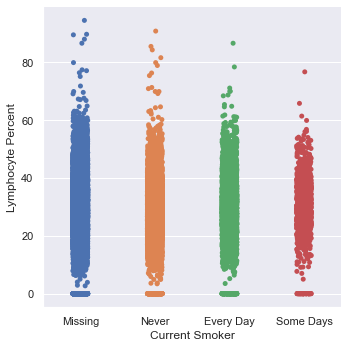

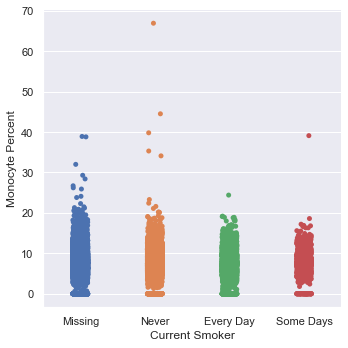

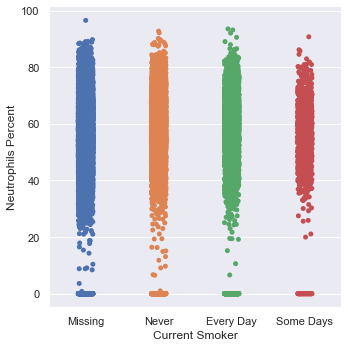

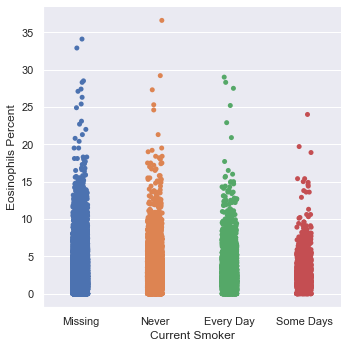

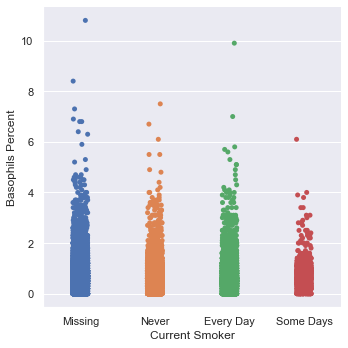

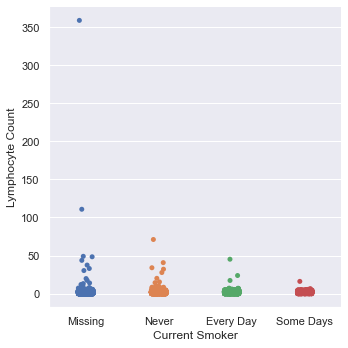

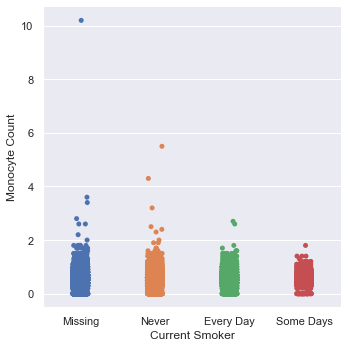

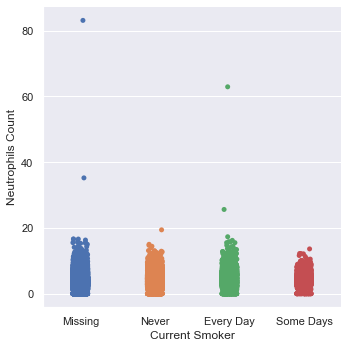

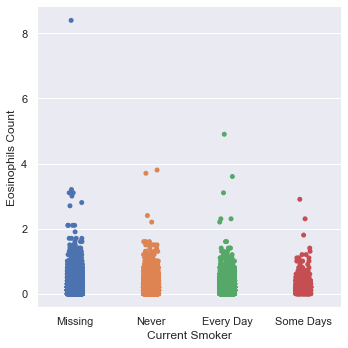

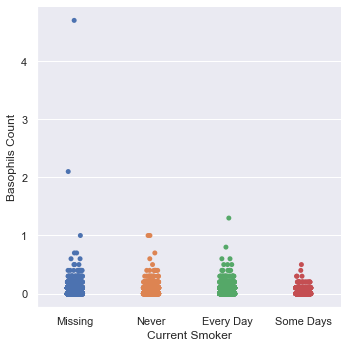

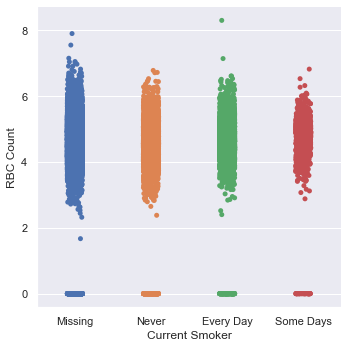

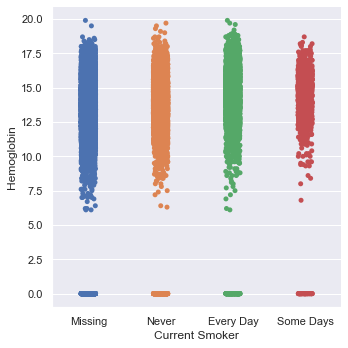

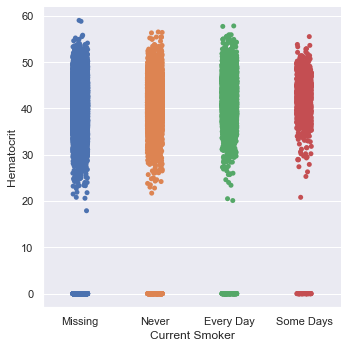

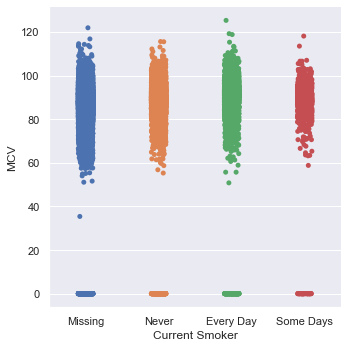

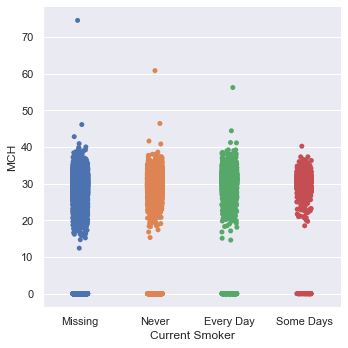

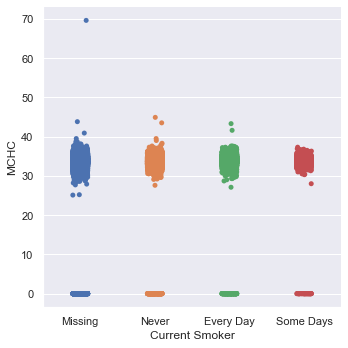

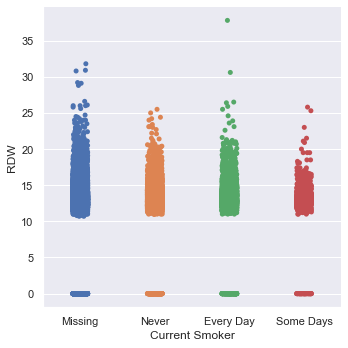

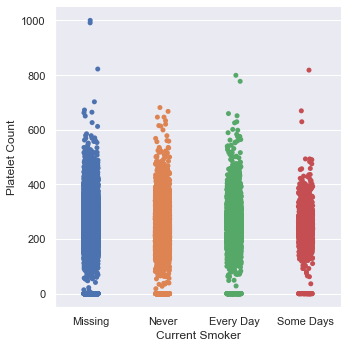

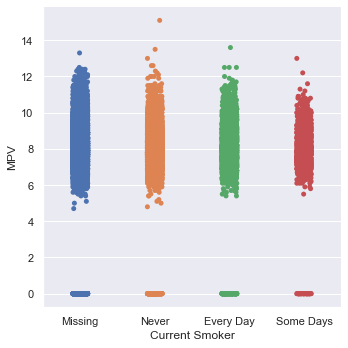

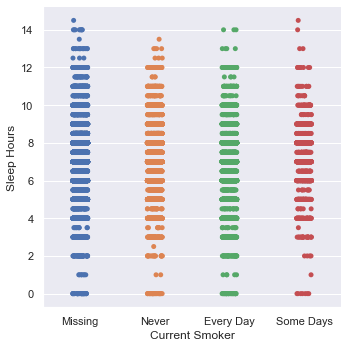

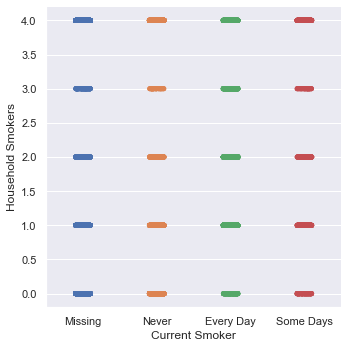

In [68]:
cols = df.select_dtypes([np.number]).columns
for i in cols:
    sns.catplot(x = "Current Smoker", y = i , data = df);

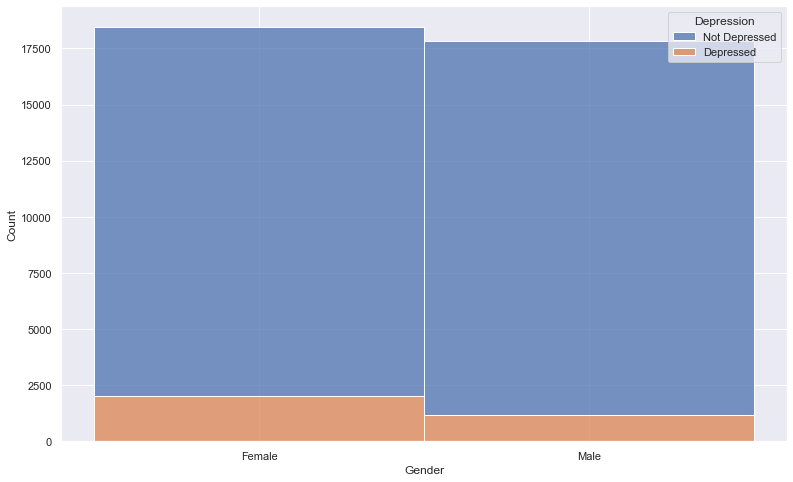

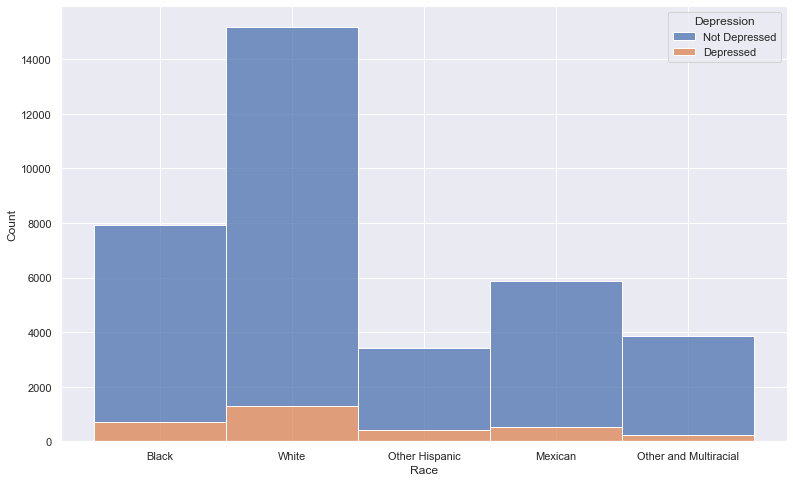

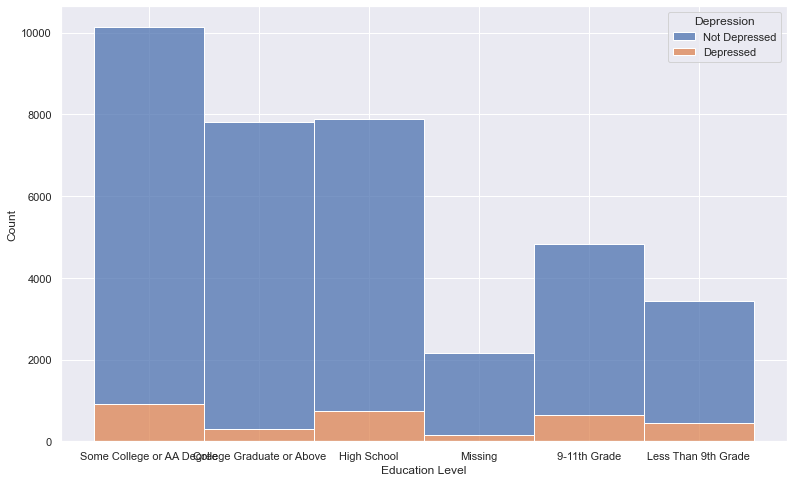

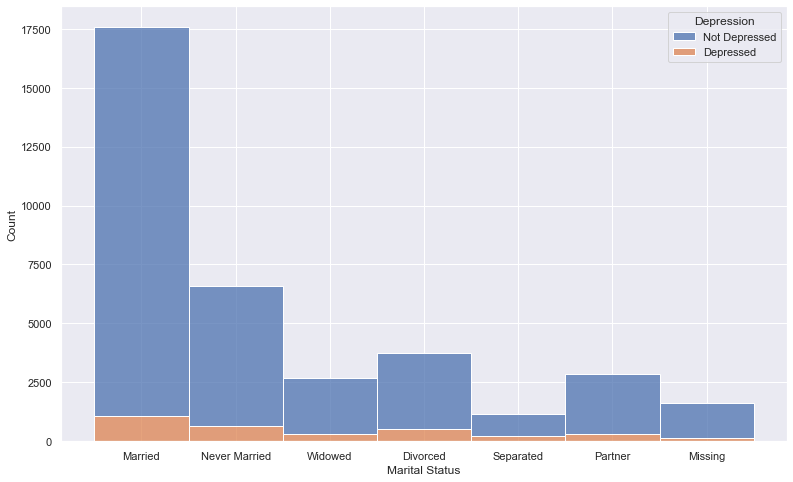

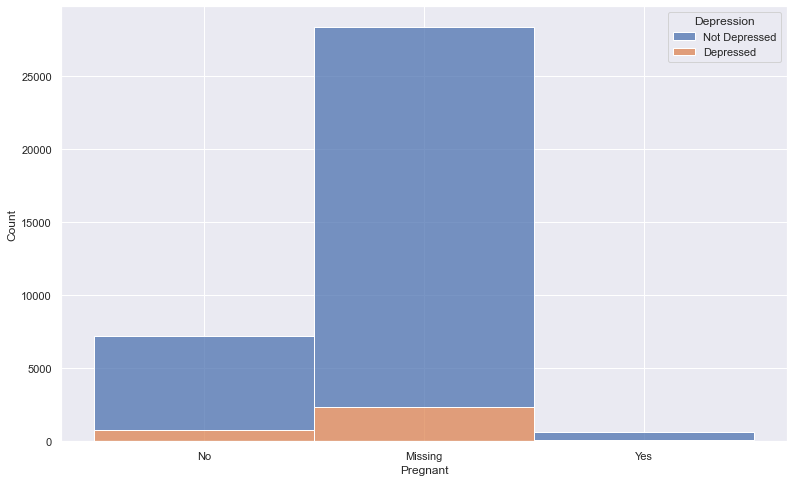

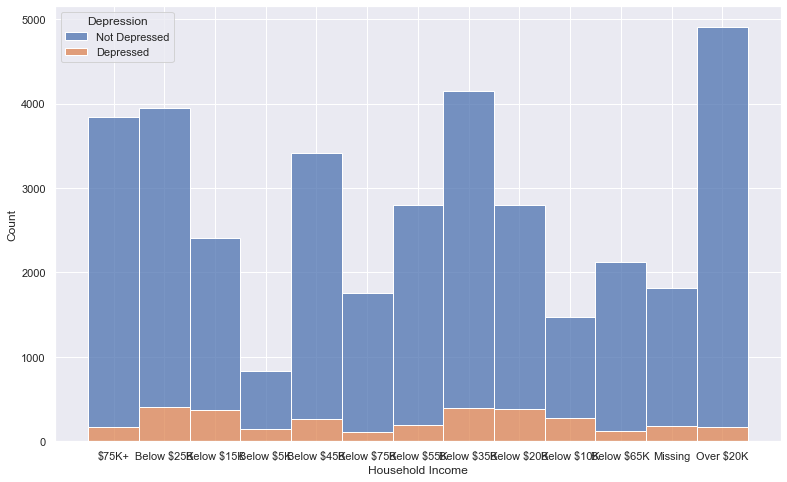

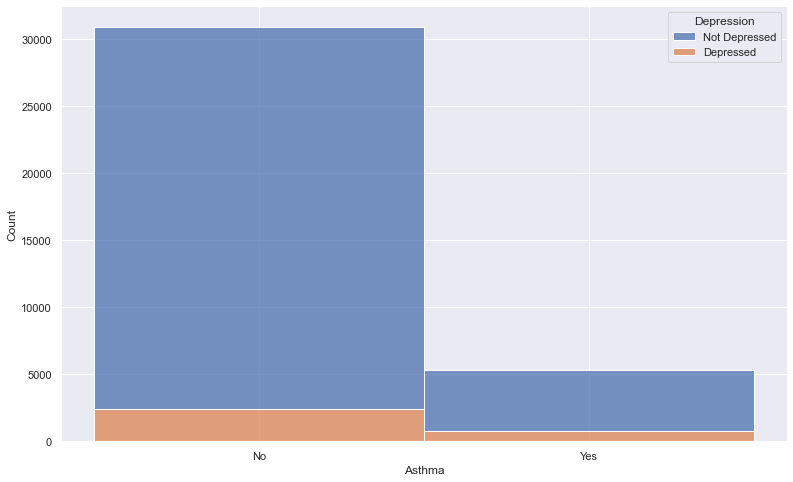

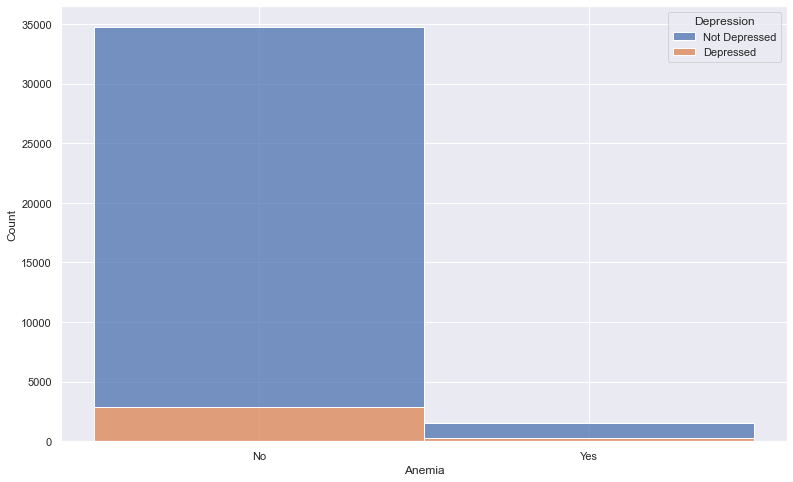

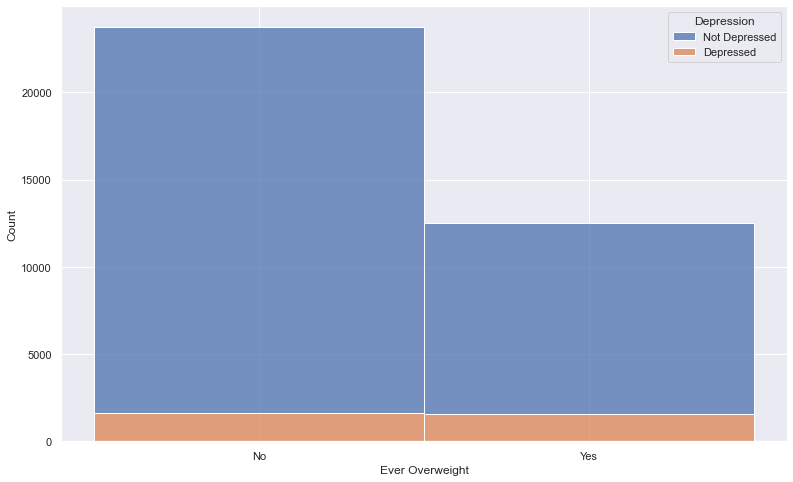

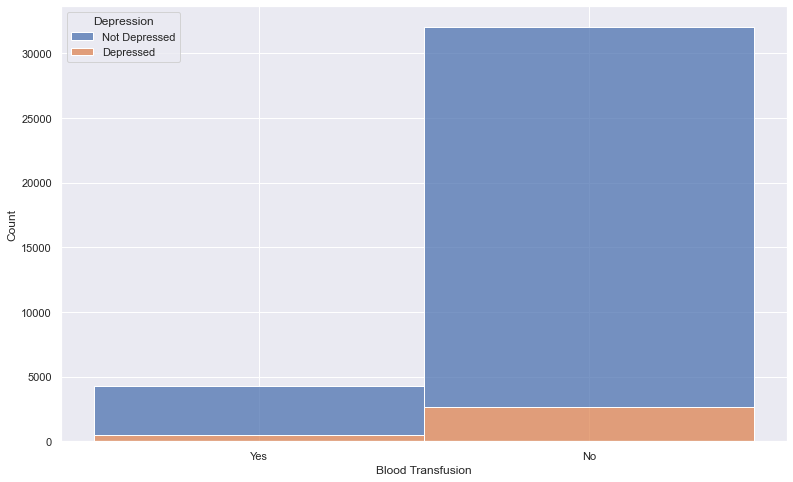

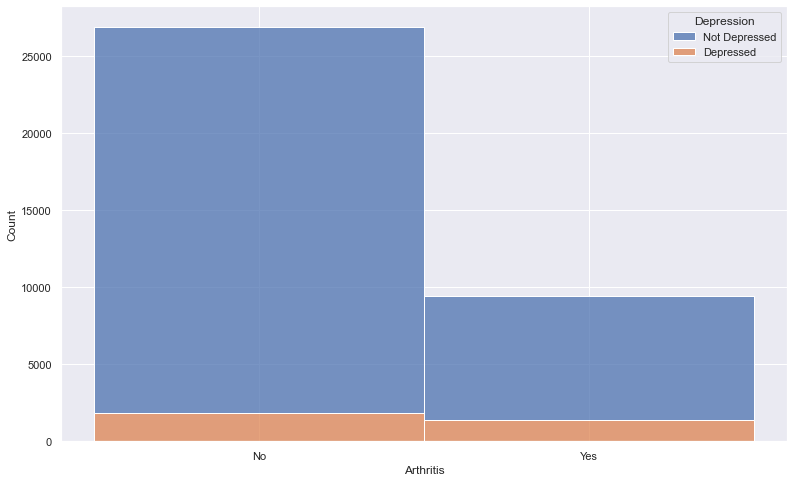

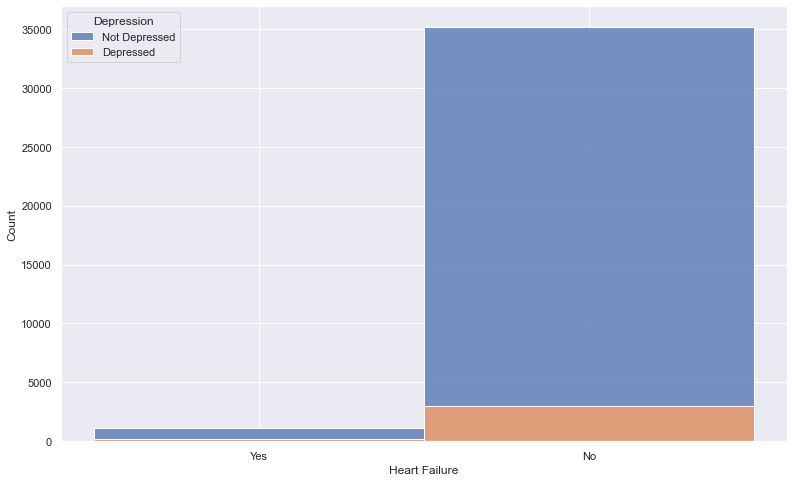

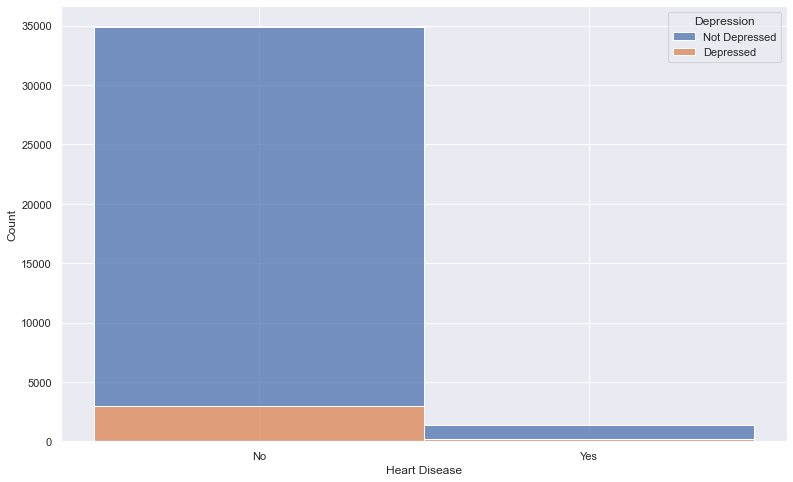

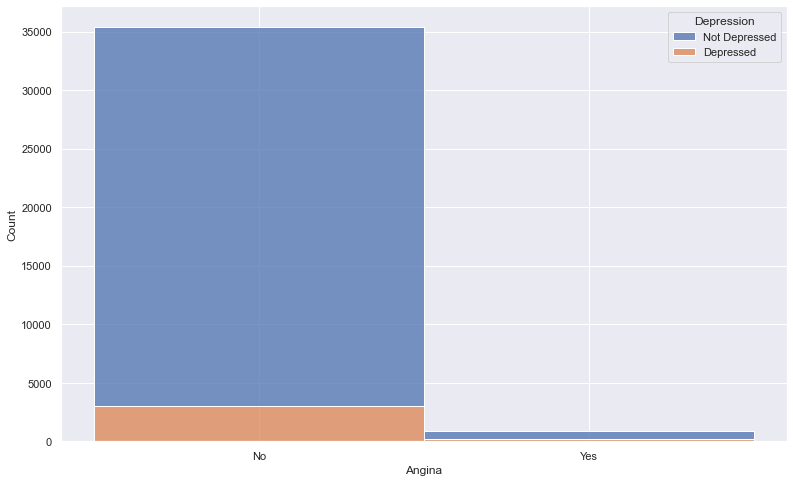

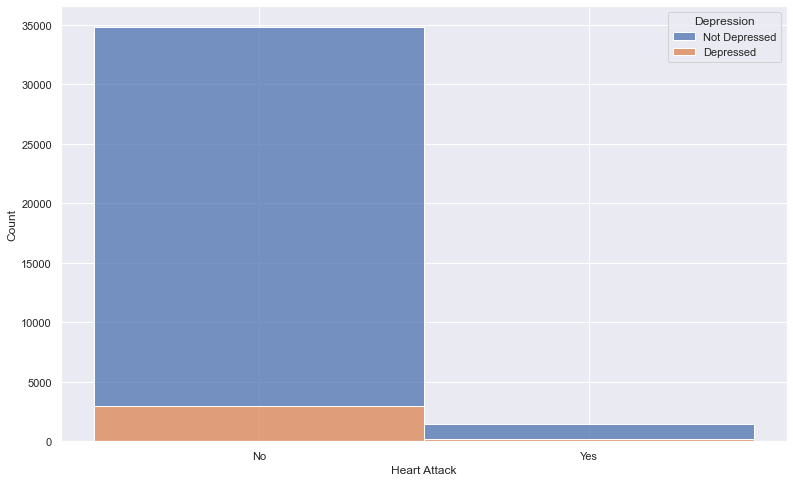

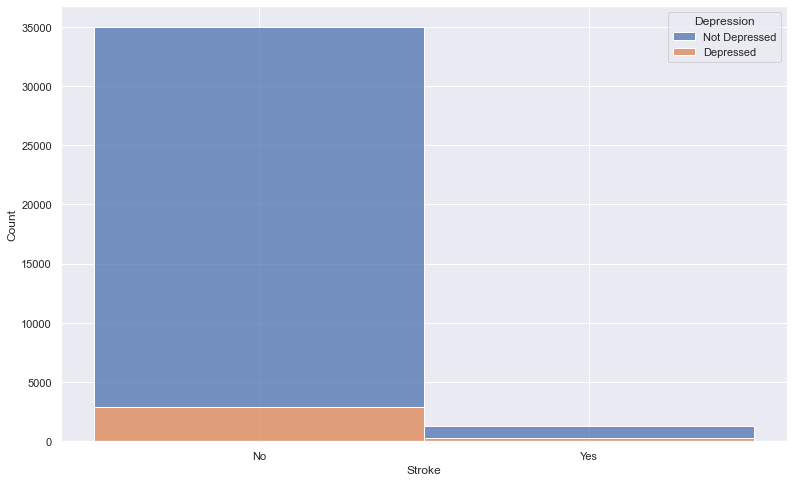

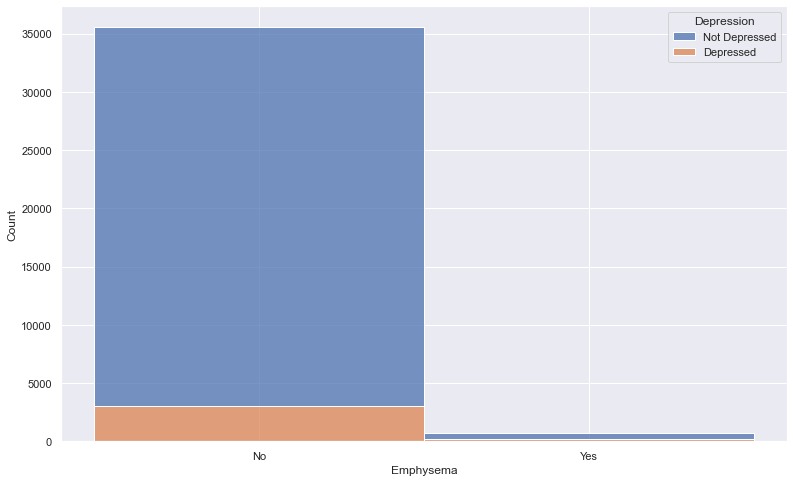

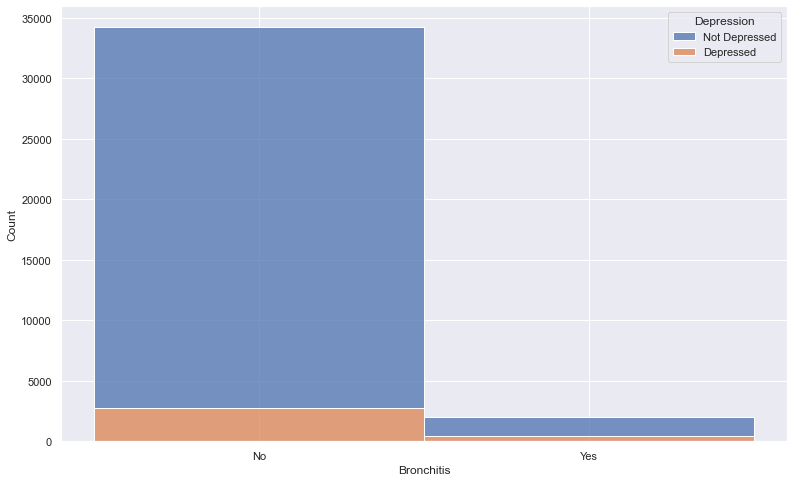

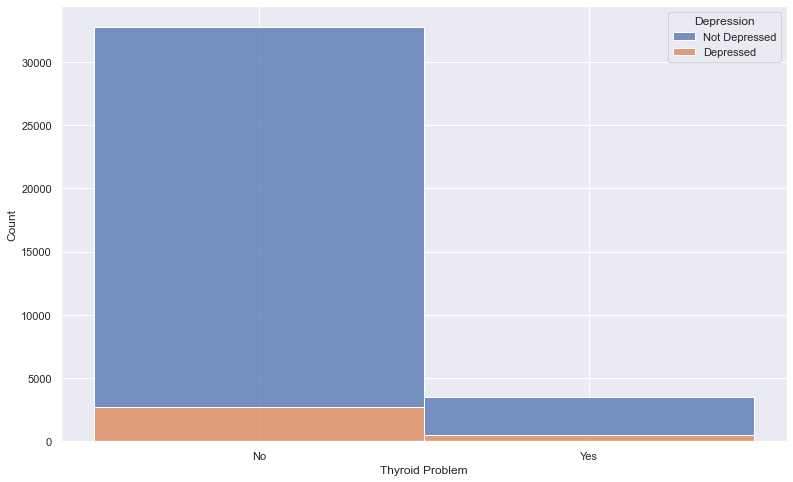

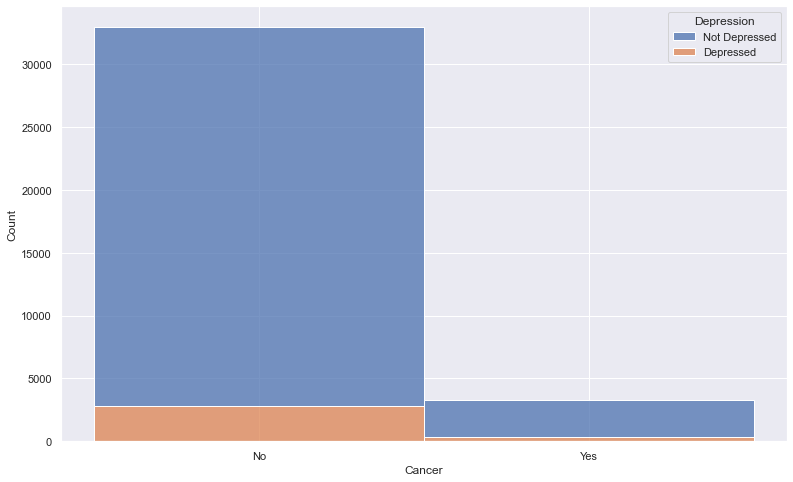

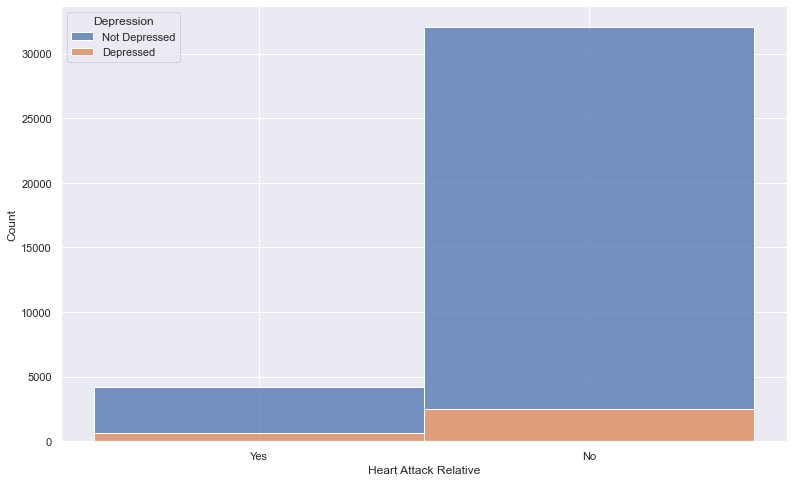

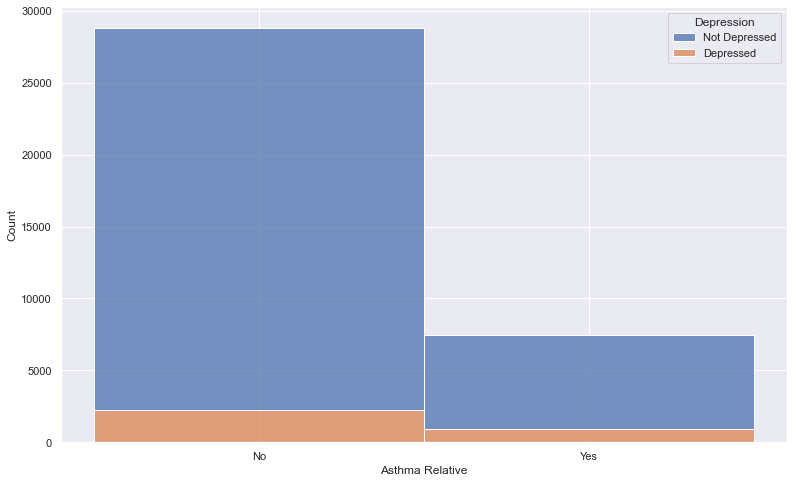

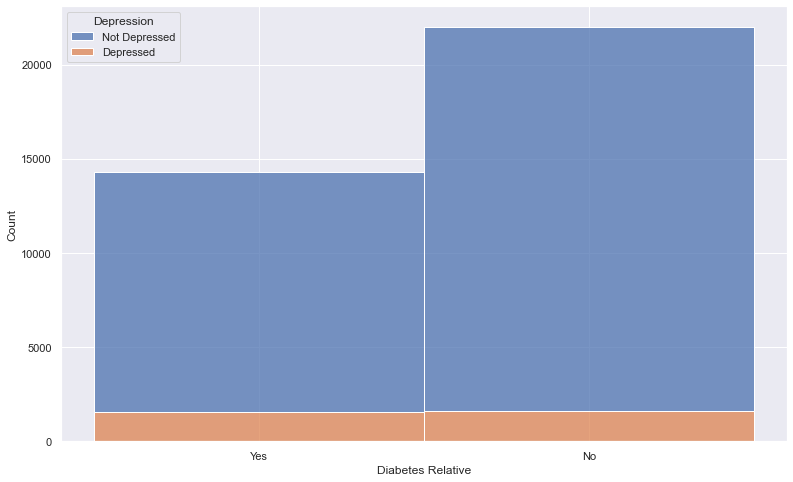

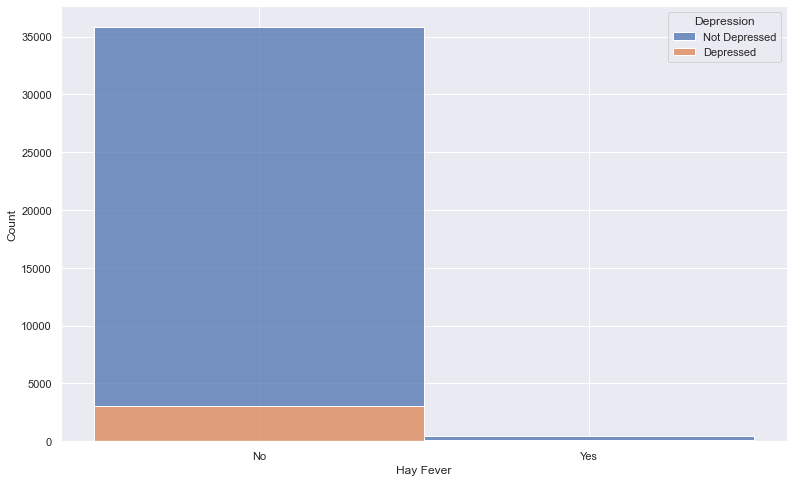

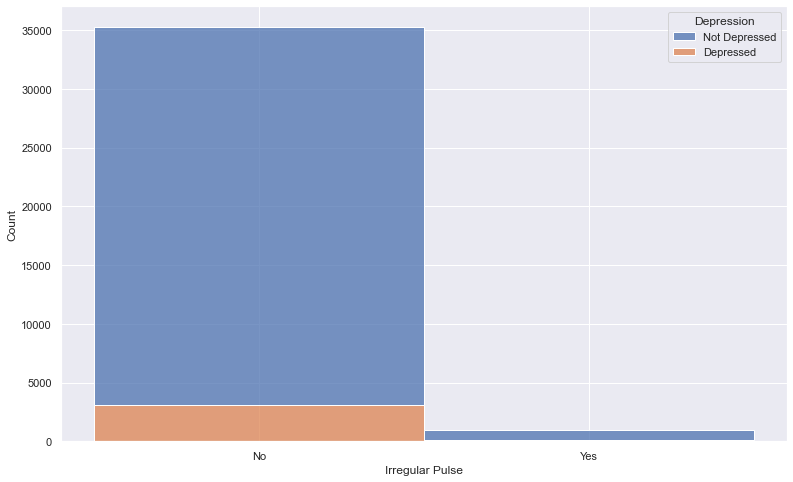

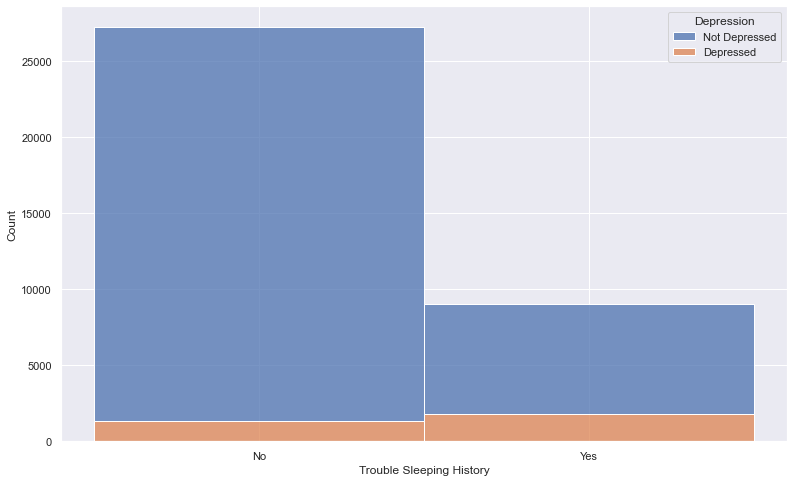

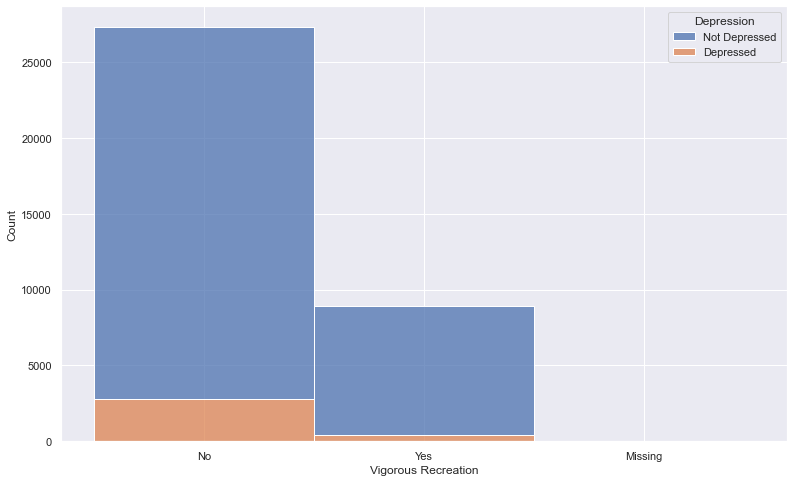

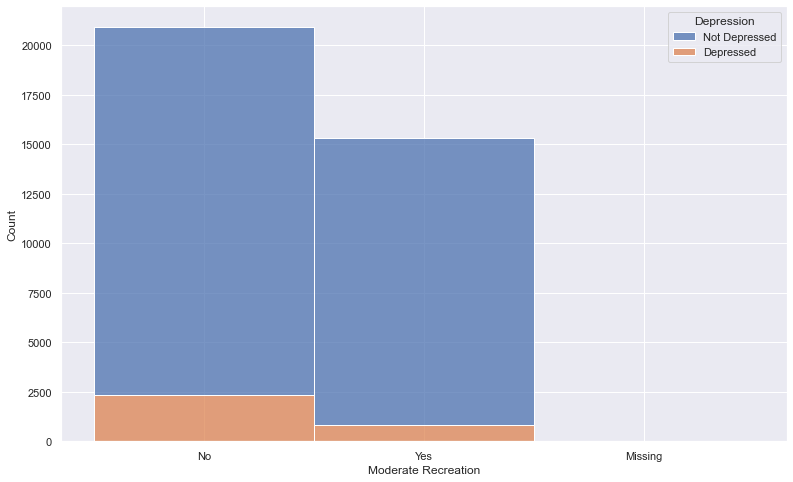

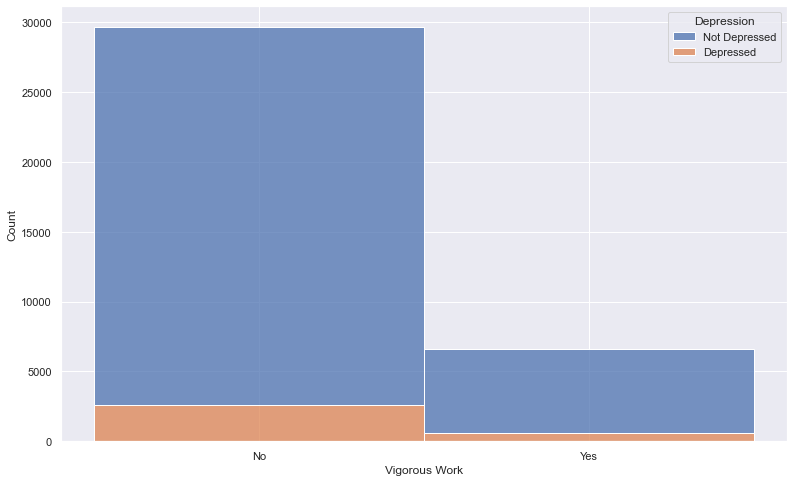

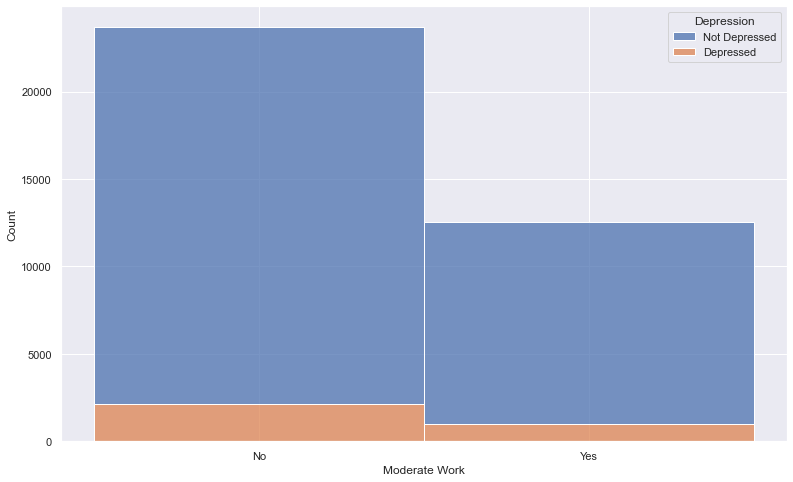

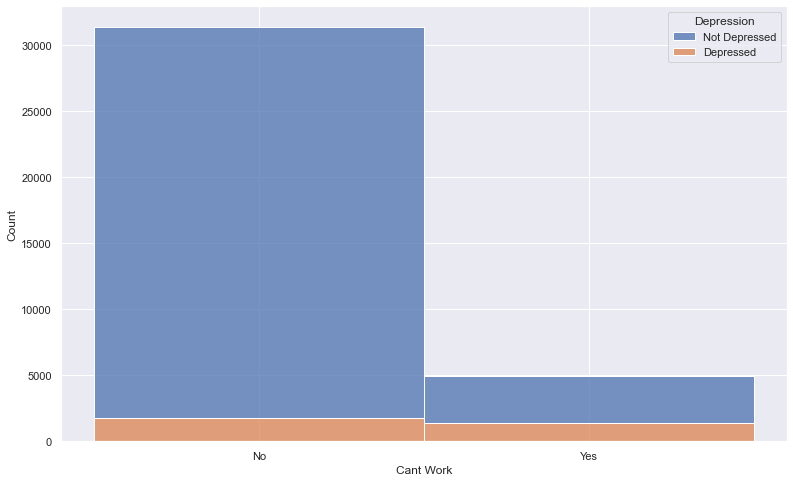

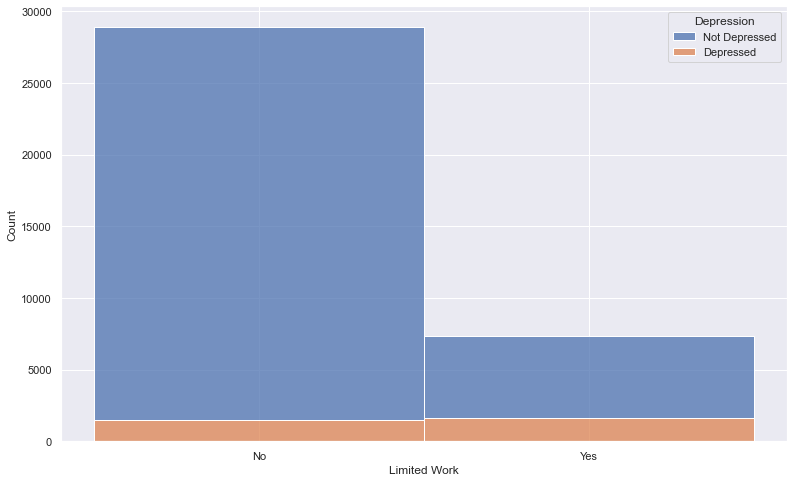

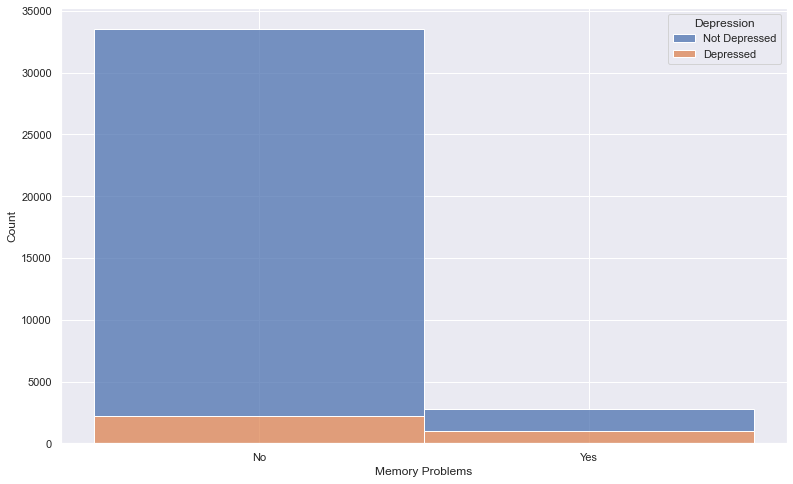

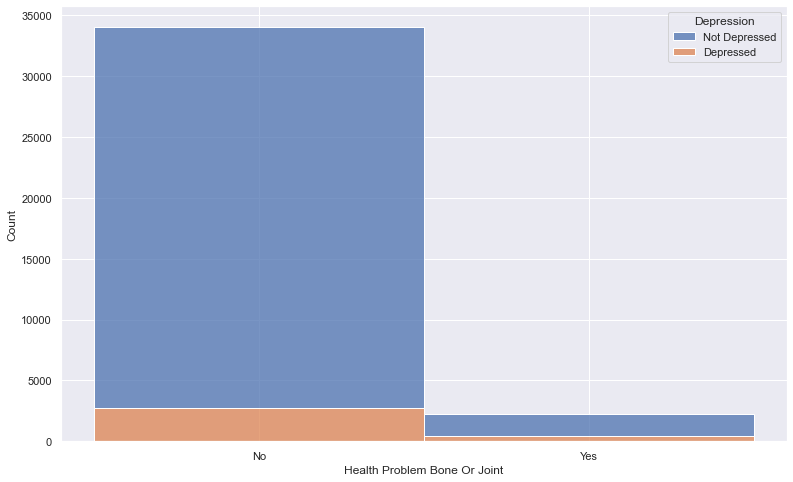

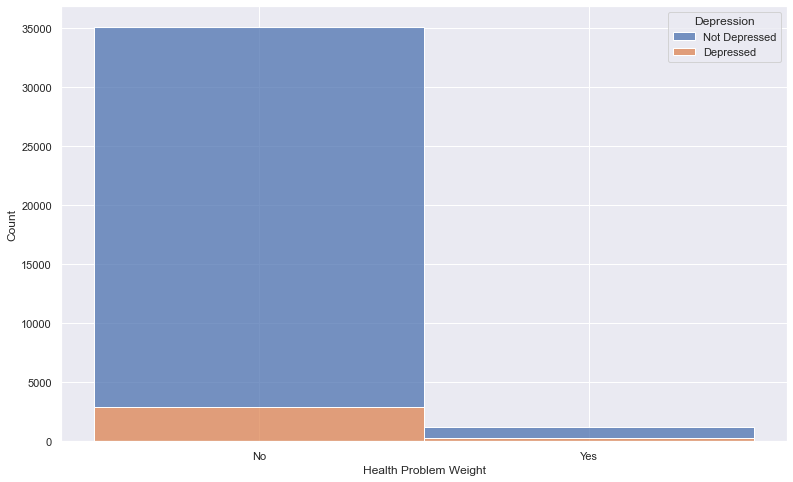

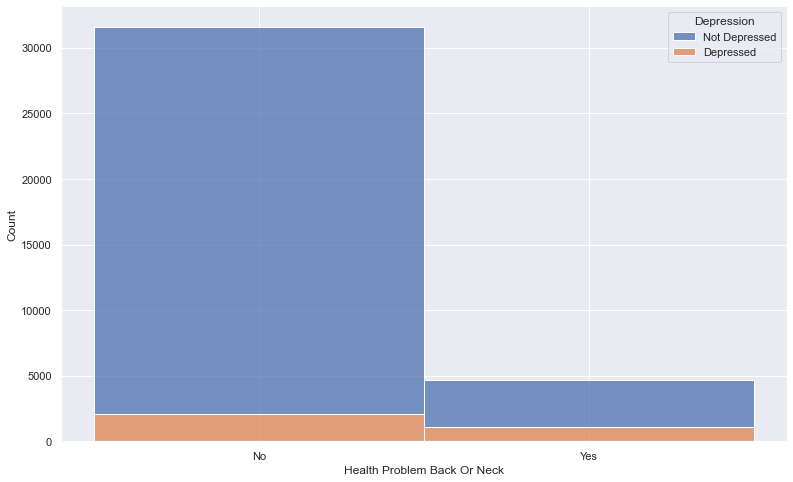

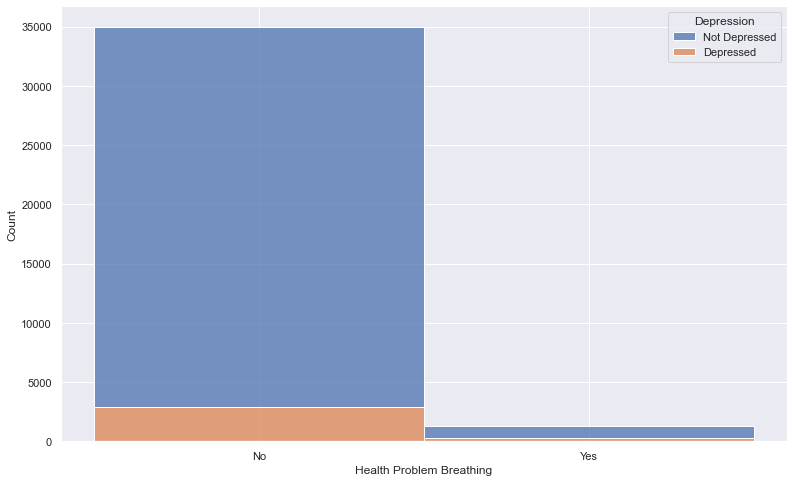

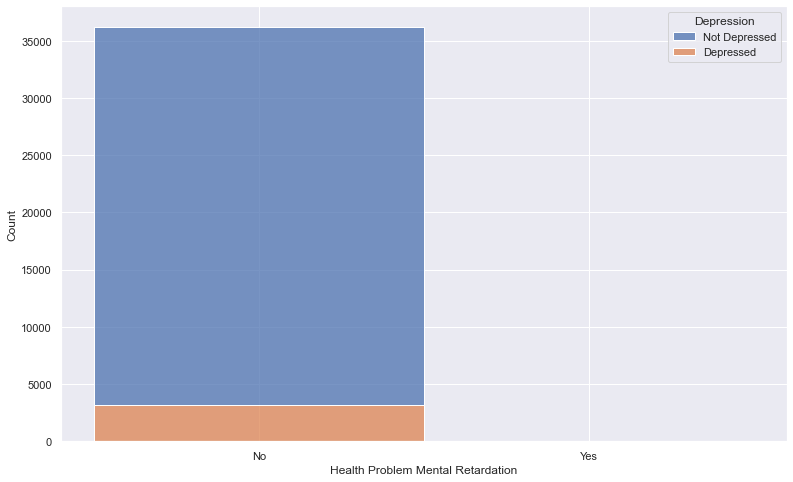

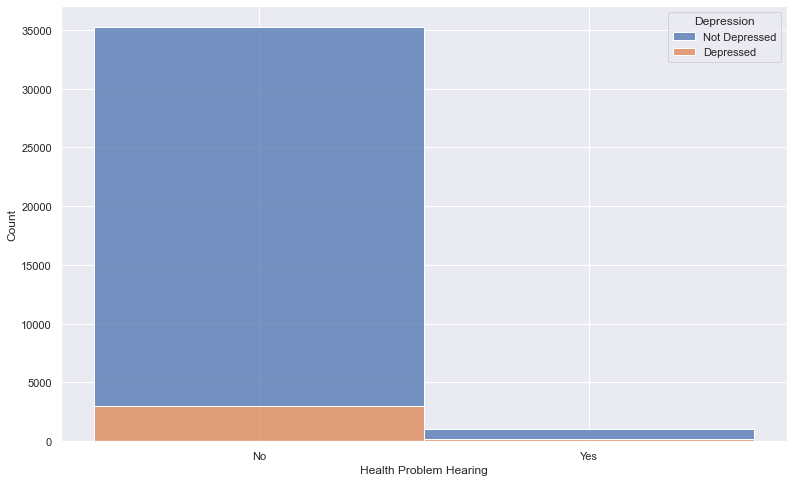

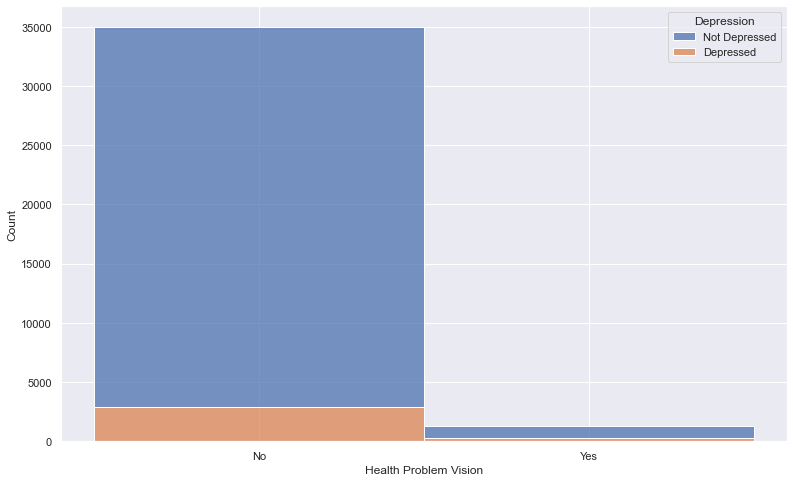

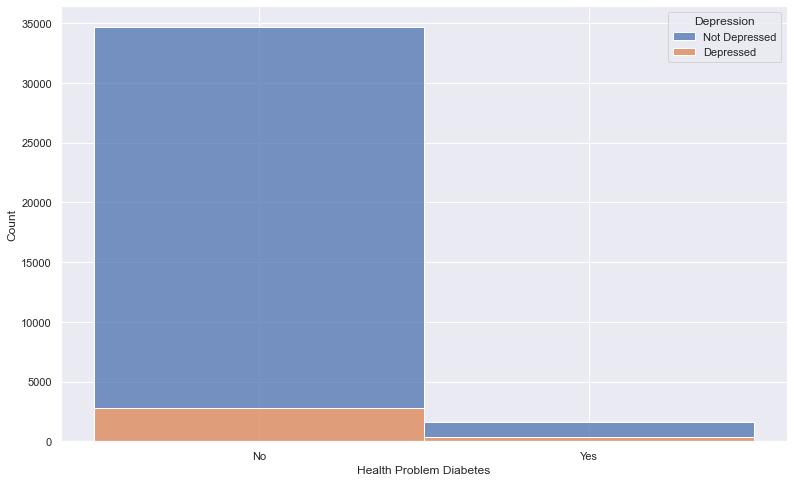

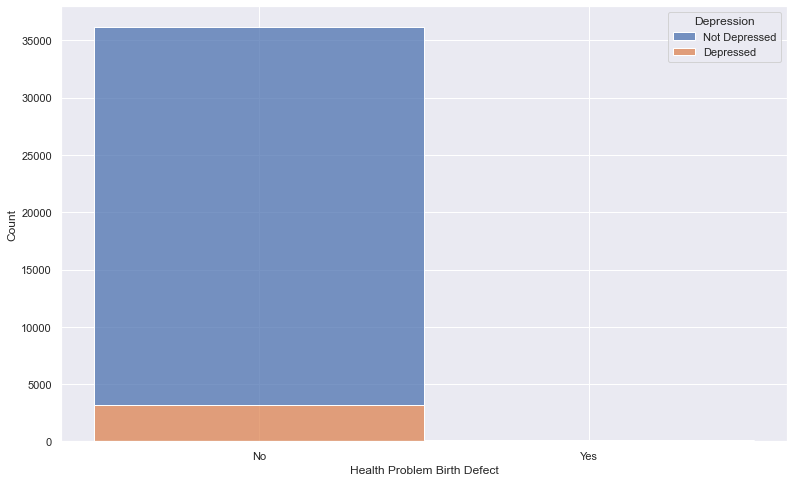

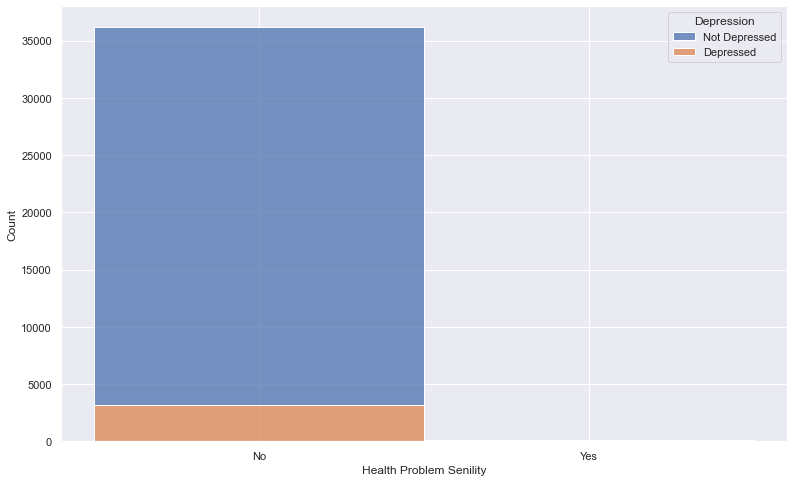

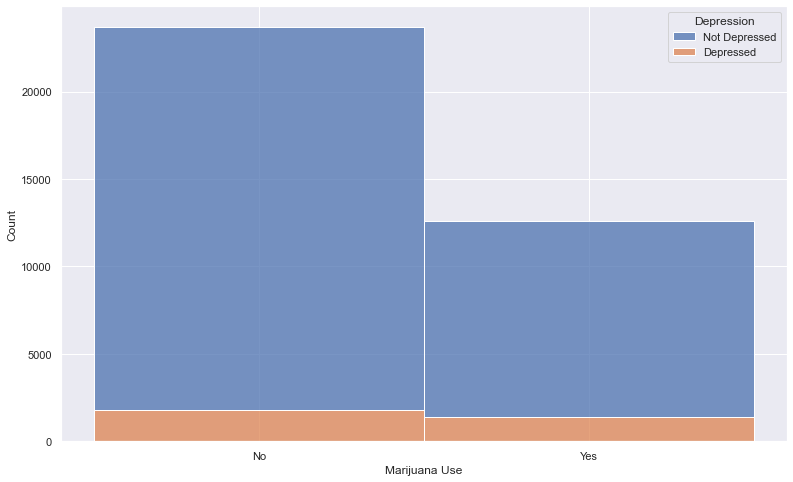

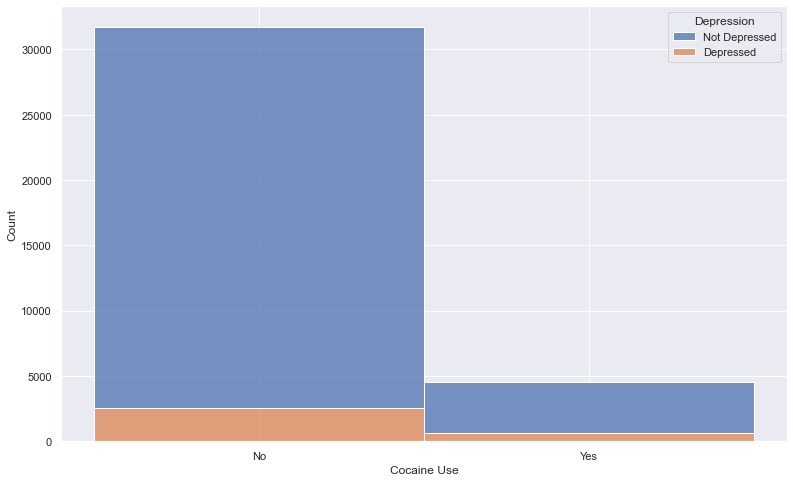

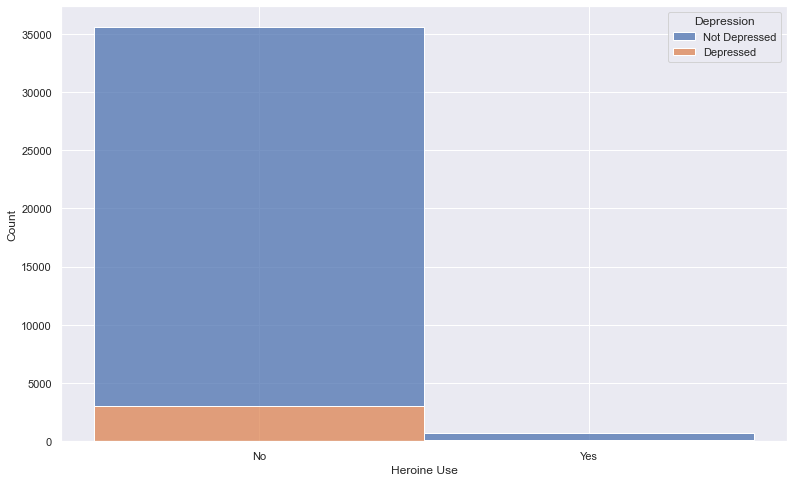

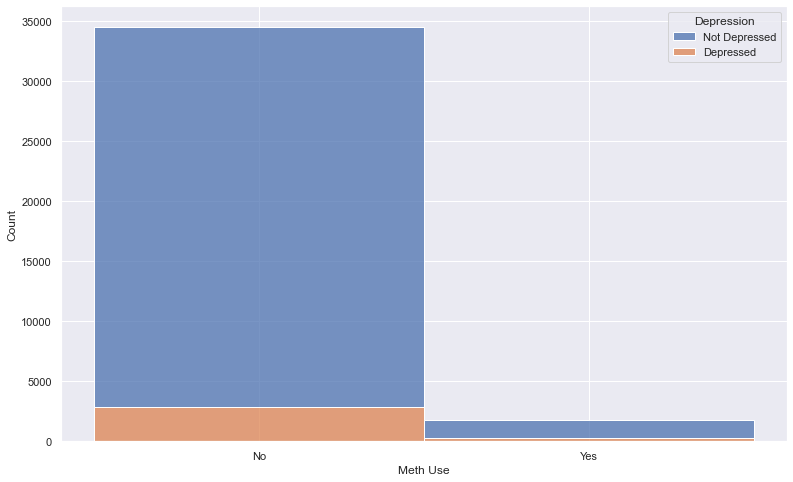

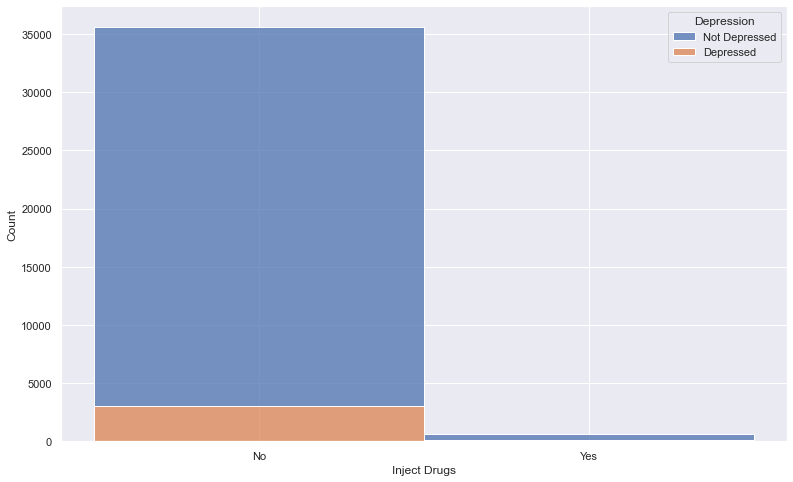

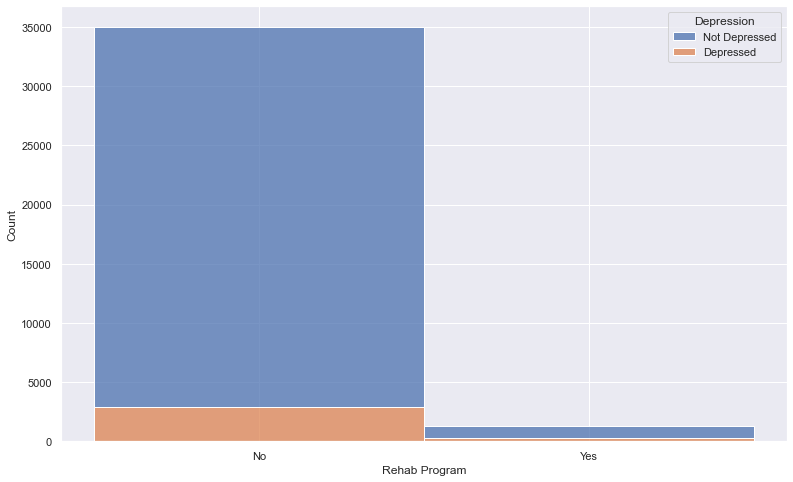

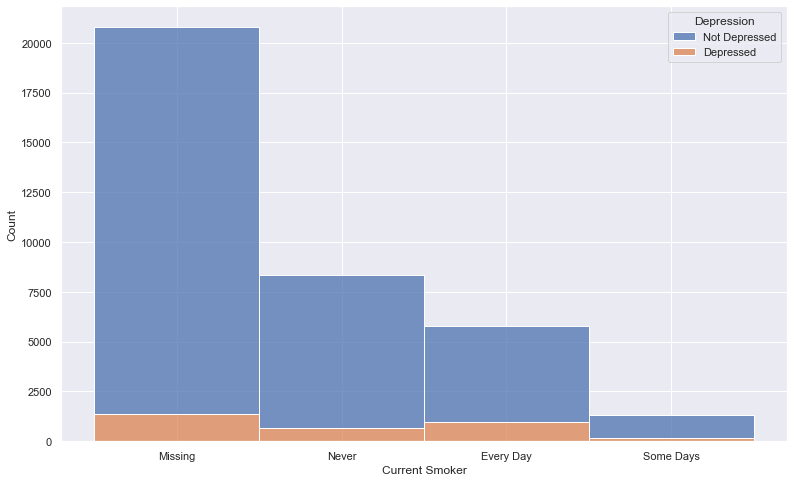

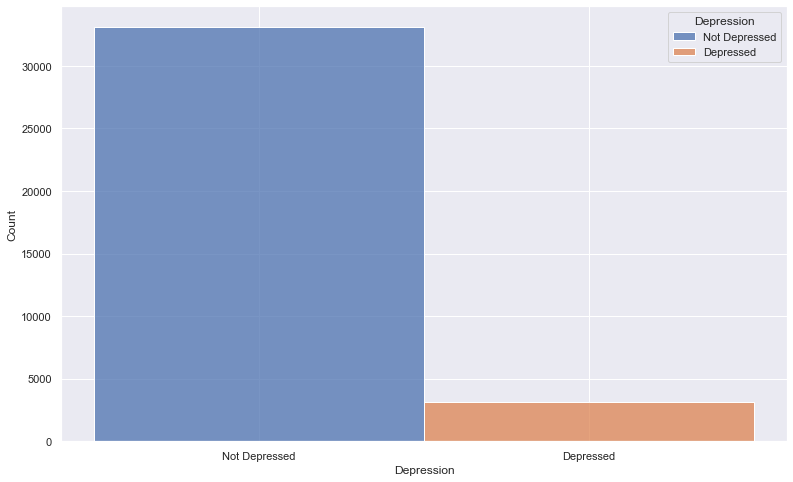

In [75]:
cols=df.select_dtypes(include=['object', 'category']).columns
for i in cols:
 plt.figure(figsize=(13,8))
 sns.histplot(binwidth=0.5, x=i, hue="Depression", data=df, stat="count", multiple="stack")
 plt.show()

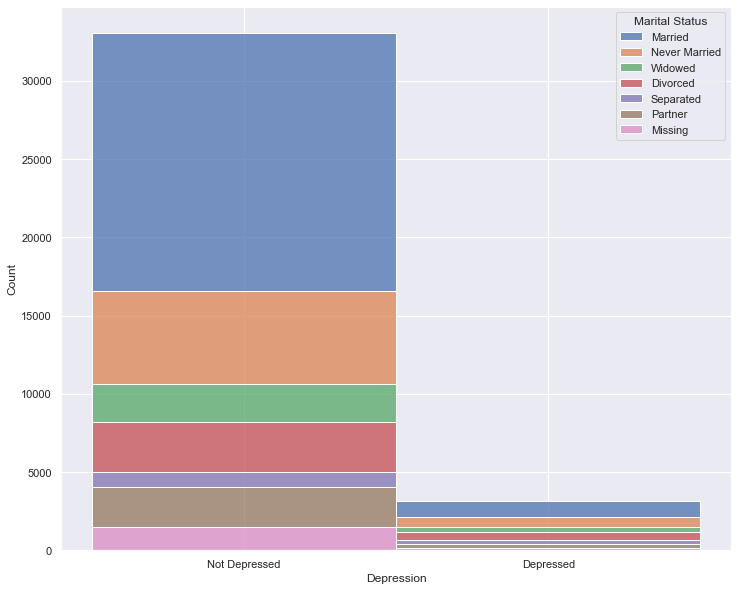

In [83]:
plt.figure(figsize=(12,10))
sns.histplot(binwidth=0.5, x="Depression", hue="Marital Status", data=df, stat="count", multiple="stack")
plt.show()

## FILL IN MISSING VALUES

In [6]:
for column in df:
    if(df[column].dtype != np.int64 and df[column].dtype != np.float64):
        print(df[column].value_counts());
        print("\n");

Female    18447
Male      17812
Name: Gender, dtype: int64


White                    15179
Black                     7930
Mexican                   5874
Other and Multiracial     3848
Other Hispanic            3428
Name: Race, dtype: int64


Some College or AA Degree    10136
High School                   7887
College Graduate or Above     7813
9-11th Grade                  4823
Less Than 9th Grade           3443
Missing                       2157
Name: Education Level, dtype: int64


Married          17574
Never Married     6602
Divorced          3751
Partner           2842
Widowed           2695
Missing           1636
Separated         1159
Name: Marital Status, dtype: int64


Missing    28366
No          7237
Yes          656
Name: Pregnant, dtype: int64


Over $20K     4906
Below $35K    4154
Below $25K    3947
$75K+         3839
Below $45K    3419
Below $20K    2803
Below $55K    2796
Below $15K    2407
Below $65K    2119
Missing       1813
Below $75K    1755
Below $10K    1473
B

In [7]:
missing_value=["Education Level", "Household Income","Marital Status"]

for i in missing_value:
    df.loc[df[i] == "Missing", i] = df[i].mode()[0];

df.loc[df["Current Smoker"] == "Missing", "Current Smoker"] = "No";
df.loc[df["Pregnant"] == "Missing", "Pregnant"] = "No";
    
    
    
#print(df['Current Smoker'].value_counts());
print(df['Current Smoker'].value_counts());


No           20789
Never         8359
Every Day     5780
Some Days     1331
Name: Current Smoker, dtype: int64


C:\Users\yucel\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [8]:
print(df['Pregnant'].value_counts());

No     35603
Yes      656
Name: Pregnant, dtype: int64


## DATA DESCRIPTION

In [9]:
#Information about dataset
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36259 entries, 0 to 36258
Data columns (total 105 columns):
 #    Column                             Dtype  
---   ------                             -----  
 0    Gender                             object 
 1    Age                                int64  
 2    Race                               object 
 3    Education Level                    object 
 4    Marital Status                     object 
 5    Pregnant                           object 
 6    Household Income                   object 
 7    Asthma                             object 
 8    Anemia                             object 
 9    Ever Overweight                    object 
 10   Blood Transfusion                  object 
 11   Arthritis                          object 
 12   Heart Failure                      object 
 13   Heart Disease                      object 
 14   Angina                             object 
 15   Heart Attack                       object 
 16   St

In [10]:
df.loc[:, df.dtypes == 'object'] =\
    df.select_dtypes(['object'])\
    .apply(lambda x: x.astype('category'))

df.info(verbose=True)

C:\Users\yucel\anaconda3\lib\site-packages\pandas\core\indexing.py:1787: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, val, pi)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36259 entries, 0 to 36258
Data columns (total 105 columns):
 #    Column                             Dtype   
---   ------                             -----   
 0    Gender                             category
 1    Age                                int64   
 2    Race                               category
 3    Education Level                    category
 4    Marital Status                     category
 5    Pregnant                           category
 6    Household Income                   category
 7    Asthma                             category
 8    Anemia                             category
 9    Ever Overweight                    category
 10   Blood Transfusion                  category
 11   Arthritis                          category
 12   Heart Failure                      category
 13   Heart Disease                      category
 14   Angina                             category
 15   Heart Attack                      

In [11]:
df.describe().T

count        mean        std   min           25%  \
Age                  36259.0   47.786260  18.763978  18.0  3.100000e+01   
Weight               36259.0   80.864436  23.057595   0.0  6.600000e+01   
Height               36259.0  165.764472  18.767852   0.0  1.597000e+02   
BMI                  36259.0   28.773157   7.605429   0.0  2.404500e+01   
Pulse                36259.0   71.286026  15.748265   0.0  6.400000e+01   
Systolic             36259.0  115.464850  36.454414   0.0  1.080000e+02   
Diastolic            36259.0   64.981991  21.906888   0.0  6.000000e+01   
Total Cholesterol    36259.0  182.199068  58.535543   0.0  1.580000e+02   
HDL                  36259.0   50.402548  19.427468   0.0  4.000000e+01   
Triglycerides        36259.0   57.104278  97.338964   0.0  0.000000e+00   
LDL                  36259.0   50.019692  60.727553   0.0  0.000000e+00   
Albumin              36259.0    3.998571   1.007912   0.0  4.000000e+00   
ALT                  36259.0   23.505557  20.128516   0.0  1.500000e+01   
AST                  36259.0   23.904603  16.563453   0.0  1.800000e+01   
ALP                  36259.0   67.263162  29.467571   0.0  5.300000e+01   
BUN                  36259.0   12.793513   6.548531   0.0  9.000000e+00   
Calcium              36259.0    8.900229   2.152409   0.0  9.100000e+00   
CO2                  36259.0   23.683996   6.140146   0.0  2.300000e+01   
Creatinine           36259.0    0.854949   0.474533   0.0  7.000000e-01   
GGT                  36259.0   27.500152  41.317190   0.0  1.300000e+01   
Glucose              36259.0   96.824126  44.278384   0.0  8.400000e+01   
Iron                 36259.0   80.293527  39.717110   0.0  5.700000e+01   
LHD                  36259.0  125.867785  44.891645   0.0  1.100000e+02   
Phosphorus           36259.0    3.544316   1.006366   0.0  3.300000e+00   
Bilirubin            36259.0    0.624967   0.346267   0.0  4.000000e-01   
Total Protein        36259.0    6.762012   1.683979   0.0  6.800000e+00   
Uric Acid            36259.0    5.152086   1.862481   0.0  4.200000e+00   
Sodium               36259.0  131.938939  31.269329   0.0  1.380000e+02   
Potassium            36259.0    3.774180   0.955365   0.0  3.700000e+00   
Chloride             36259.0   97.974268  23.341221   0.0  1.010000e+02   
Osmolality           36259.0  263.760639  62.640012   0.0  2.750000e+02   
Globulin             36259.0    2.769649   0.798986   0.0  2.600000e+00   
White BCC            36259.0    6.989026   3.468629   0.0  5.600000e+00   
Lymphocyte Percent   36259.0   29.355970  10.482965   0.0  2.390000e+01   
Monocyte Percent     36259.0    7.617185   2.786116   0.0  6.200000e+00   
Neutrophils Percent  36259.0   55.491199  14.948104   0.0  5.080000e+01   
Eosinophils Percent  36259.0    2.733890   2.164312   0.0  1.400000e+00   
Basophils Percent    36259.0    0.696459   0.489202   0.0  4.000000e-01   
Lymphocyte Count     36259.0    2.091569   2.263553   0.0  1.600000e+00   
Monocyte Count       36259.0    0.537342   0.229732   0.0  4.000000e-01   
Neutrophils Count    36259.0    4.106713   1.962746   0.0  3.000000e+00   
Eosinophils Count    36259.0    0.195187   0.177618   0.0  1.000000e-01   
Basophils Count      36259.0    0.043661   0.062996   0.0  5.397605e-79   
RBC Count            36259.0    4.490587   1.042157   0.0  4.280000e+00   
Hemoglobin           36259.0   13.511390   3.143251   0.0  1.290000e+01   
Hematocrit           36259.0   39.870565   9.156767   0.0  3.830000e+01   
MCV                  36259.0   85.485923  18.350675   0.0  8.560000e+01   
MCH                  36259.0   28.970440   6.364928   0.0  2.880000e+01   
MCHC                 36259.0   32.532668   6.671157   0.0  3.310000e+01   
RDW                  36259.0   12.772542   2.926773   0.0  1.240000e+01   
Platelet Count       36259.0  238.210237  81.029135   0.0  1.980000e+02   
MPV                  36259.0    7.861229   1.843411   0.0  7.500000e+00   
Sleep Hours          36259.0    7.071830   1.570

In [12]:
df.isnull().values.any()

False

## OUTLIER DETECTION AND REMOVE

In [13]:
import seaborn as sns

<AxesSubplot:xlabel='CO2'>

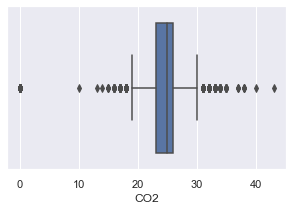

In [14]:
sns.set(rc = {'figure.figsize':(5,3)})
sns.boxplot(x= df["CO2"])

In [15]:
outliers=pd.DataFrame()
for column in df:
    if(df[column].dtype == np.int64 or df[column].dtype == np.float64):
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3-Q1
        lower_limit = Q1 - 1.5 * IQR
        upper_limit = Q3 + 1.5 * IQR
        local_outliers=((df[column] < lower_limit) | (df[column] > upper_limit))
        outliers=pd.concat([outliers,df[local_outliers]]).drop_duplicates().reset_index(drop=True)

    
outliers.shape

(22853, 105)

In [16]:
df = df[~df.apply(tuple,1).isin(outliers.apply(tuple,1))]
df

Gender  Age     Race            Education Level Marital Status  \
0      Female   44    Black  Some College or AA Degree        Married   
2        Male   73    White                High School        Married   
4        Male   19    White  Some College or AA Degree  Never Married   
7        Male   79    White                High School       Divorced   
14     Female   39    White               9-11th Grade        Married   
...       ...  ...      ...                        ...            ...   
36233  Female   75    White  College Graduate or Above       Divorced   
36242    Male   33    White                High School        Married   
36246  Female   75    White  Some College or AA Degree       Divorced   
36247    Male   60    Black               9-11th Grade        Partner   
36256    Male   42  Mexican                High School      Separated   

      Pregnant Household Income Asthma Anemia Ever Overweight  ...  \
0           No            $75K+     No     No              No  ...   
2           No       Below $25K     No     No             Yes  ...   
4           No            $75K+     No     No              No  ...   
7           No       Below $15K     No     No              No  ...   
14          No       Below $45K     No     No              No  ...   
...        ...              ...    ...    ...             ...  ...   
36233       No            $75K+     No     No             Yes  ...   
36242       No       Below $65K     No     No              No  ...   
36246       No       Below $25K     No     No             Yes  ...   
36247       No       Below $25K     No     No             Yes  ...   
36256       No       Below $25K    Yes     No             Yes  ...   

      Health Problem Senility Marijuana Use Cocaine Use Heroine Use Meth Use  \
0                          No            No          No          No       No   
2                          No            No          No          No       No   
4                          No            No          No          No       No   
7                          No            No          No          No       No   
14                         No           Yes          No          No       No   
...                       ...           ...         ...         ...      ...   
36233                      No            No          No          No       No   
36242                      No           Yes         Yes          No      Yes   
36246                      No            No          No          No       No   
36247                      No            No          No          No       No   
36256                      No            No          No          No       No   

      Inject Drugs Rehab Program Current Smoker Household Smokers  \
0               No            No             No                 4   
2               No            No             No                 4   
4               No            No             No                 4   
7               No            No          Never                 4   
14              No            No             No                 4   
...            ...           ...            ...               ...   
36233           No            No             No                 0   
36242           No            No      Every Day                 2   
36246           No            No          Never                 0   
36247           No            No             No                 0   
36256           No            No          Never                 0   

          Depression  
0      Not Depressed  
2      Not Depressed  
4      Not Depressed  
7      Not Depressed  
14     Not Depressed  
...              ...  
36233  Not Depressed  
36242  Not Depressed  
36246  Not Depressed  
36247  Not Depressed  
36256  Not Depressed  

[13406 rows x 105 columns]

# VISUALIZATION

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

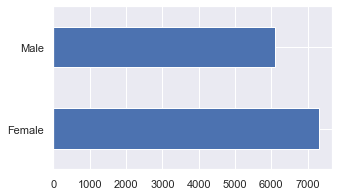

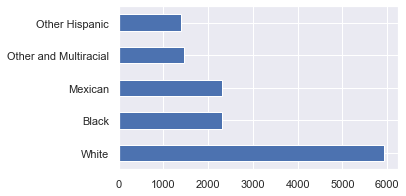

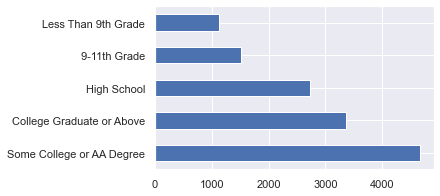

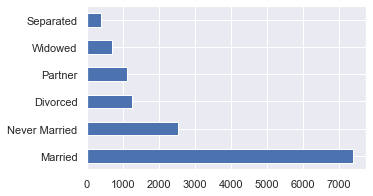

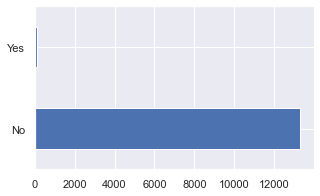

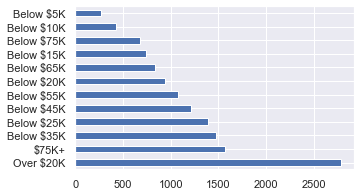

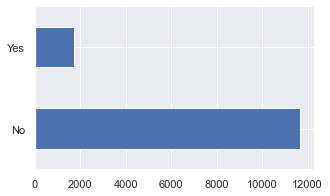

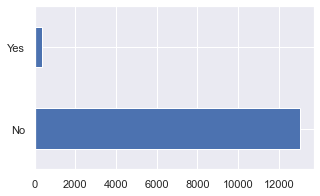

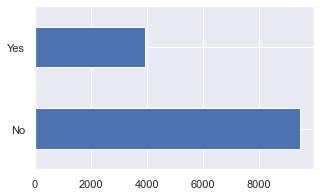

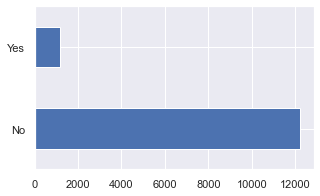

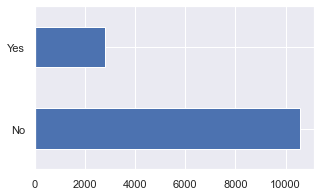

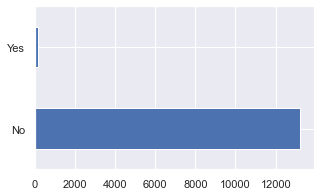

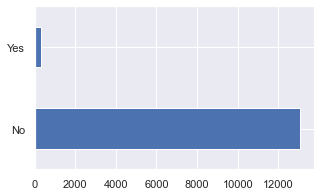

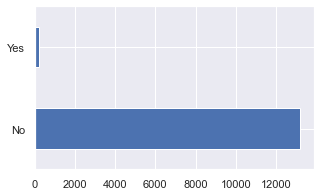

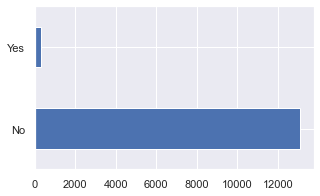

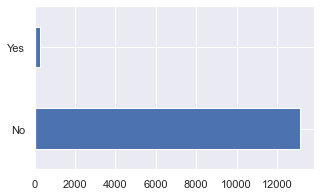

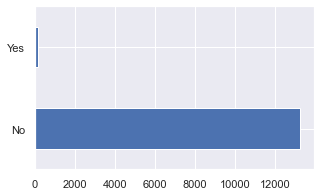

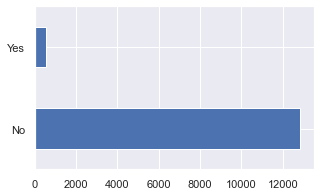

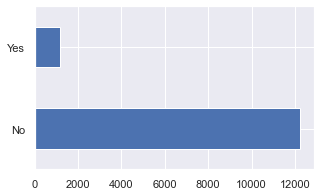

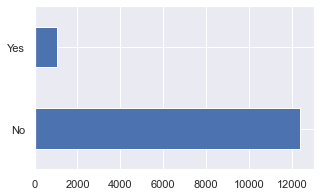

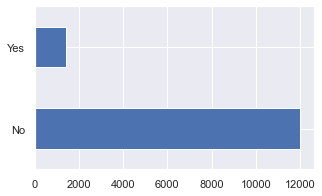

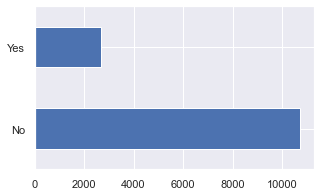

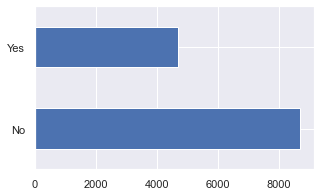

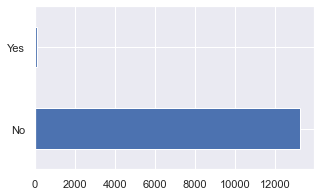

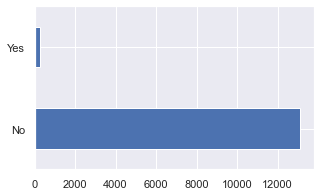

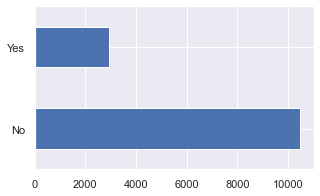

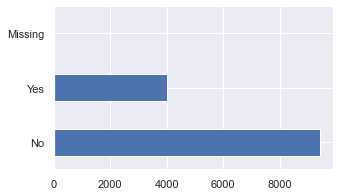

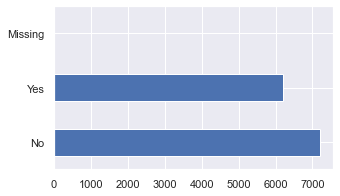

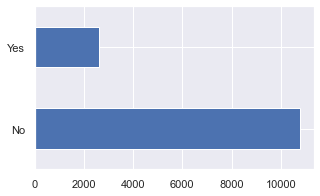

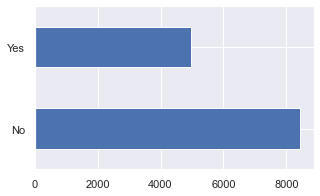

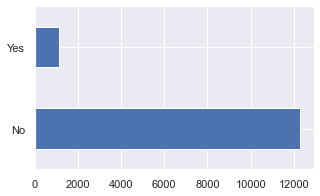

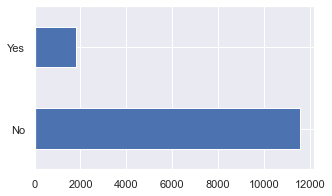

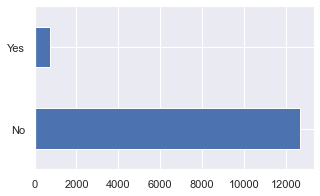

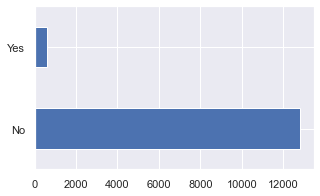

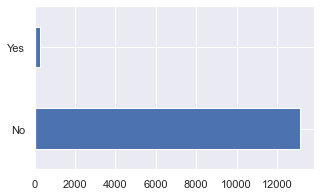

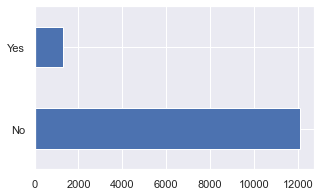

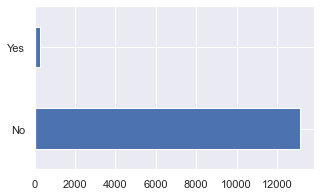

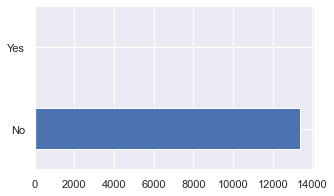

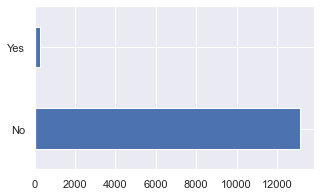

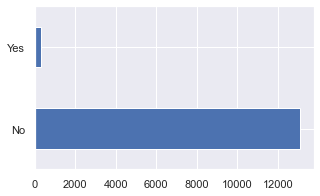

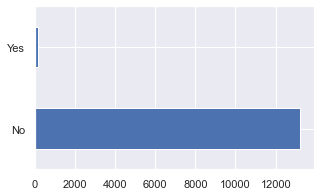

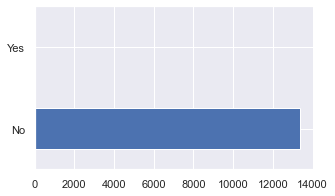

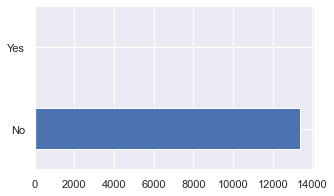

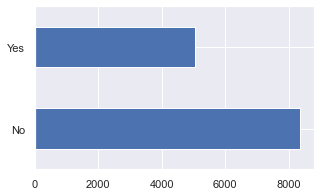

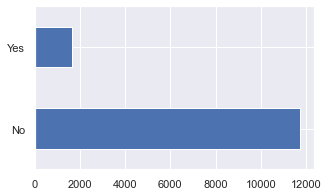

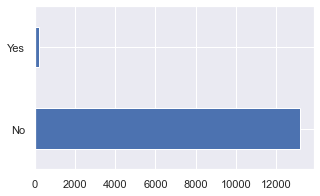

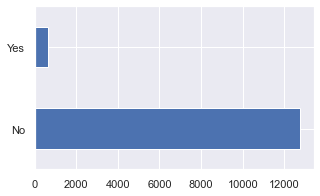

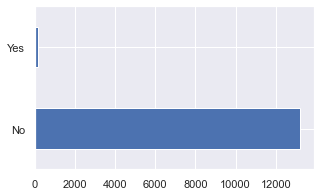

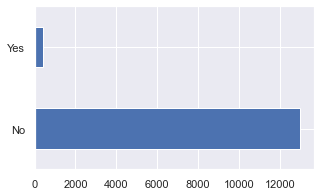

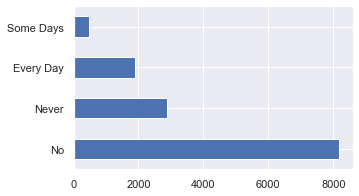

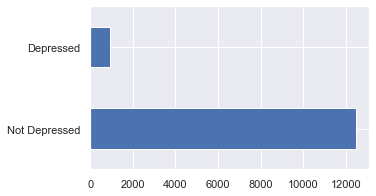

In [23]:
cols=df.select_dtypes(include=['object', 'category']).columns
for i in cols:
    df[i].value_counts().plot.barh(); 
    plt.show()


C:\Users\yucel\anaconda3\lib\site-packages\seaborn\axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


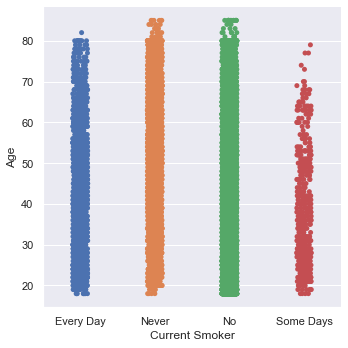

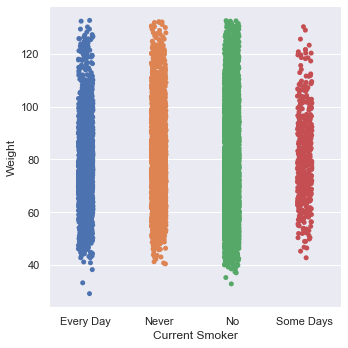

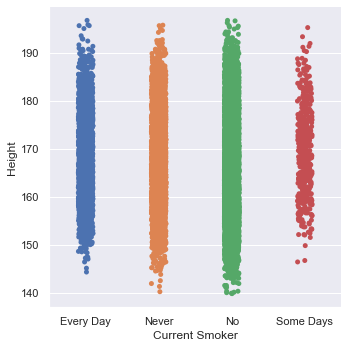

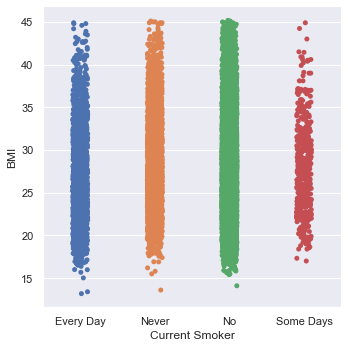

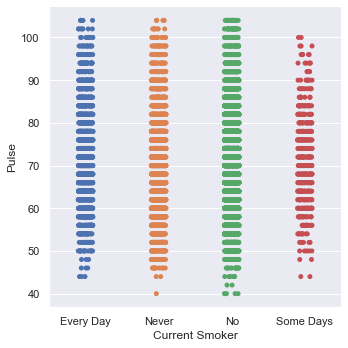

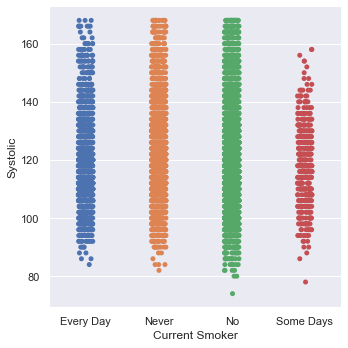

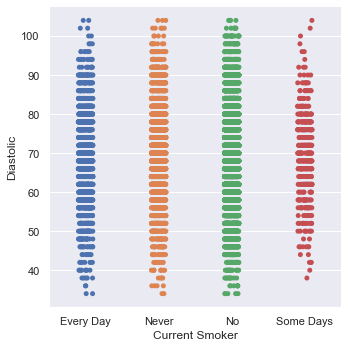

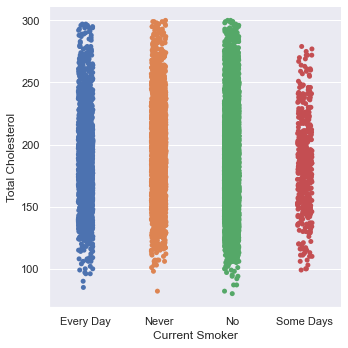

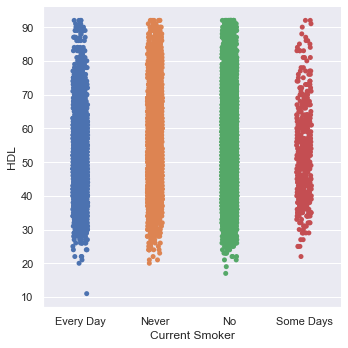

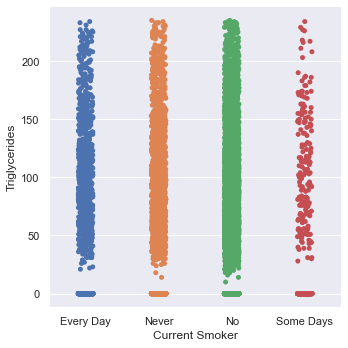

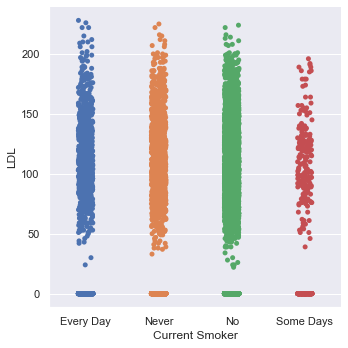

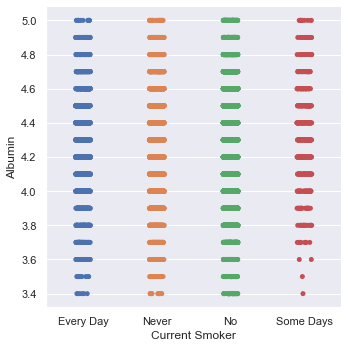

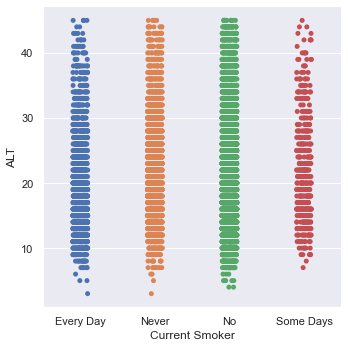

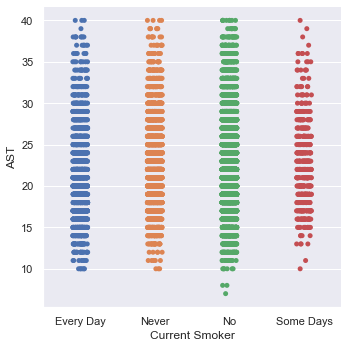

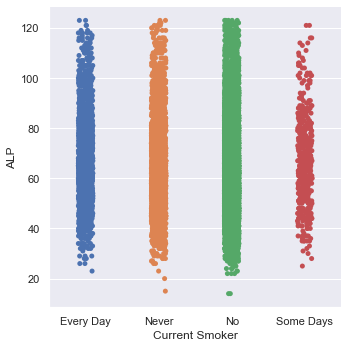

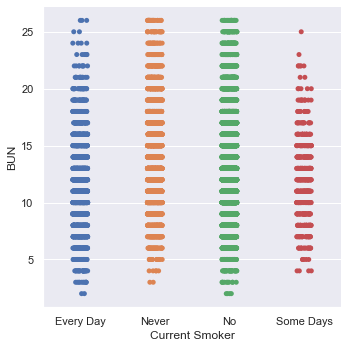

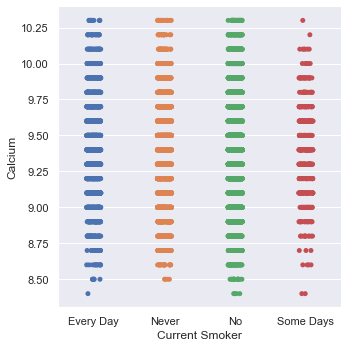

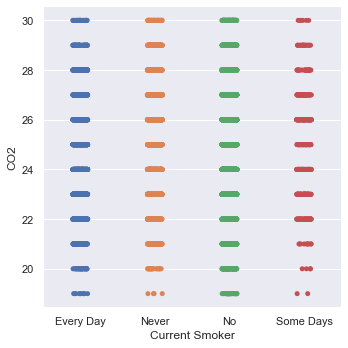

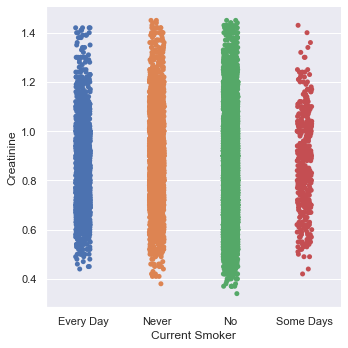

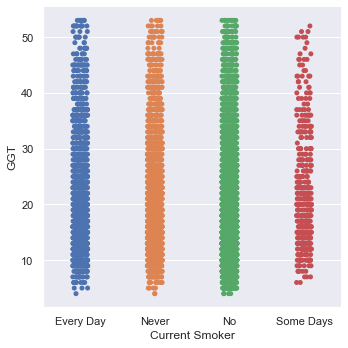

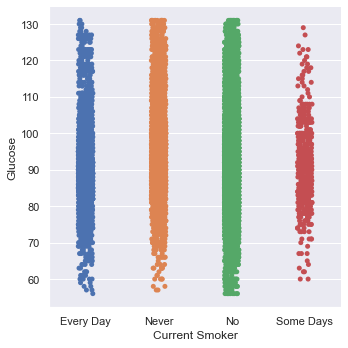

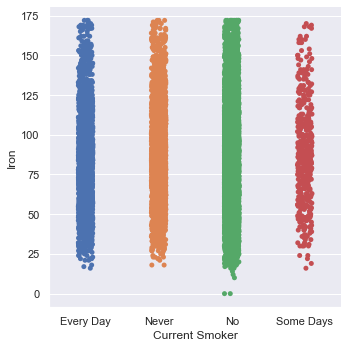

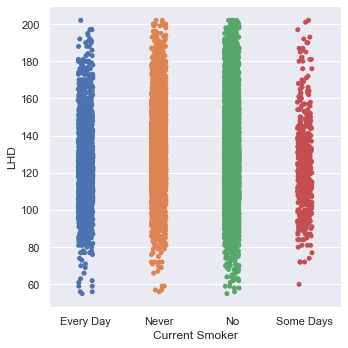

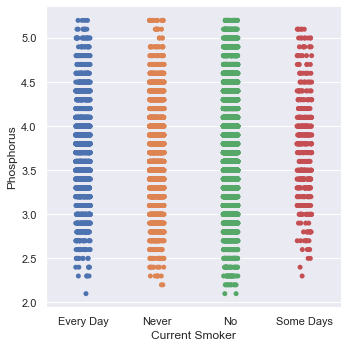

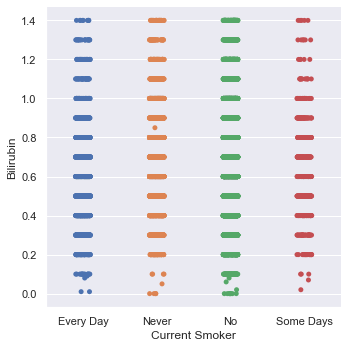

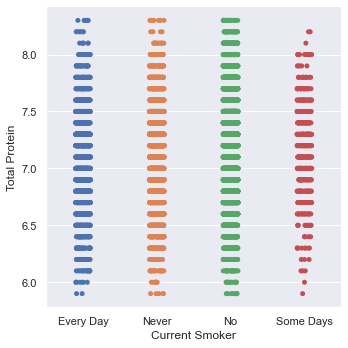

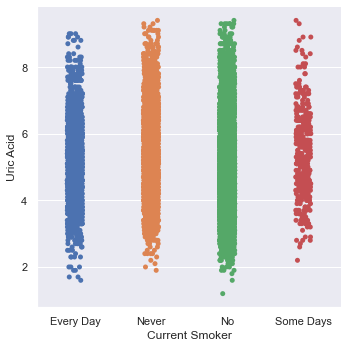

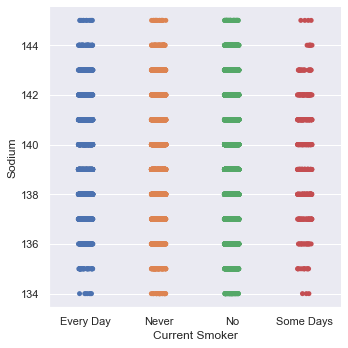

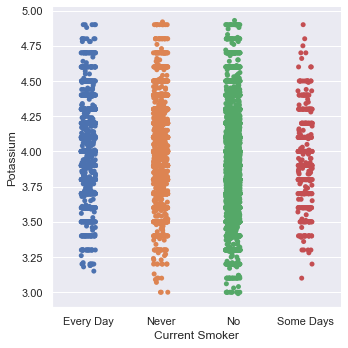

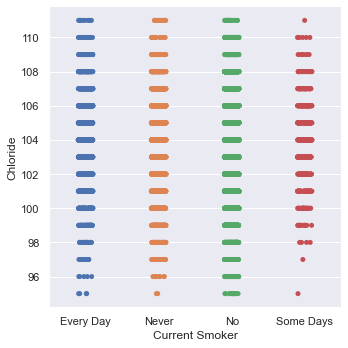

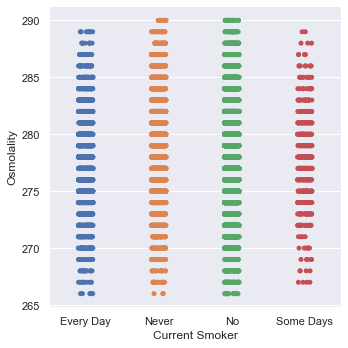

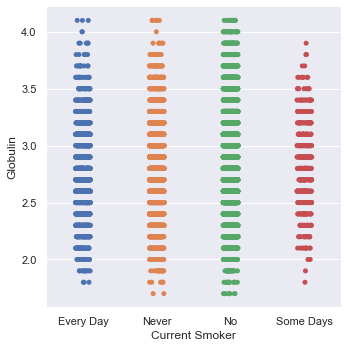

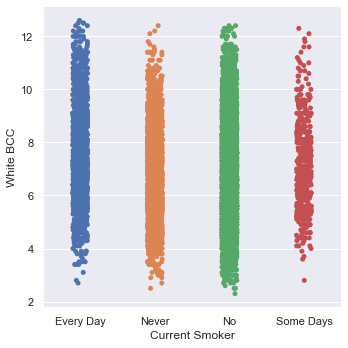

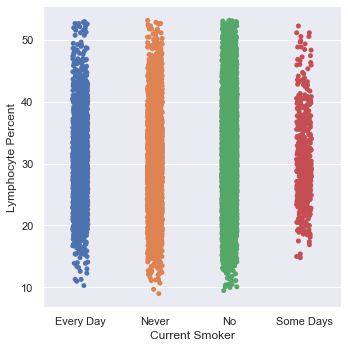

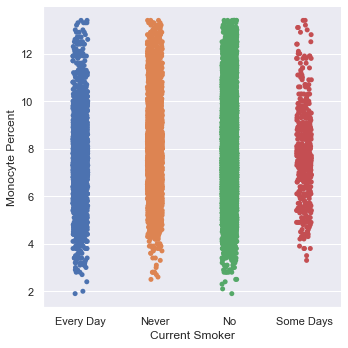

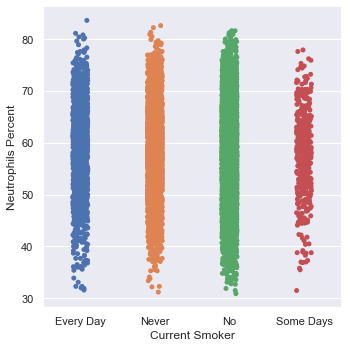

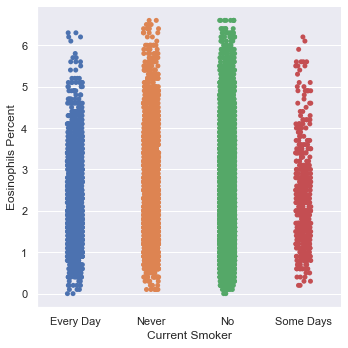

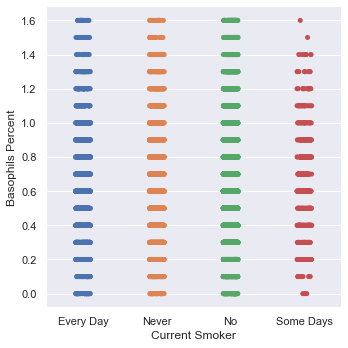

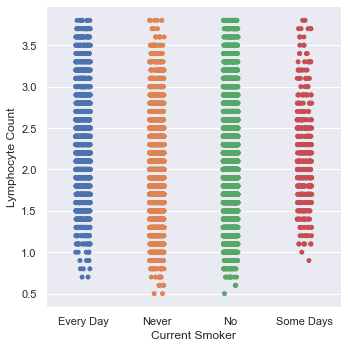

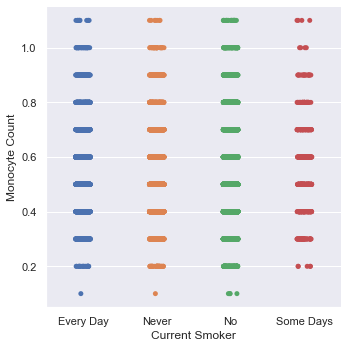

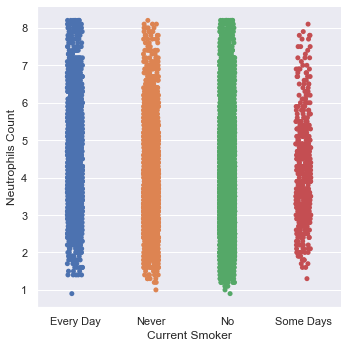

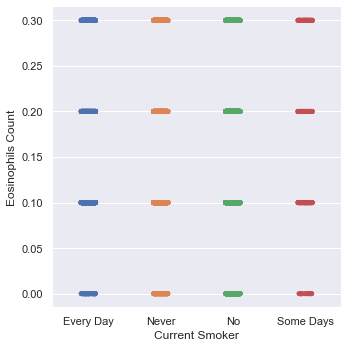

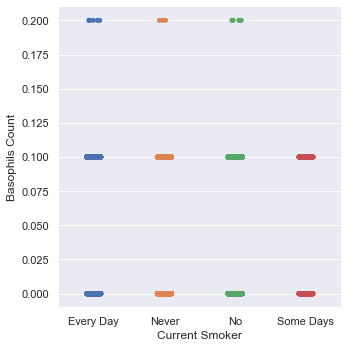

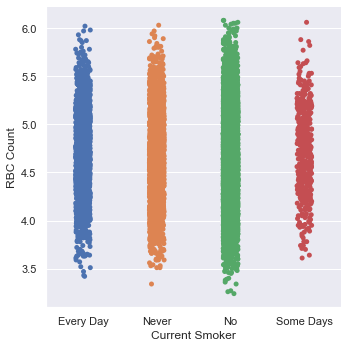

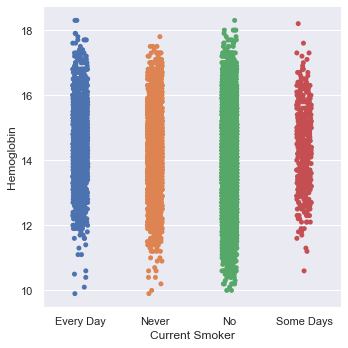

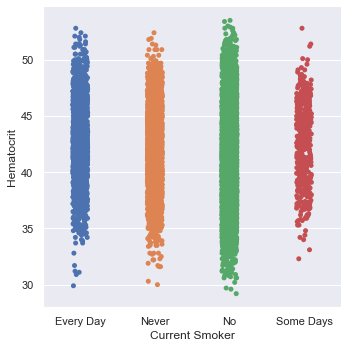

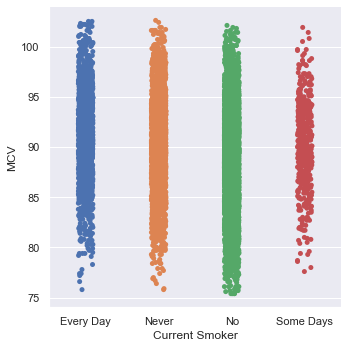

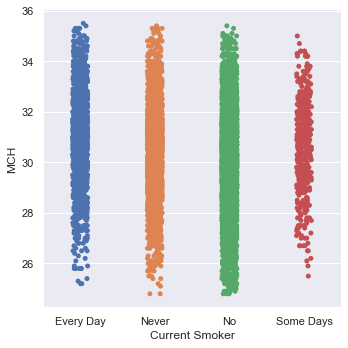

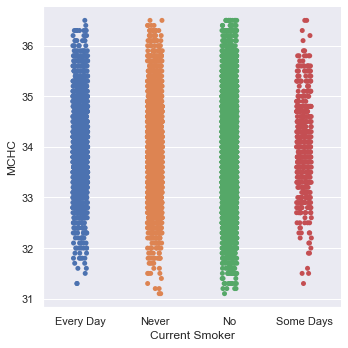

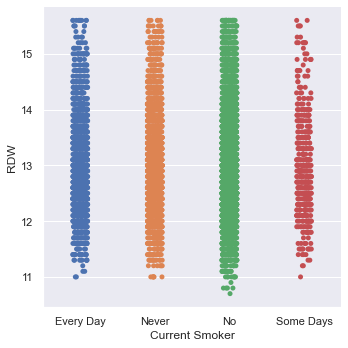

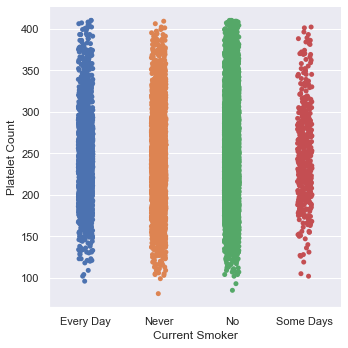

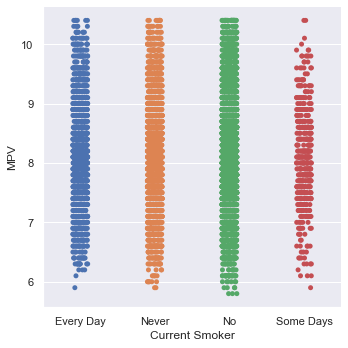

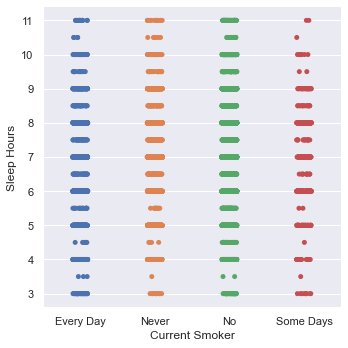

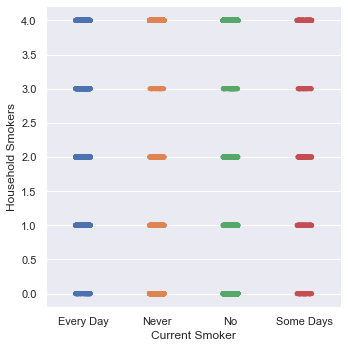

In [26]:
cols = df.select_dtypes([np.number]).columns
for i in cols:
    sns.catplot(x = "Current Smoker", y = i , data = df);

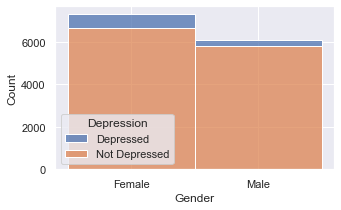

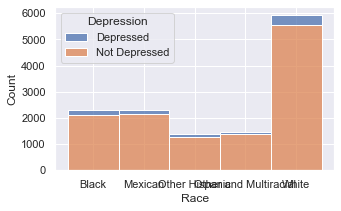

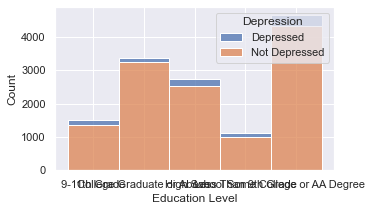

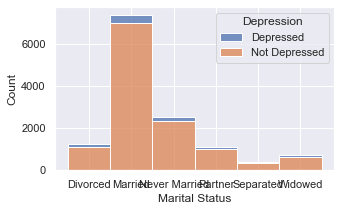

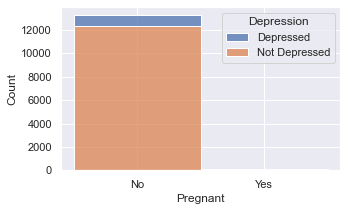

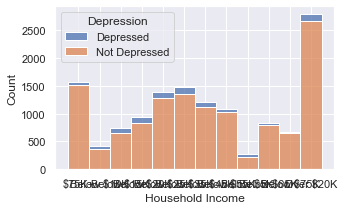

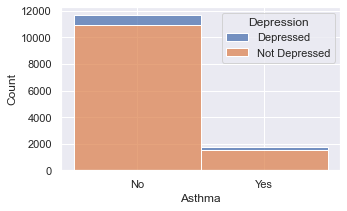

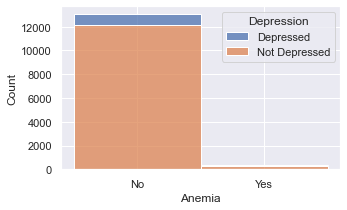

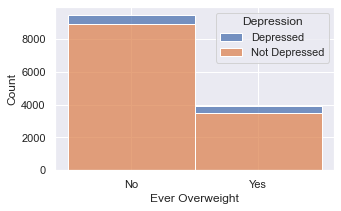

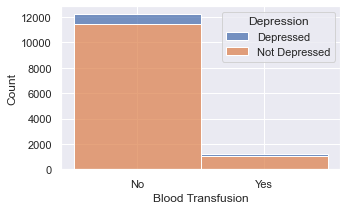

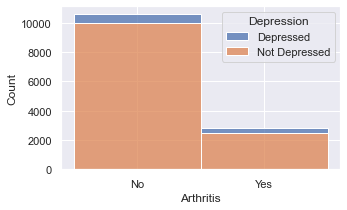

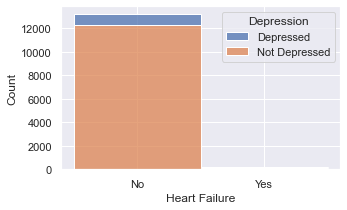

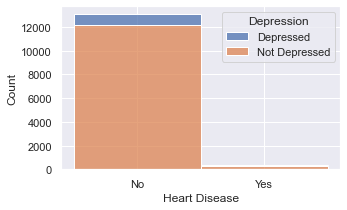

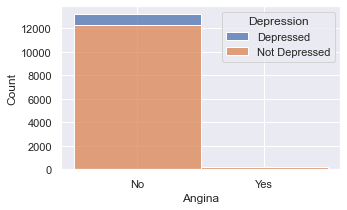

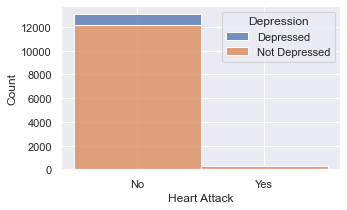

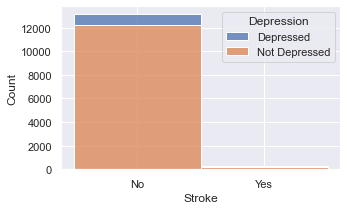

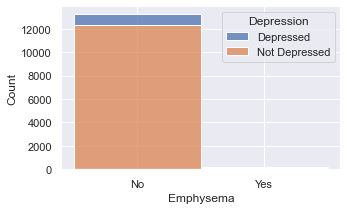

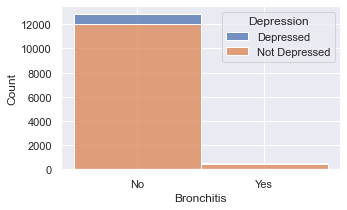

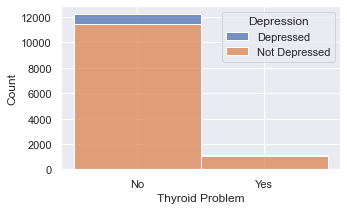

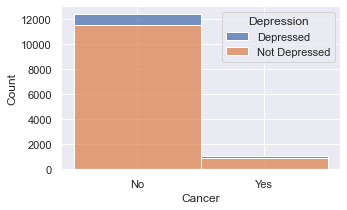

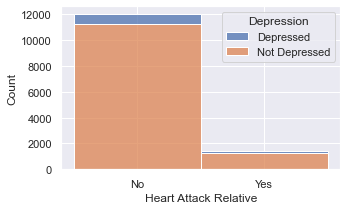

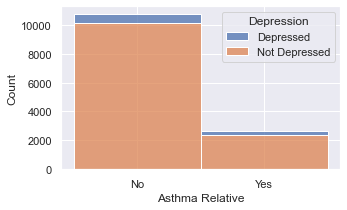

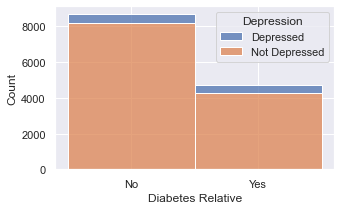

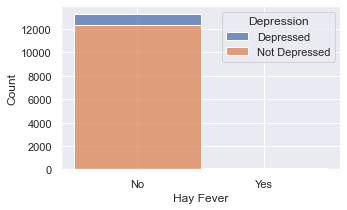

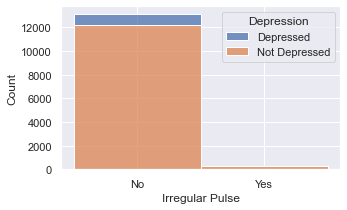

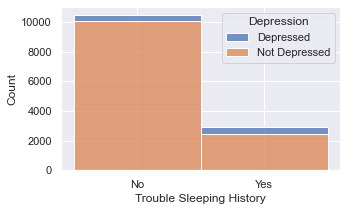

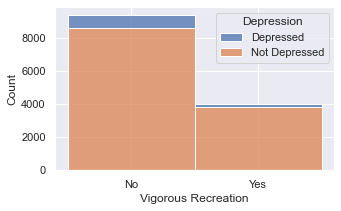

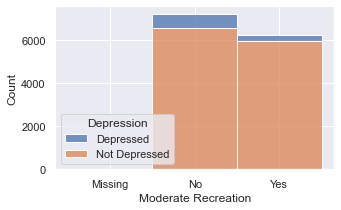

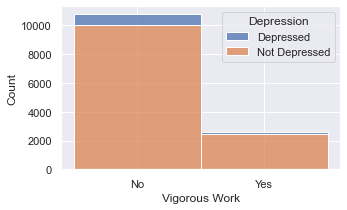

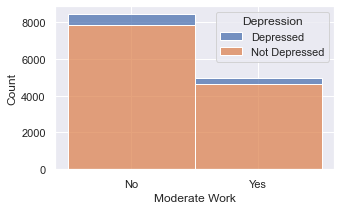

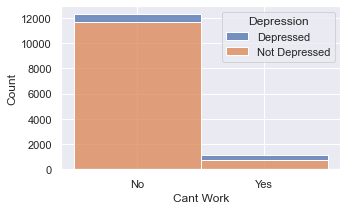

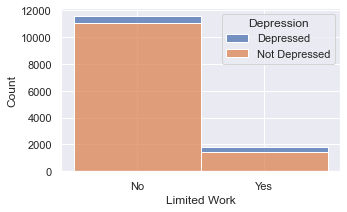

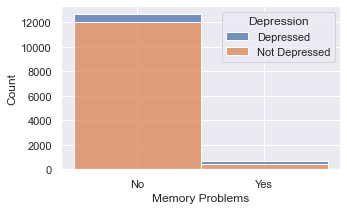

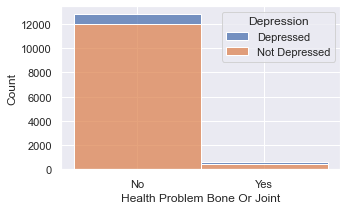

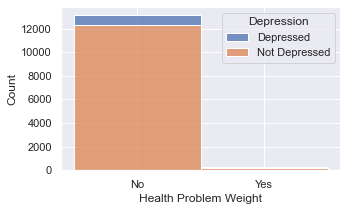

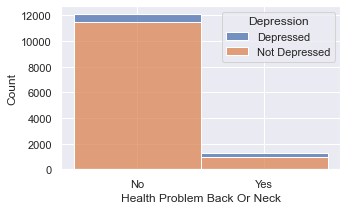

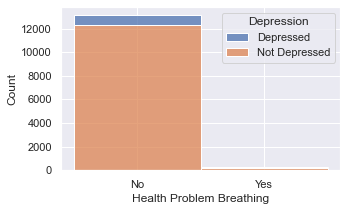

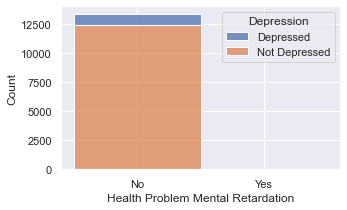

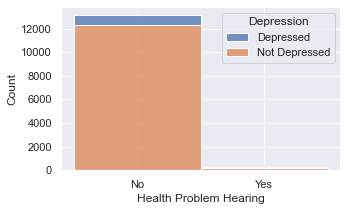

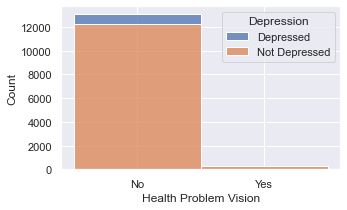

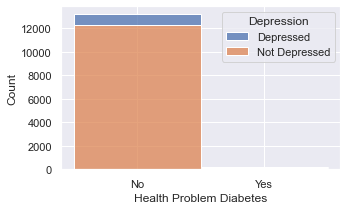

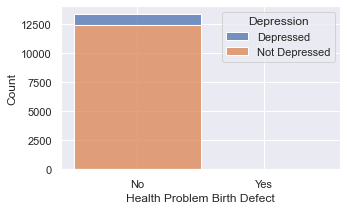

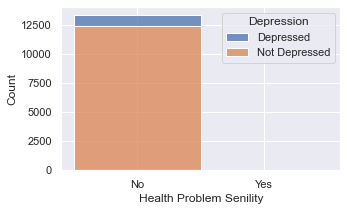

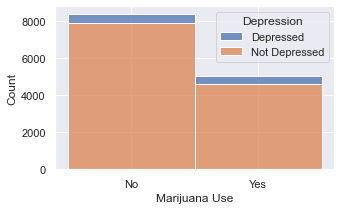

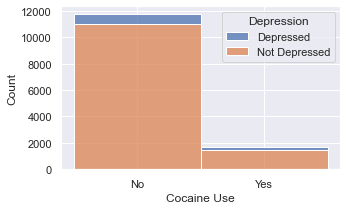

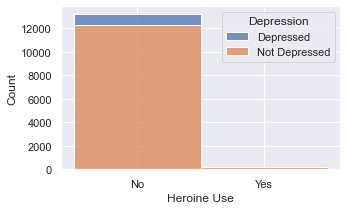

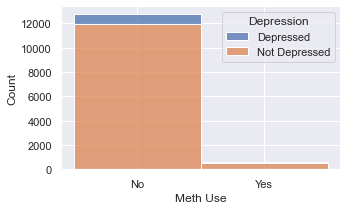

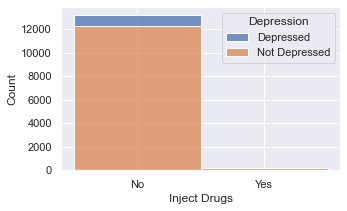

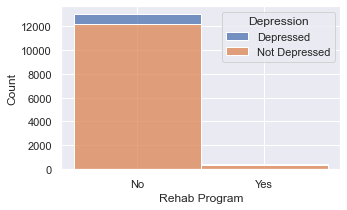

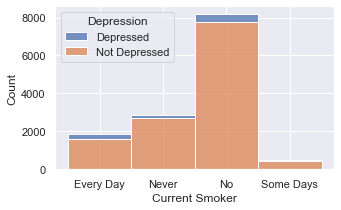

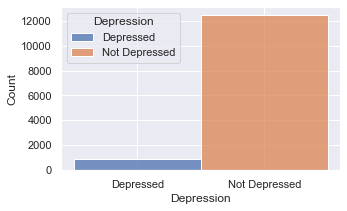

In [31]:
cols=df.select_dtypes(include=['object', 'category']).columns
for i in cols:
 sns.histplot(binwidth=0.5, x=i, hue="Depression", data=df, stat="count", multiple="stack")
 plt.show()

In [ ]:
#sns.pairplot(df); ## fanım bozuk daha fazla çalıştıramam bunu

## NORMALIZATION

In [34]:
df_norm = df.reindex()
norm_cols = df.select_dtypes([np.number]).columns
df_norm[norm_cols] = df_norm[norm_cols].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
df_norm

Gender       Age     Race            Education Level Marital Status  \
0      Female  0.388060    Black  Some College or AA Degree        Married   
2        Male  0.820896    White                High School        Married   
4        Male  0.014925    White  Some College or AA Degree  Never Married   
7        Male  0.910448    White                High School       Divorced   
14     Female  0.313433    White               9-11th Grade        Married   
...       ...       ...      ...                        ...            ...   
36233  Female  0.850746    White  College Graduate or Above       Divorced   
36242    Male  0.223881    White                High School        Married   
36246  Female  0.850746    White  Some College or AA Degree       Divorced   
36247    Male  0.626866    Black               9-11th Grade        Partner   
36256    Male  0.358209  Mexican                High School      Separated   

      Pregnant Household Income Asthma Anemia Ever Overweight  ...  \
0           No            $75K+     No     No              No  ...   
2           No       Below $25K     No     No             Yes  ...   
4           No            $75K+     No     No              No  ...   
7           No       Below $15K     No     No              No  ...   
14          No       Below $45K     No     No              No  ...   
...        ...              ...    ...    ...             ...  ...   
36233       No            $75K+     No     No             Yes  ...   
36242       No       Below $65K     No     No              No  ...   
36246       No       Below $25K     No     No             Yes  ...   
36247       No       Below $25K     No     No             Yes  ...   
36256       No       Below $25K    Yes     No             Yes  ...   

      Health Problem Senility Marijuana Use Cocaine Use Heroine Use Meth Use  \
0                          No            No          No          No       No   
2                          No            No          No          No       No   
4                          No            No          No          No       No   
7                          No            No          No          No       No   
14                         No           Yes          No          No       No   
...                       ...           ...         ...         ...      ...   
36233                      No            No          No          No       No   
36242                      No           Yes         Yes          No      Yes   
36246                      No            No          No          No       No   
36247                      No            No          No          No       No   
36256                      No            No          No          No       No   

      Inject Drugs Rehab Program Current Smoker Household Smokers  \
0               No            No             No               1.0   
2               No            No             No               1.0   
4               No            No             No               1.0   
7               No            No          Never               1.0   
14              No            No             No               1.0   
...            ...           ...            ...               ...   
36233           No            No             No               0.0   
36242           No            No      Every Day               0.5   
36246           No            No          Never               0.0   
36247           No            No             No               0.0   
36256           No            No          Never               0.0   

          Depression  
0      Not Depressed  
2      Not Depressed  
4      Not Depressed  
7      Not Depressed  
14     Not Depressed  
...              ...  
36233  Not Depressed  
36242  Not Depressed  
36246  Not Depressed  
36247  Not Depressed  
36256  Not Depressed  

[13406 rows x 105 columns]

## TRANSFORMATION

In [35]:
df_one_hot = df_norm
trans_cols=df.select_dtypes(include=['object', 'category']).columns
trans_cols=trans_cols.drop('Depression');

In [36]:
for i in trans_cols:
    df_one_hot = pd.get_dummies(df_one_hot, columns = [i], prefix=[i])
    
df_one_hot

Age    Weight    Height       BMI    Pulse  Systolic  Diastolic  \
0      0.388060  0.444981  0.284710  0.553750  0.28125  0.744681   0.571429   
2      0.820896  0.702703  0.748682  0.545312  0.15625  0.595745   0.485714   
4      0.014925  0.456564  0.776801  0.293438  0.43750  0.361702   0.400000   
7      0.910448  0.539575  0.555360  0.492188  0.40625  0.744681   0.571429   
14     0.313433  0.607143  0.384886  0.687812  0.84375  0.638298   0.685714   
...         ...       ...       ...       ...      ...       ...        ...   
36233  0.850746  0.347490  0.244288  0.450625  0.50000  0.510638   0.400000   
36242  0.223881  0.339768  0.518453  0.288125  0.31250  0.255319   0.542857   
36246  0.850746  0.966216  0.565905  0.953750  0.59375  0.531915   0.485714   
36247  0.626866  0.845560  0.759227  0.675625  0.75000  0.553191   0.685714   
36256  0.358209  0.659266  0.441125  0.706875  0.59375  0.531915   0.600000   

       Total Cholesterol       HDL  Triglycerides  ...  Meth Use_No  \
0               0.113636  0.345679       0.365957  ...            1   
2               0.481818  0.469136       0.829787  ...            1   
4               0.127273  0.407407       0.000000  ...            1   
7               0.459091  0.864198       0.212766  ...            1   
14              0.531818  0.358025       0.000000  ...            1   
...                  ...       ...            ...  ...          ...   
36233           0.940909  0.395062       0.000000  ...            1   
36242           0.304545  0.469136       0.221277  ...            0   
36246           0.590909  0.296296       0.000000  ...            1   
36247           0.509091  0.716049       0.374468  ...            1   
36256           0.463636  0.469136       0.000000  ...            1   

       Meth Use_Yes  Inject Drugs_No  Inject Drugs_Yes  Rehab Program_No  \
0                 0                1                 0                 1   
2                 0                1                 0                 1   
4                 0                1                 0                 1   
7                 0                1                 0                 1   
14                0                1                 0                 1   
...             ...              ...               ...               ...   
36233             0                1                 0                 1   
36242             1                1                 0                 1   
36246             0                1                 0                 1   
36247             0                1                 0                 1   
36256             0                1                 0                 1   

       Rehab Program_Yes  Current Smoker_Every Day  Current Smoker_Never  \
0                      0                         0                     0   
2                      0                         0                     0   
4                      0                         0                     0   
7                      0                         0                     1   
14                     0                         0                     0   
...                  ...                       ...                   ...   
36233                  0                         0                     0   
36242                  0                         1                     0   
36246                  0                         0                     1   
36247                  0                         0                     0   
36256                  0                         0                     1   

       Current Smoker_No  Current Smoker_Some Days  
0                      1                         0  
2                      1                         0  
4                      1                         0  
7                      0                         0  
14                     1                         0  
...                  ...                       ...  
36233        

In [37]:
cols_at_end = ['Depression']
df_one_hot = df_one_hot[[c for c in df_one_hot if c not in cols_at_end] 
        + [c for c in cols_at_end if c in df_one_hot]]
df_one_hot.head()

Age    Weight    Height       BMI    Pulse  Systolic  Diastolic  \
0   0.388060  0.444981  0.284710  0.553750  0.28125  0.744681   0.571429   
2   0.820896  0.702703  0.748682  0.545312  0.15625  0.595745   0.485714   
4   0.014925  0.456564  0.776801  0.293438  0.43750  0.361702   0.400000   
7   0.910448  0.539575  0.555360  0.492188  0.40625  0.744681   0.571429   
14  0.313433  0.607143  0.384886  0.687812  0.84375  0.638298   0.685714   

    Total Cholesterol       HDL  Triglycerides  ...  Meth Use_Yes  \
0            0.113636  0.345679       0.365957  ...             0   
2            0.481818  0.469136       0.829787  ...             0   
4            0.127273  0.407407       0.000000  ...             0   
7            0.459091  0.864198       0.212766  ...             0   
14           0.531818  0.358025       0.000000  ...             0   

    Inject Drugs_No  Inject Drugs_Yes  Rehab Program_No  Rehab Program_Yes  \
0                 1                 0                 1                  0   
2                 1                 0                 1                  0   
4                 1                 0                 1                  0   
7                 1                 0                 1                  0   
14                1                 0                 1                  0   

    Current Smoker_Every Day  Current Smoker_Never  Current Smoker_No  \
0                          0                     0                  1   
2                          0                     0                  1   
4                          0                     0                  1   
7                          0                     1                  0   
14                         0                     0                  1   

    Current Smoker_Some Days     Depression  
0                          0  Not Depressed  
2                          0  Not Depressed  
4                          0  Not Depressed  
7                          0  Not Depressed  
14                         0  Not Depressed  

[5 rows x 179 columns]

In [38]:
tdf = df_one_hot.copy()

In [39]:
tdf.to_csv('Modelling.csv')

## OVER SAMPLING

In [40]:
df = pd.read_csv("Modelling.csv")
df.head()

Unnamed: 0       Age    Weight    Height       BMI    Pulse  Systolic  \
0           0  0.388060  0.444981  0.284710  0.553750  0.28125  0.744681   
1           2  0.820896  0.702703  0.748682  0.545312  0.15625  0.595745   
2           4  0.014925  0.456564  0.776801  0.293438  0.43750  0.361702   
3           7  0.910448  0.539575  0.555360  0.492188  0.40625  0.744681   
4          14  0.313433  0.607143  0.384886  0.687812  0.84375  0.638298   

   Diastolic  Total Cholesterol       HDL  ...  Meth Use_Yes  Inject Drugs_No  \
0   0.571429           0.113636  0.345679  ...             0                1   
1   0.485714           0.481818  0.469136  ...             0                1   
2   0.400000           0.127273  0.407407  ...             0                1   
3   0.571429           0.459091  0.864198  ...             0                1   
4   0.685714           0.531818  0.358025  ...             0                1   

   Inject Drugs_Yes  Rehab Program_No  Rehab Program_Yes  \
0                 0                 1                  0   
1                 0                 1                  0   
2                 0                 1                  0   
3                 0                 1                  0   
4                 0                 1                  0   

   Current Smoker_Every Day  Current Smoker_Never  Current Smoker_No  \
0                         0                     0                  1   
1                         0                     0                  1   
2                         0                     0                  1   
3                         0                     1                  0   
4                         0                     0                  1   

   Current Smoker_Some Days     Depression  
0                         0  Not Depressed  
1                         0  Not Depressed  
2                         0  Not Depressed  
3                         0  Not Depressed  
4                         0  Not Depressed  

[5 rows x 180 columns]

In [41]:
df= df.drop(columns=['Unnamed: 0'])
df.head()

Age    Weight    Height       BMI    Pulse  Systolic  Diastolic  \
0  0.388060  0.444981  0.284710  0.553750  0.28125  0.744681   0.571429   
1  0.820896  0.702703  0.748682  0.545312  0.15625  0.595745   0.485714   
2  0.014925  0.456564  0.776801  0.293438  0.43750  0.361702   0.400000   
3  0.910448  0.539575  0.555360  0.492188  0.40625  0.744681   0.571429   
4  0.313433  0.607143  0.384886  0.687812  0.84375  0.638298   0.685714   

   Total Cholesterol       HDL  Triglycerides  ...  Meth Use_Yes  \
0           0.113636  0.345679       0.365957  ...             0   
1           0.481818  0.469136       0.829787  ...             0   
2           0.127273  0.407407       0.000000  ...             0   
3           0.459091  0.864198       0.212766  ...             0   
4           0.531818  0.358025       0.000000  ...             0   

   Inject Drugs_No  Inject Drugs_Yes  Rehab Program_No  Rehab Program_Yes  \
0                1                 0                 1                  0   
1                1                 0                 1                  0   
2                1                 0                 1                  0   
3                1                 0                 1                  0   
4                1                 0                 1                  0   

   Current Smoker_Every Day  Current Smoker_Never  Current Smoker_No  \
0                         0                     0                  1   
1                         0                     0                  1   
2                         0                     0                  1   
3                         0                     1                  0   
4                         0                     0                  1   

   Current Smoker_Some Days     Depression  
0                         0  Not Depressed  
1                         0  Not Depressed  
2                         0  Not Depressed  
3                         0  Not Depressed  
4                         0  Not Depressed  

[5 rows x 179 columns]

In [42]:
import imblearn

In [43]:
from imblearn.over_sampling import SMOTE

In [44]:
X = df.drop("Depression",axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13406 entries, 0 to 13405
Columns: 178 entries, Age to Current Smoker_Some Days
dtypes: float64(54), int64(124)
memory usage: 18.2 MB


In [45]:
y=df["Depression"]
y.head()

0    Not Depressed
1    Not Depressed
2    Not Depressed
3    Not Depressed
4    Not Depressed
Name: Depression, dtype: object

In [46]:
smote = SMOTE()

In [47]:
X_smote, y_smote = smote.fit_resample(X,y)

In [48]:
from collections import Counter
print("Before SMOTE :" , Counter(y))
print("After SMOTE :" , Counter(y_smote))

Before SMOTE : Counter({'Not Depressed': 12464, 'Depressed': 942})
After SMOTE : Counter({'Not Depressed': 12464, 'Depressed': 12464})


In [49]:
X_smote["Depression"]=y_smote

In [50]:
X_smote.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24928 entries, 0 to 24927
Columns: 179 entries, Age to Depression
dtypes: float64(54), int64(124), object(1)
memory usage: 34.0+ MB


In [51]:
X=X_smote
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24928 entries, 0 to 24927
Columns: 179 entries, Age to Depression
dtypes: float64(54), int64(124), object(1)
memory usage: 34.0+ MB


# VISUALIZATION 2

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\yucel\anaconda3\lib\site-packages\seaborn\axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


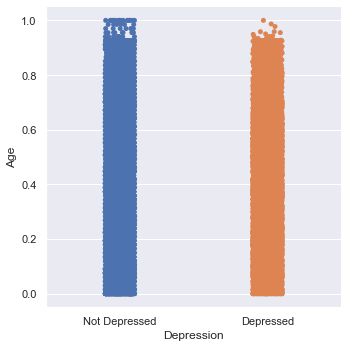

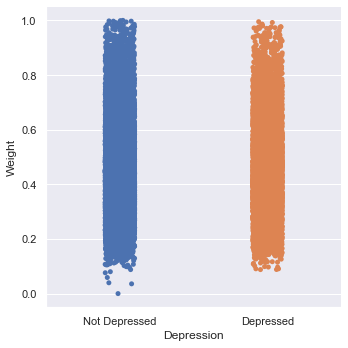

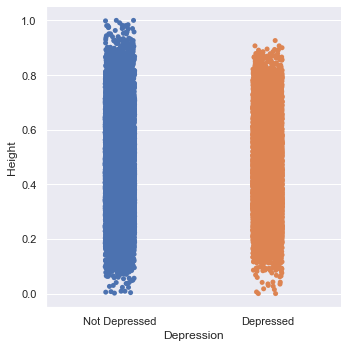

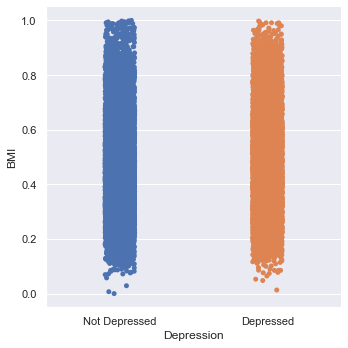

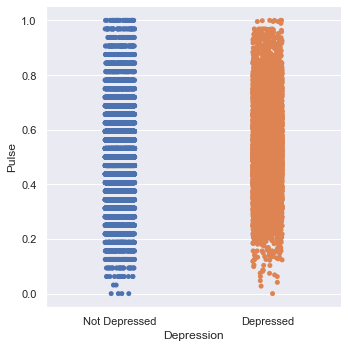

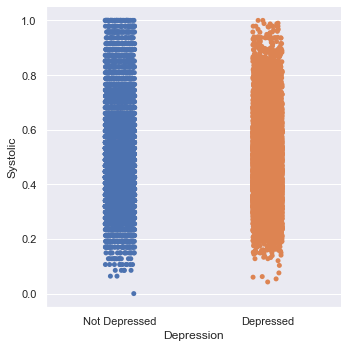

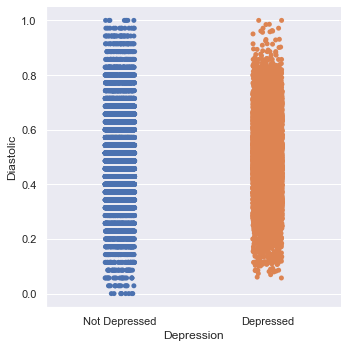

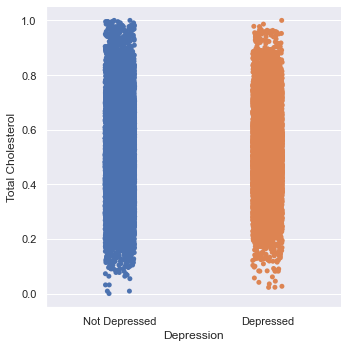

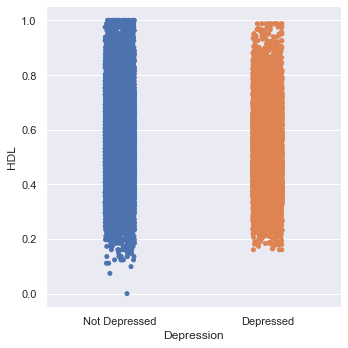

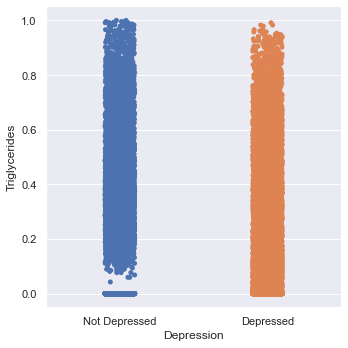

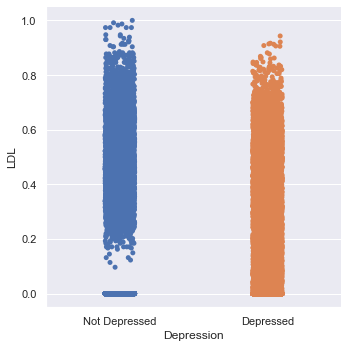

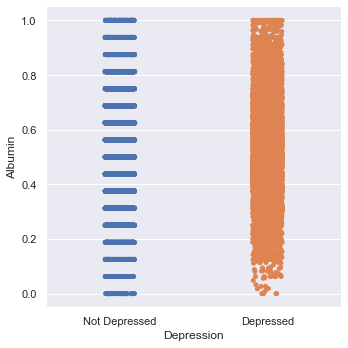

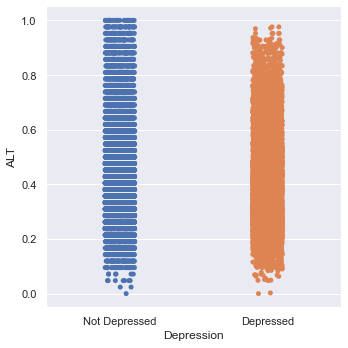

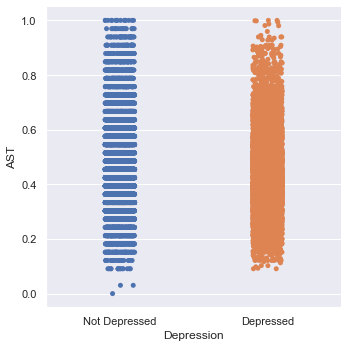

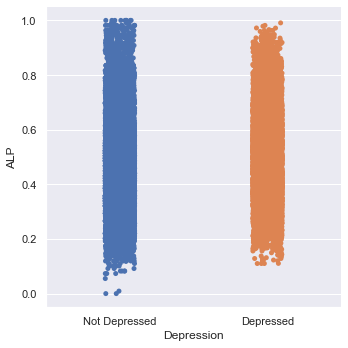

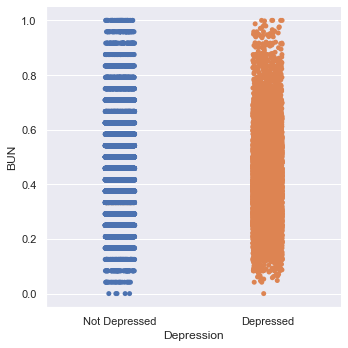

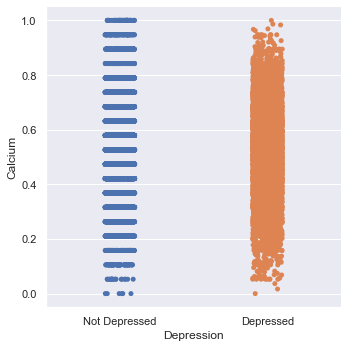

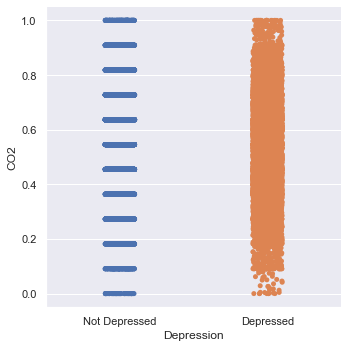

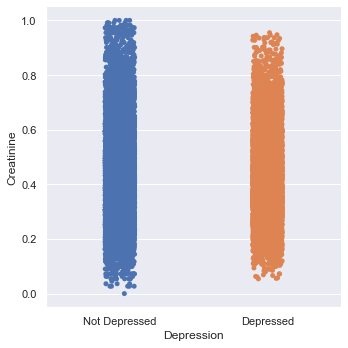

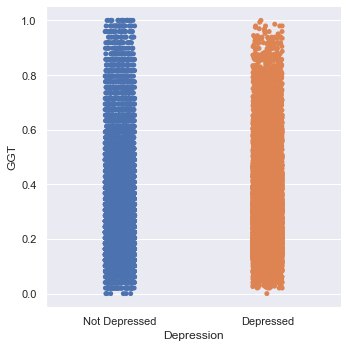

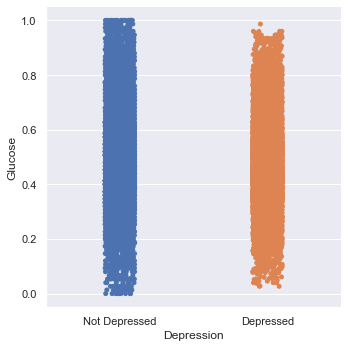

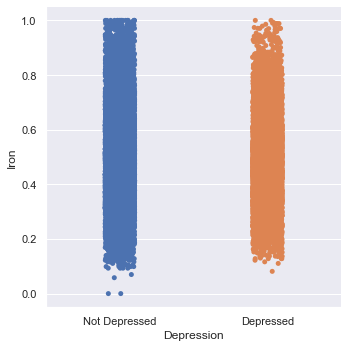

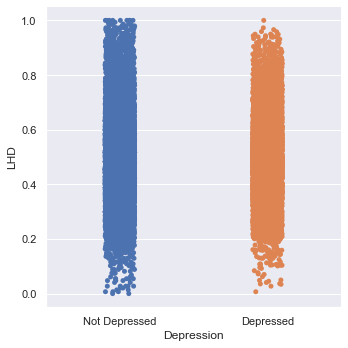

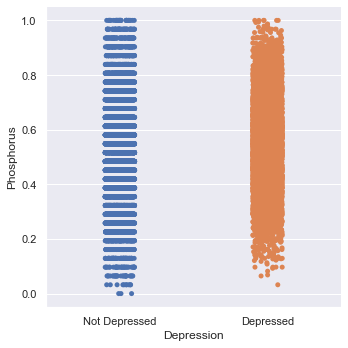

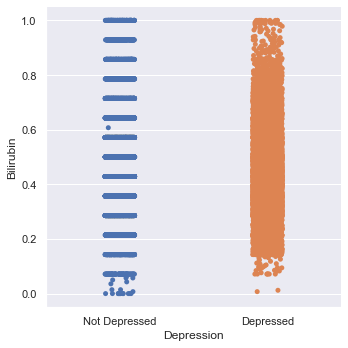

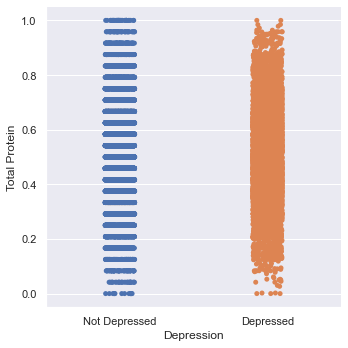

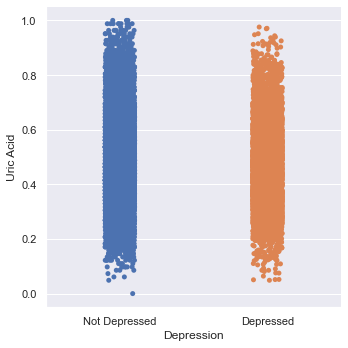

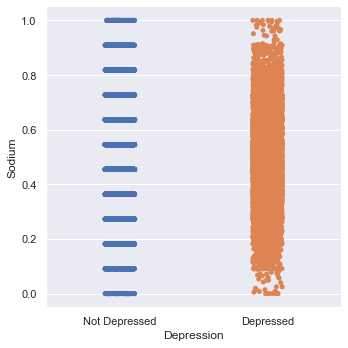

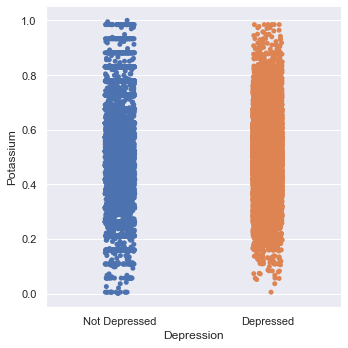

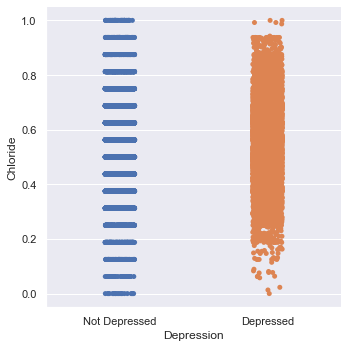

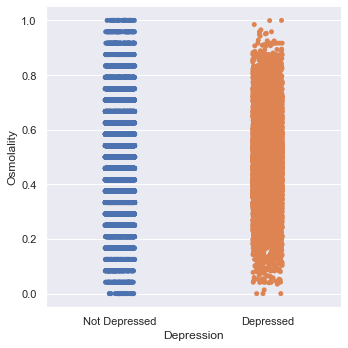

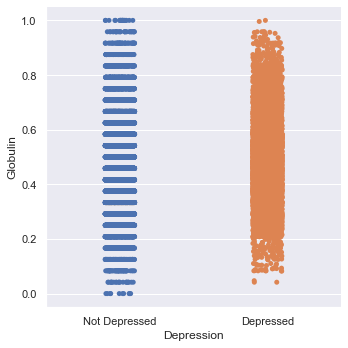

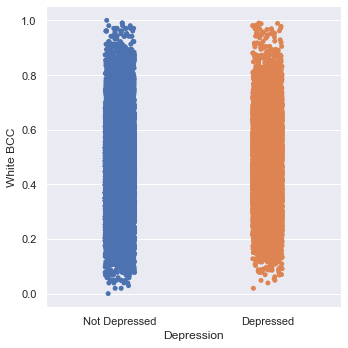

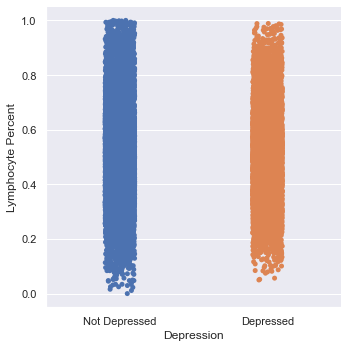

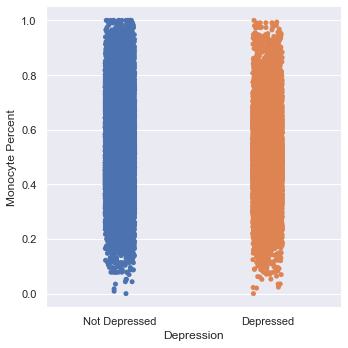

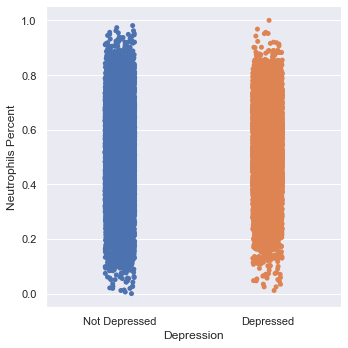

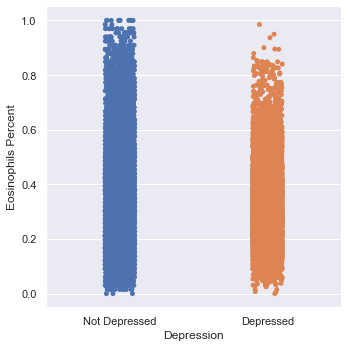

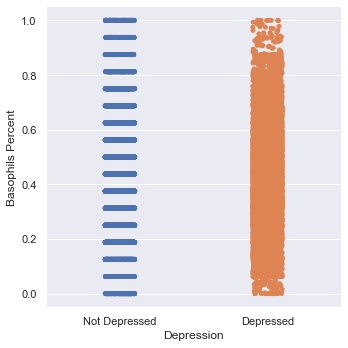

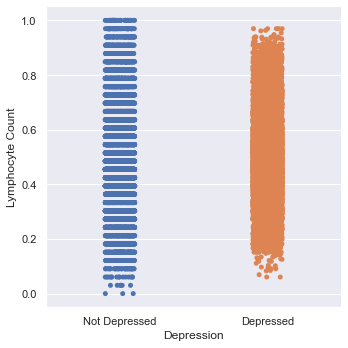

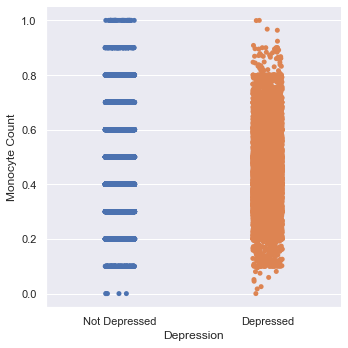

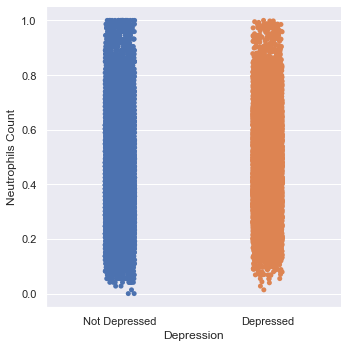

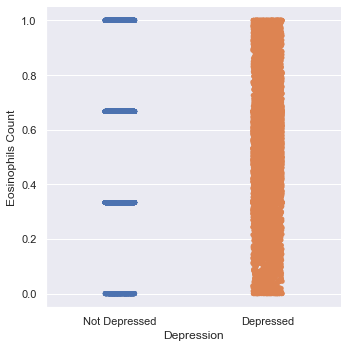

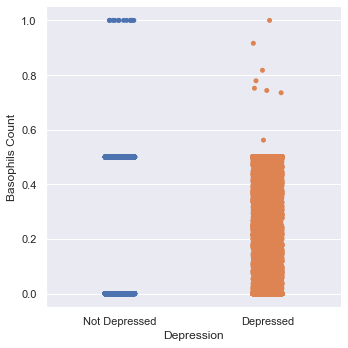

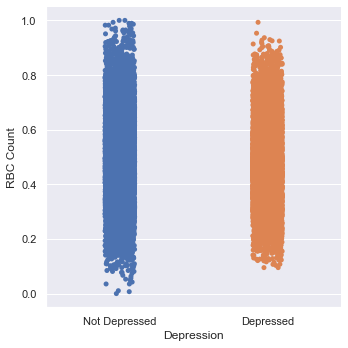

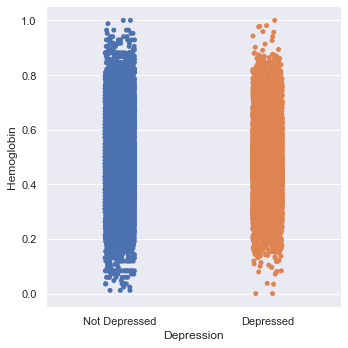

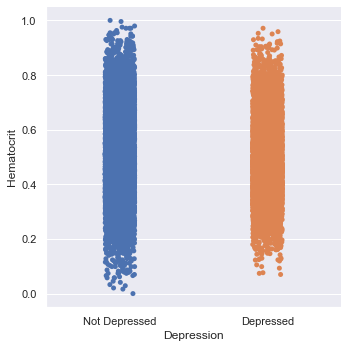

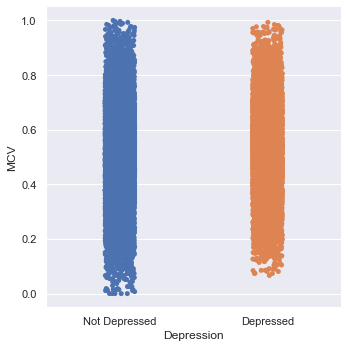

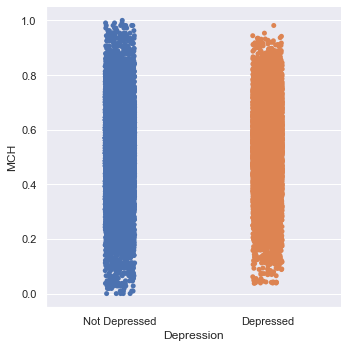

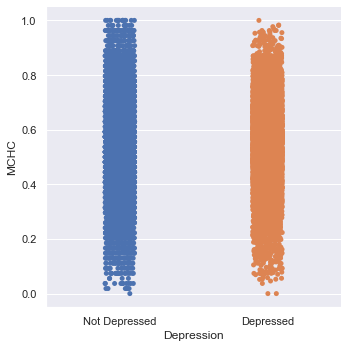

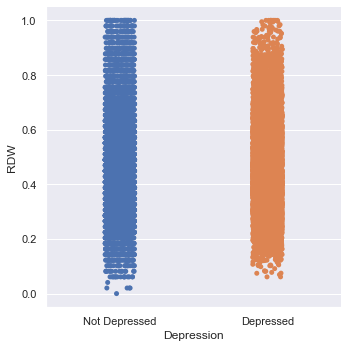

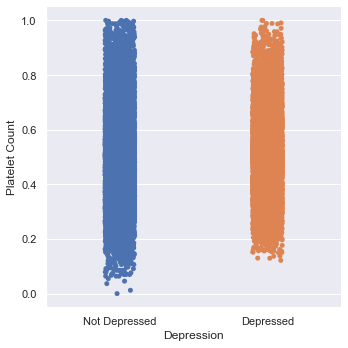

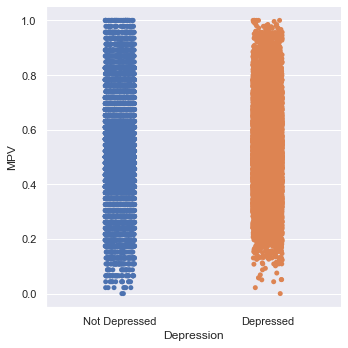

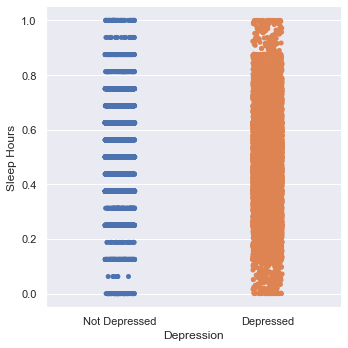

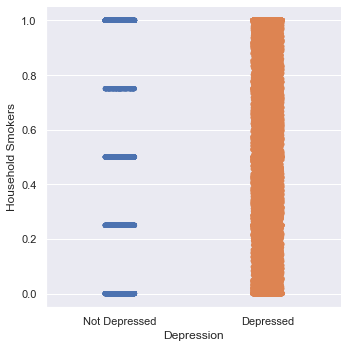

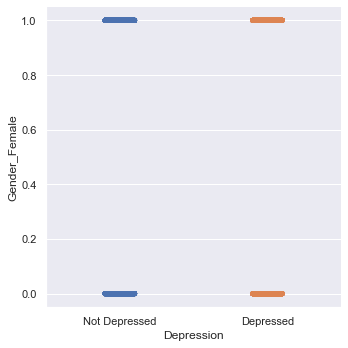

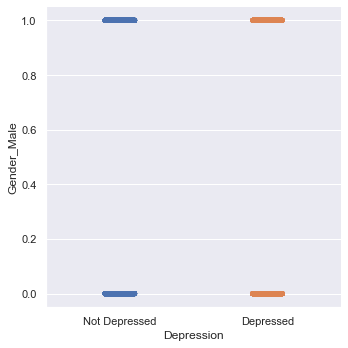

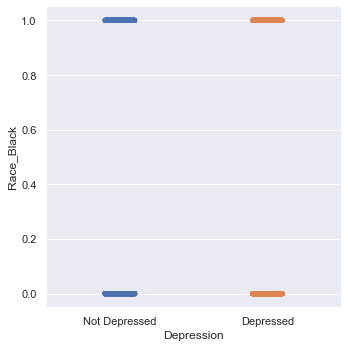

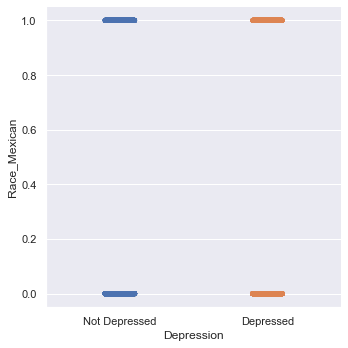

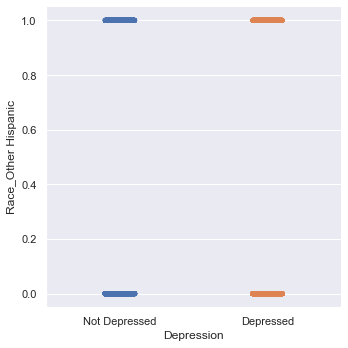

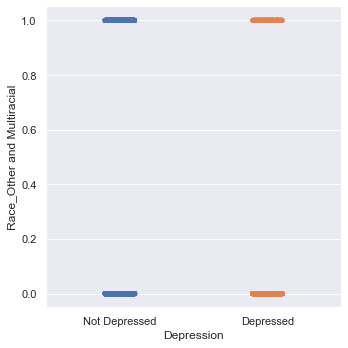

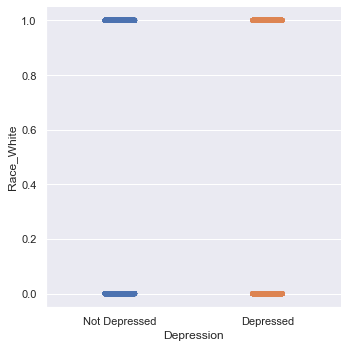

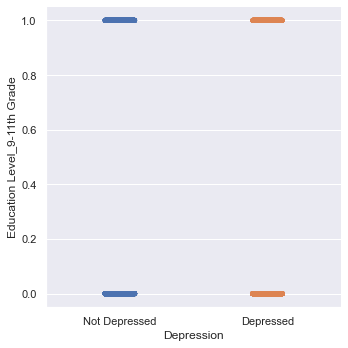

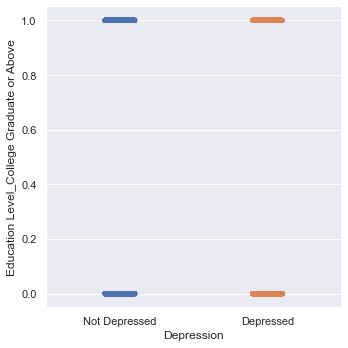

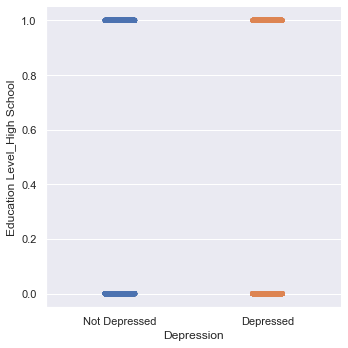

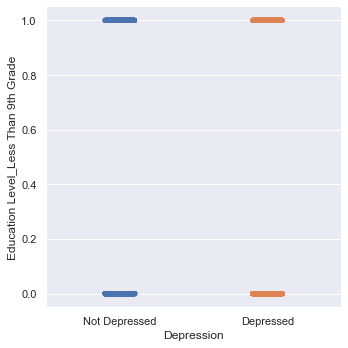

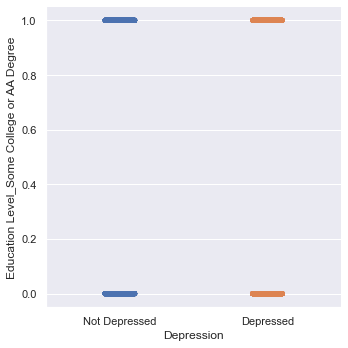

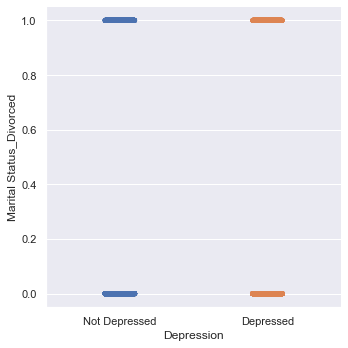

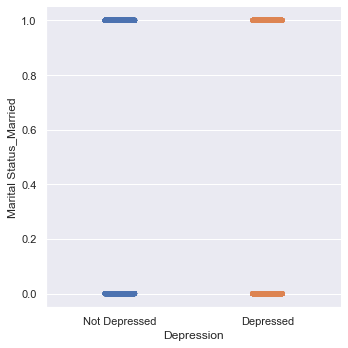

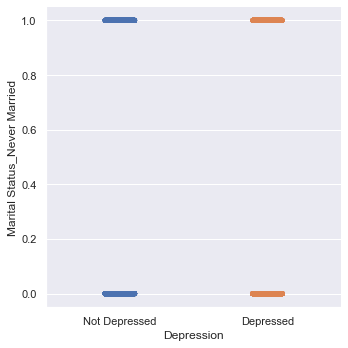

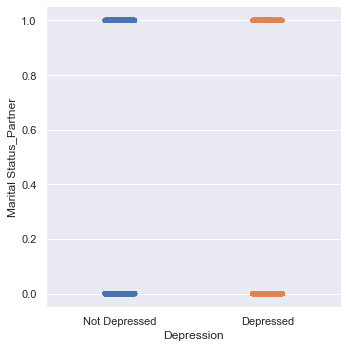

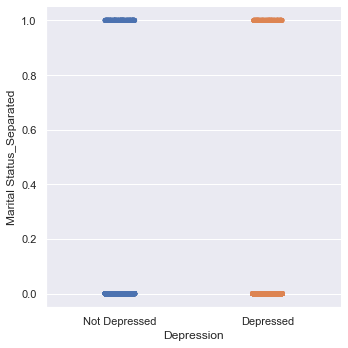

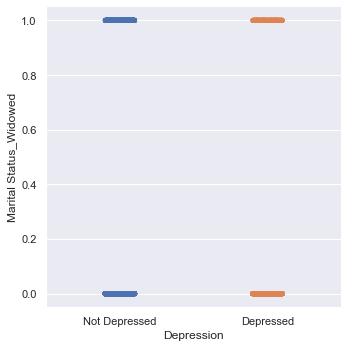

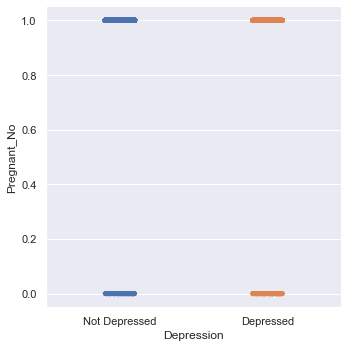

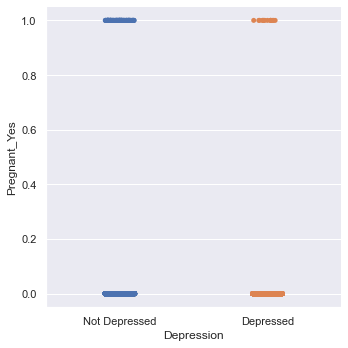

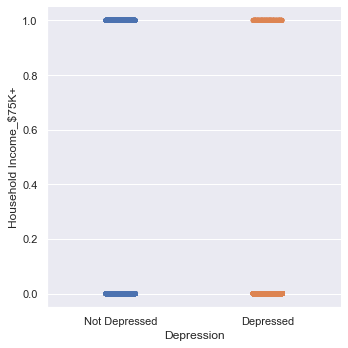

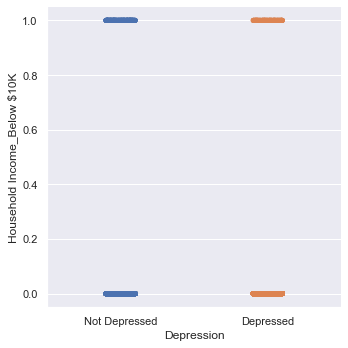

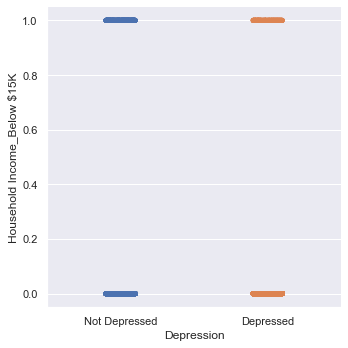

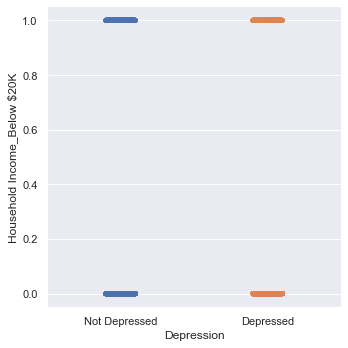

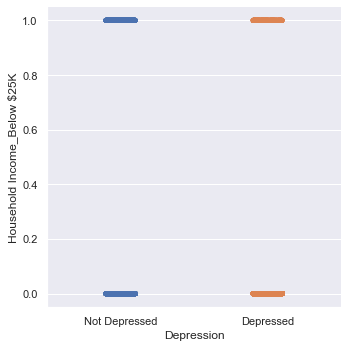

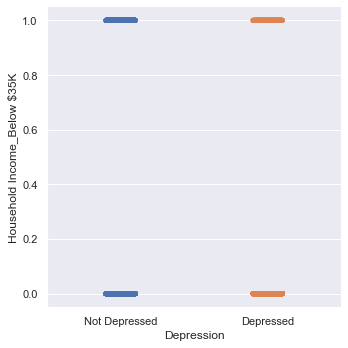

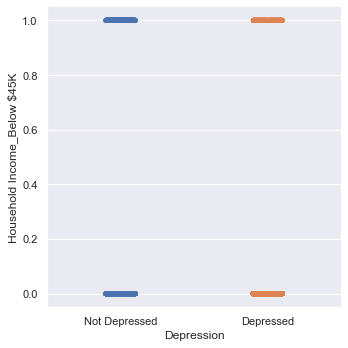

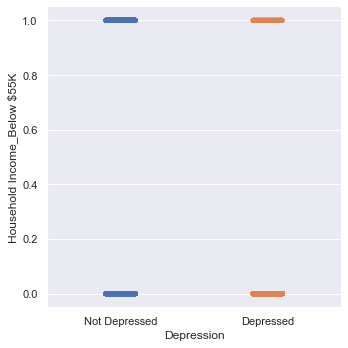

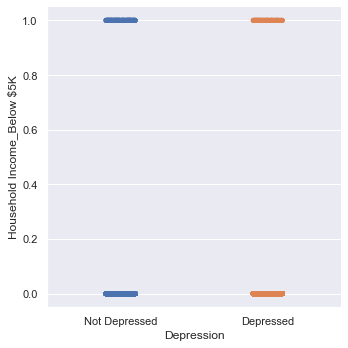

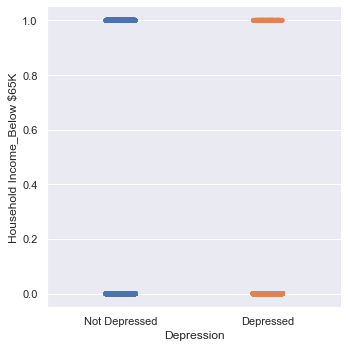

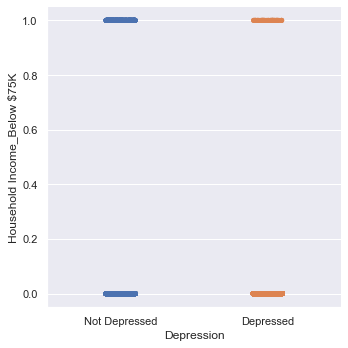

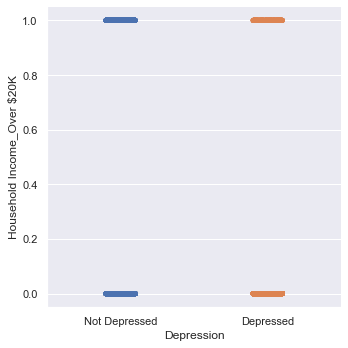

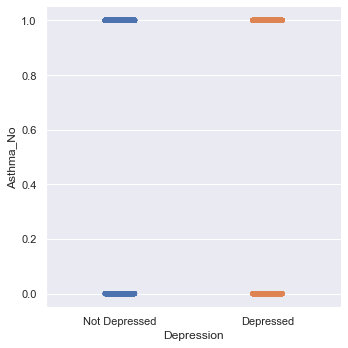

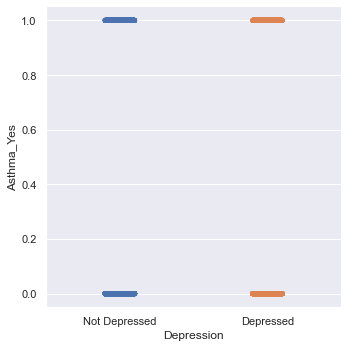

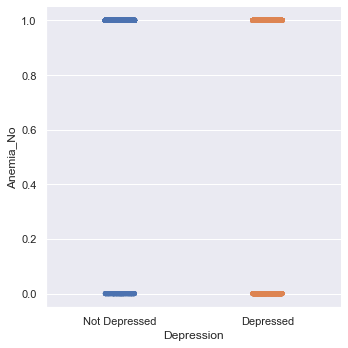

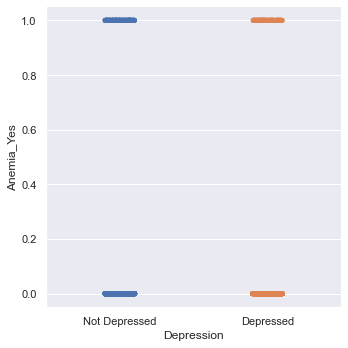

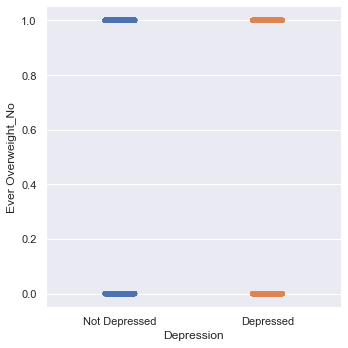

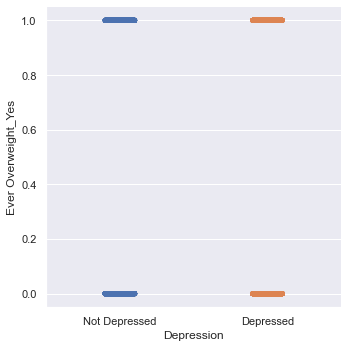

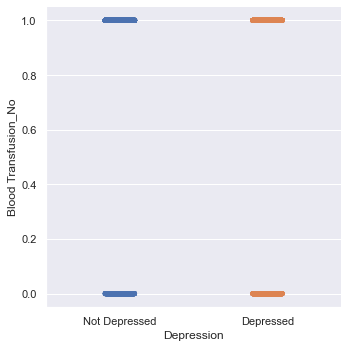

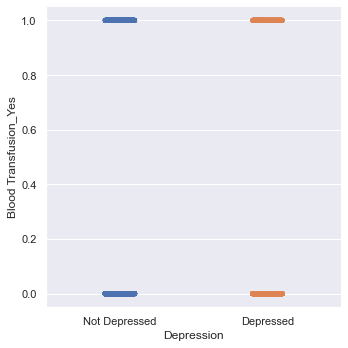

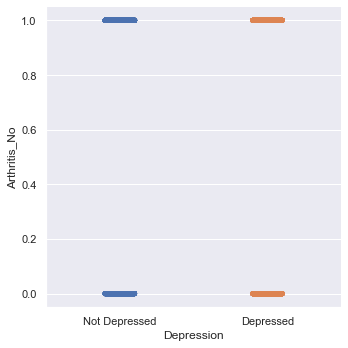

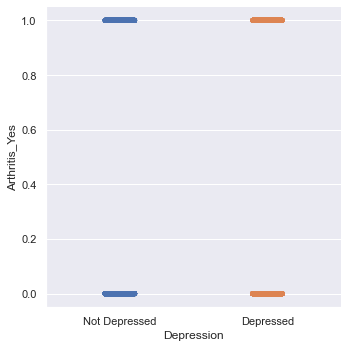

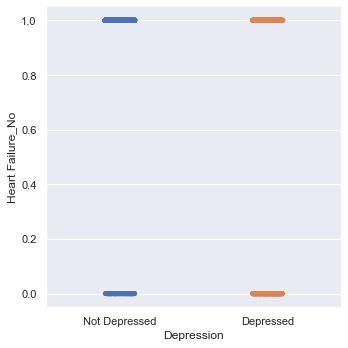

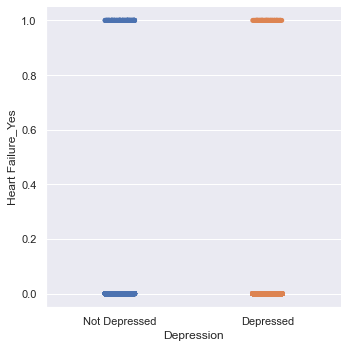

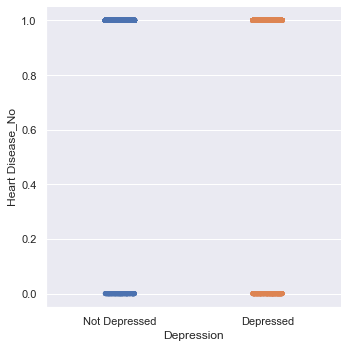

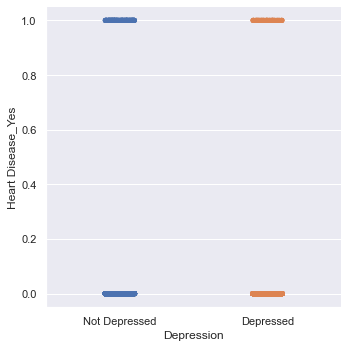

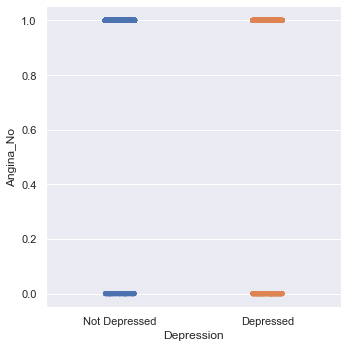

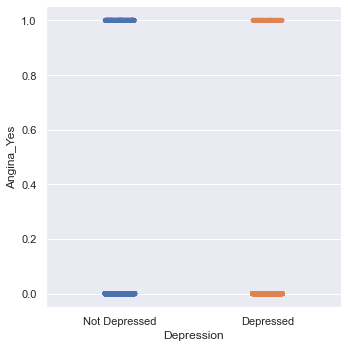

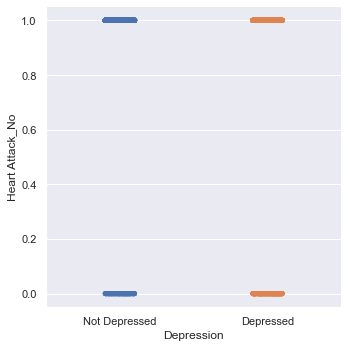

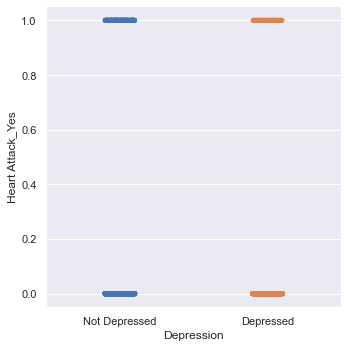

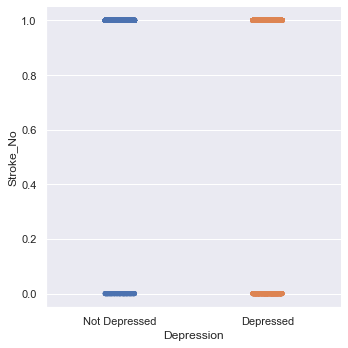

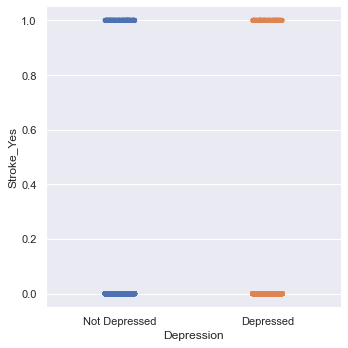

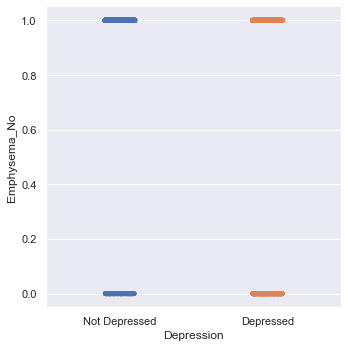

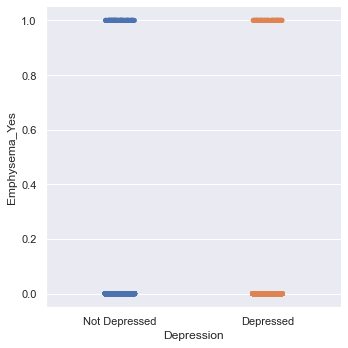

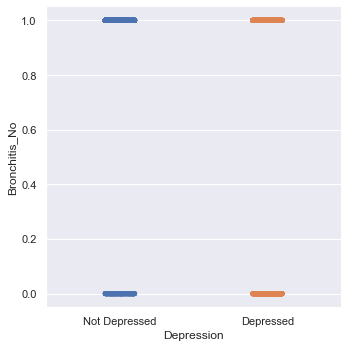

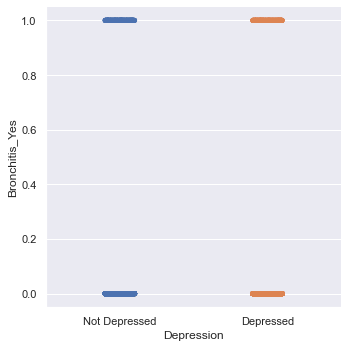

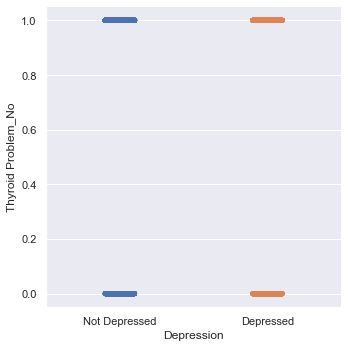

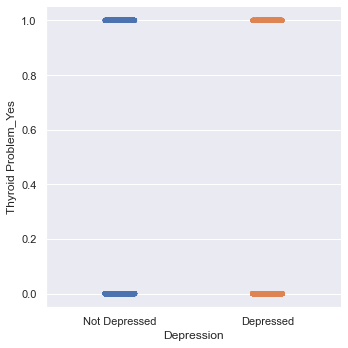

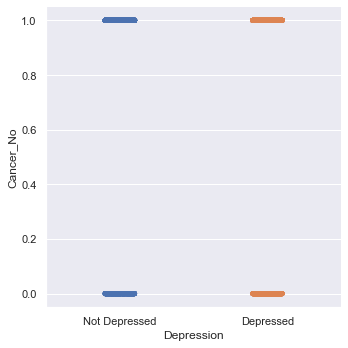

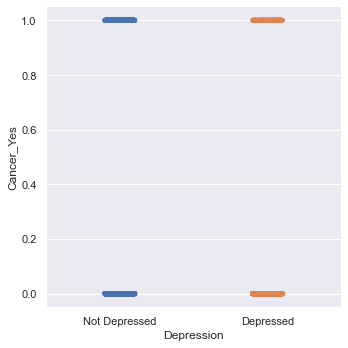

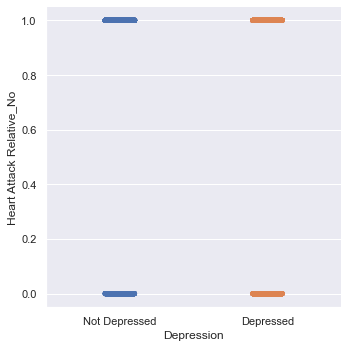

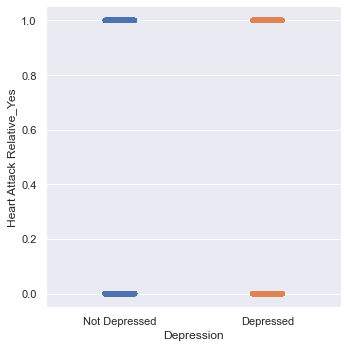

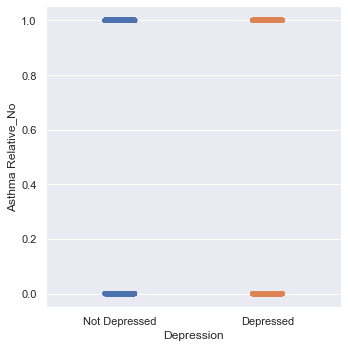

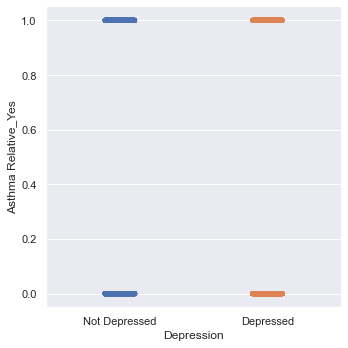

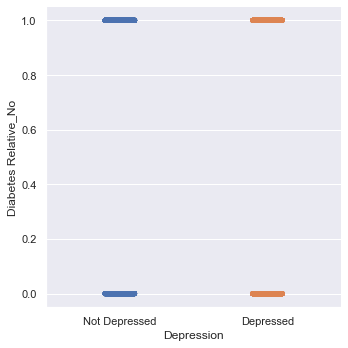

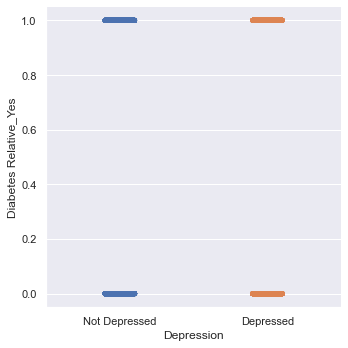

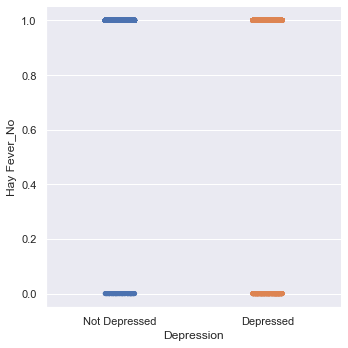

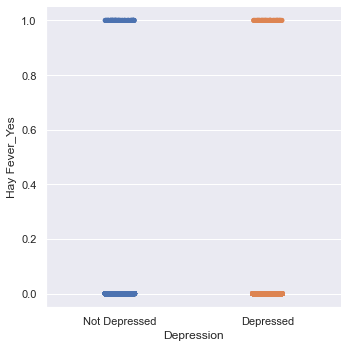

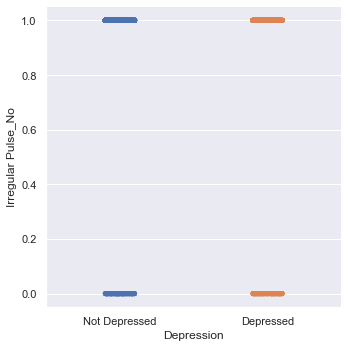

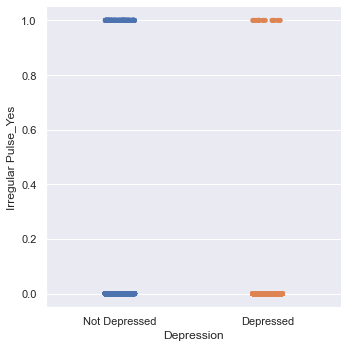

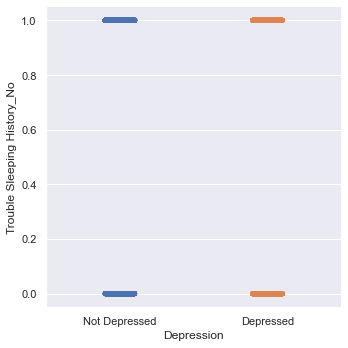

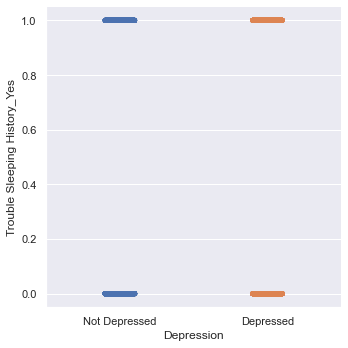

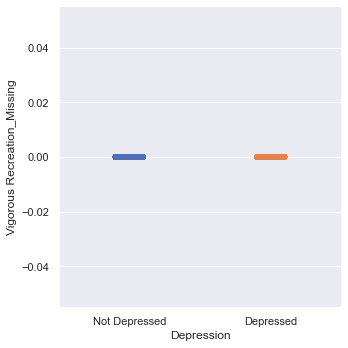

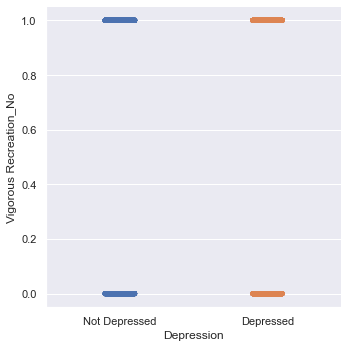

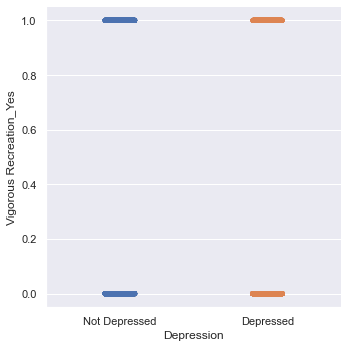

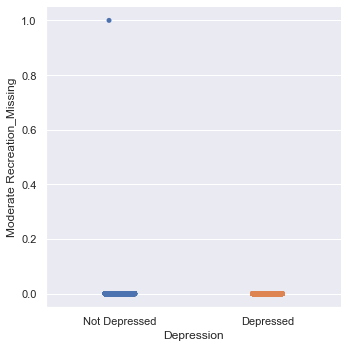

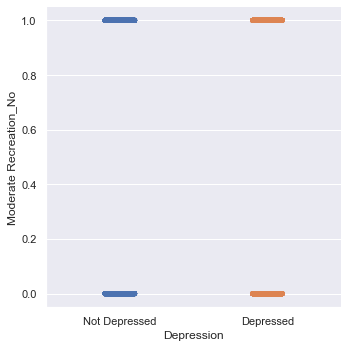

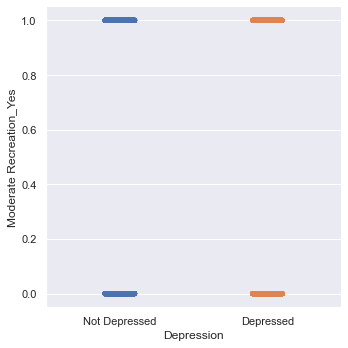

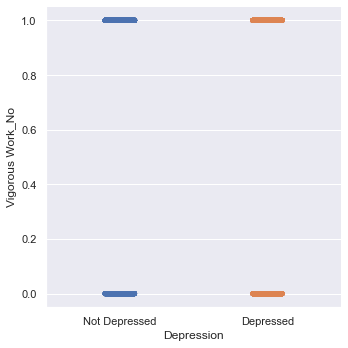

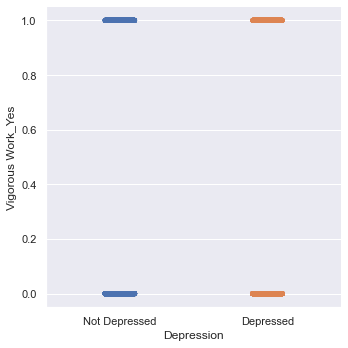

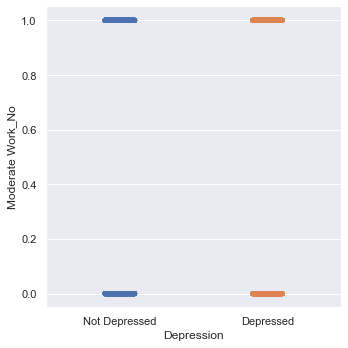

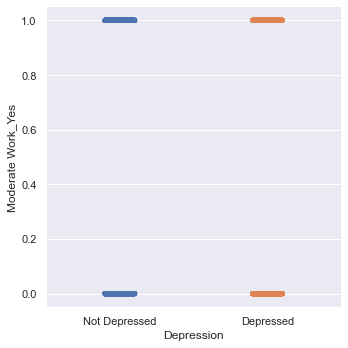

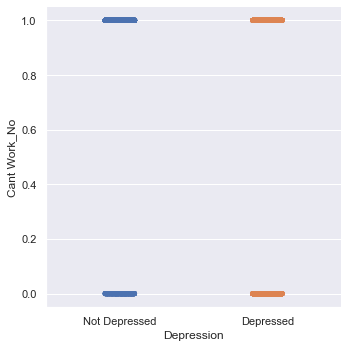

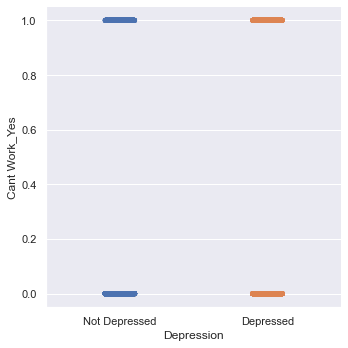

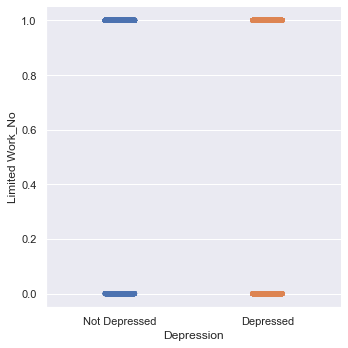

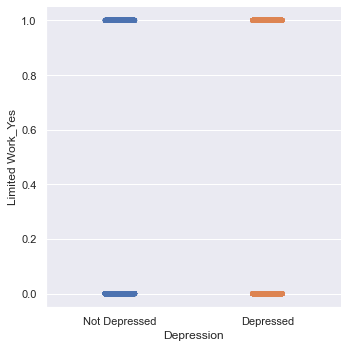

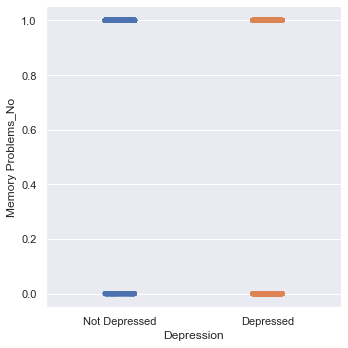

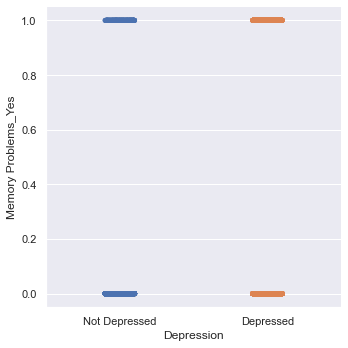

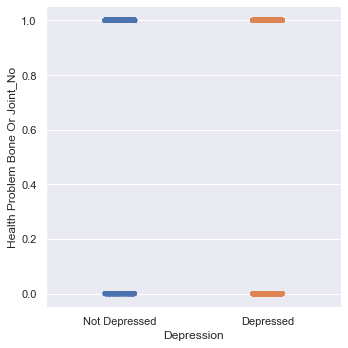

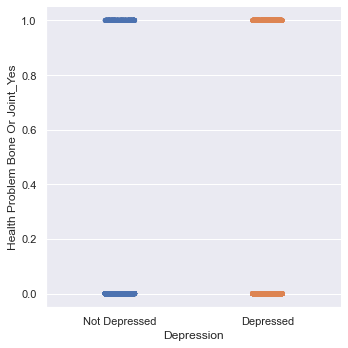

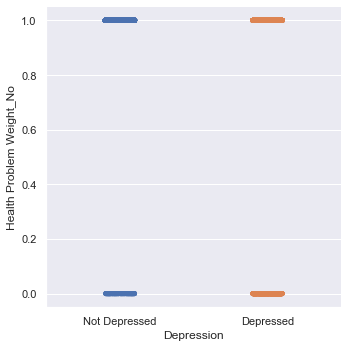

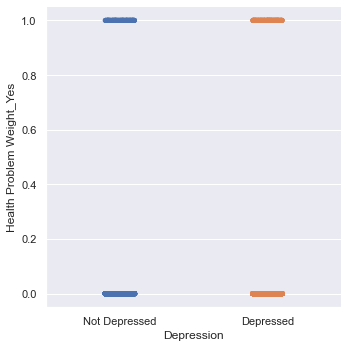

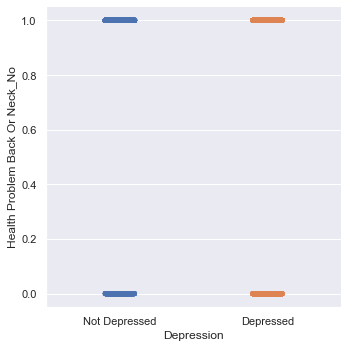

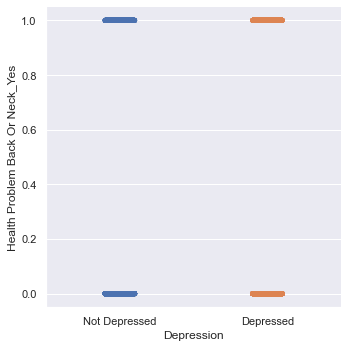

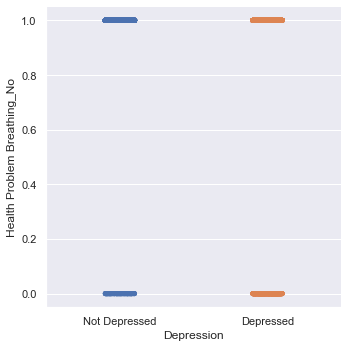

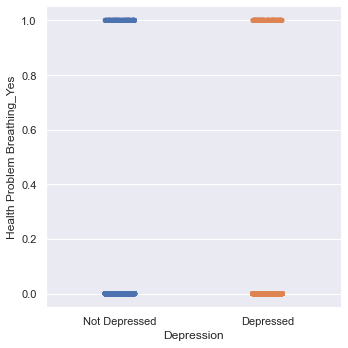

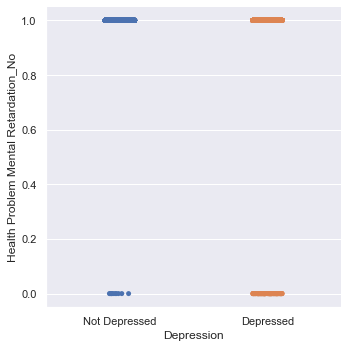

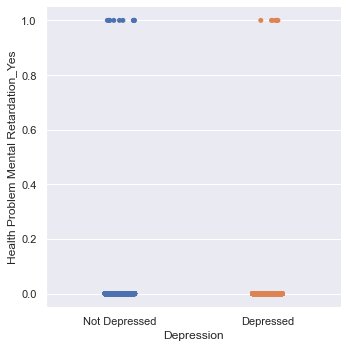

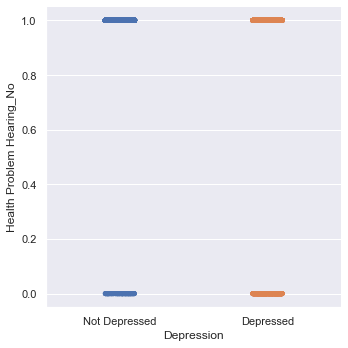

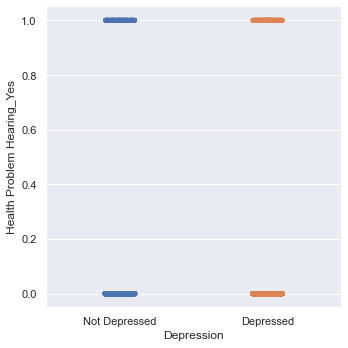

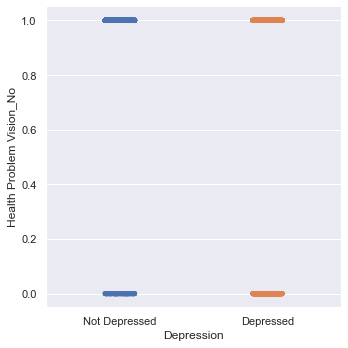

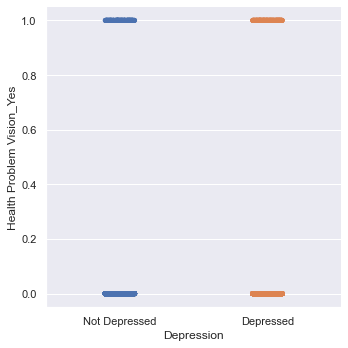

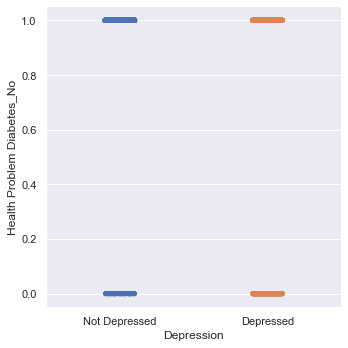

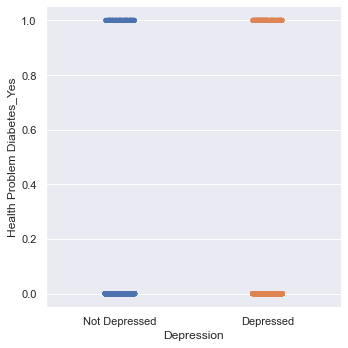

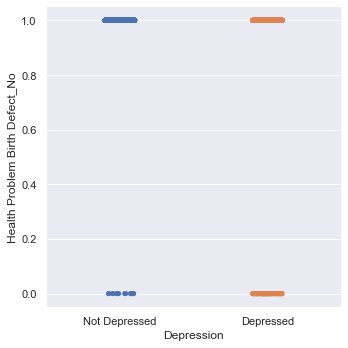

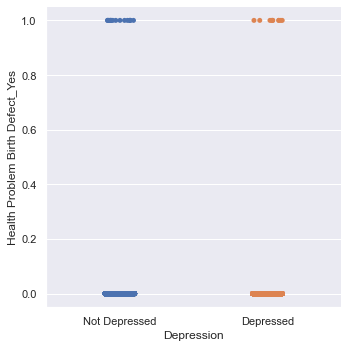

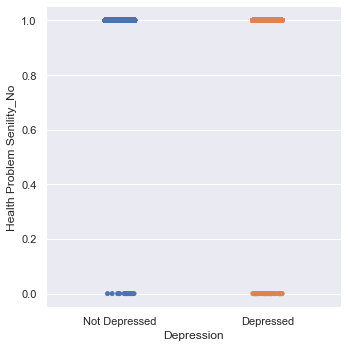

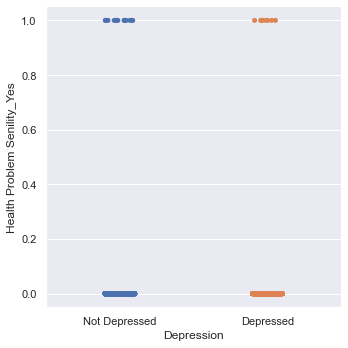

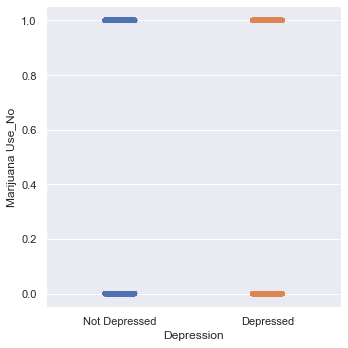

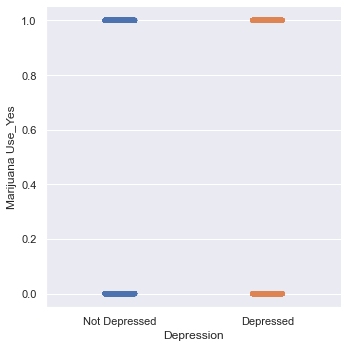

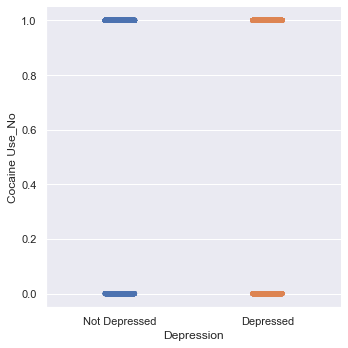

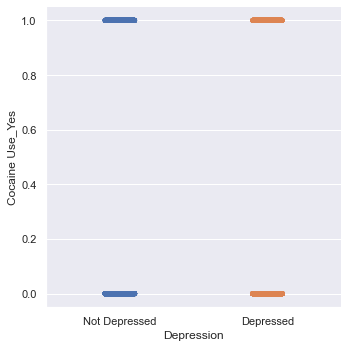

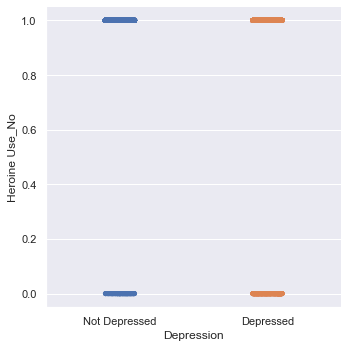

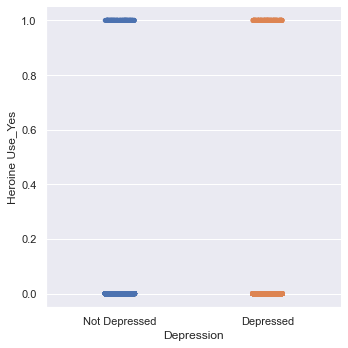

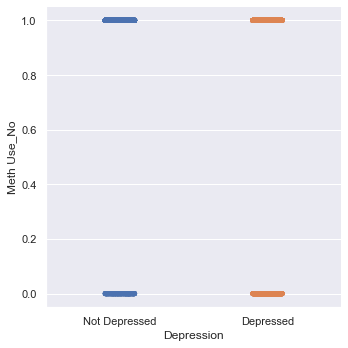

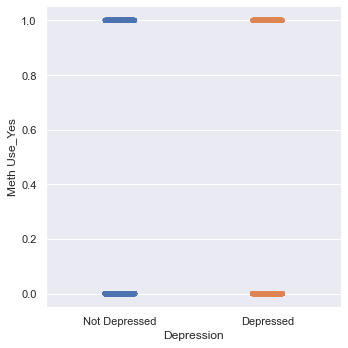

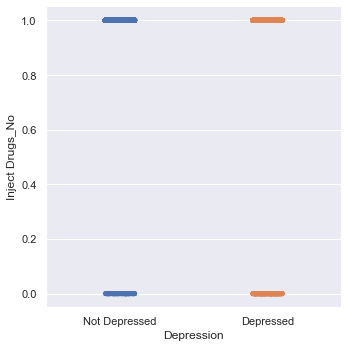

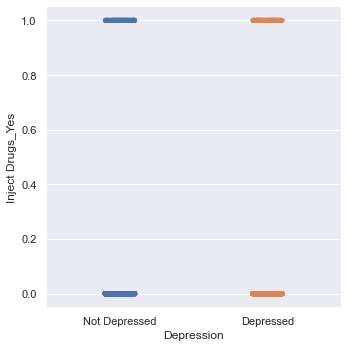

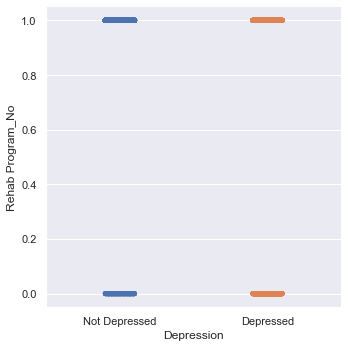

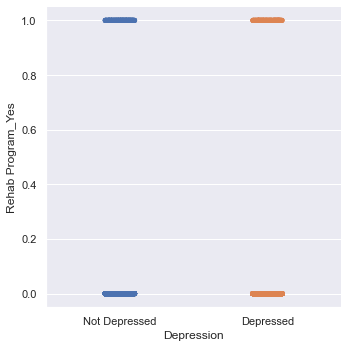

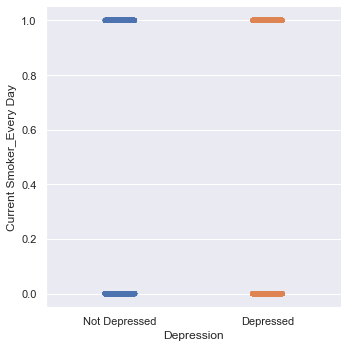

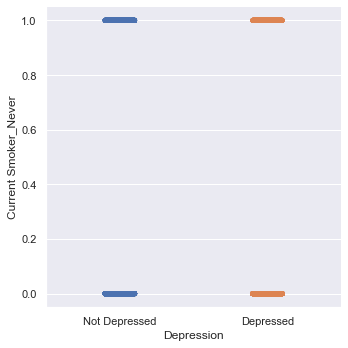

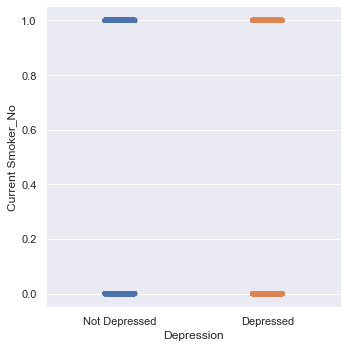

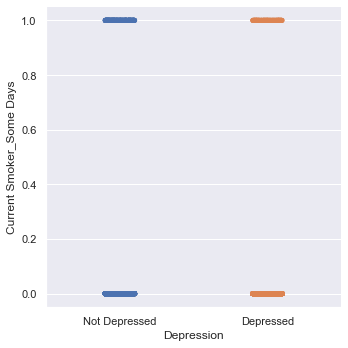

In [57]:
cols = X.select_dtypes([np.number]).columns
for i in cols:
    sns.catplot(x = "Depression", y = i , data = X);


# MODELLING

In [41]:
from fast_ml.model_development import train_valid_test_split
X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(X, target='Depression', train_size=0.8, valid_size=0.1, test_size=0.1,random_state=2)

## KNN

In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9049338146811071
               precision    recall  f1-score   support

    Depressed       0.84      1.00      0.91      1245
Not Depressed       1.00      0.81      0.90      1248

     accuracy                           0.90      2493
    macro avg       0.92      0.91      0.90      2493
 weighted avg       0.92      0.90      0.90      2493



### Grid Search

In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score


knn_params = {"n_neighbors": np.arange(1,11,2)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, knn_params, cv=10)
knn_cv.fit(X_valid, y_valid)
print("The best parameters: " + str(knn_cv.best_params_))

knn = KNeighborsClassifier(knn_cv.best_params_.get('n_neighbors'))
knn_tuned = knn.fit(X_train, y_train)
y_pred = knn_tuned.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
scores = cross_val_score(knn, X.drop("Depression",axis=1), X["Depression"], cv=10, scoring='accuracy')
print(scores.mean())

The best parameters: {'n_neighbors': 1}
0.9390292819895708
               precision    recall  f1-score   support

    Depressed       0.89      1.00      0.94      1245
Not Depressed       1.00      0.88      0.94      1248

     accuracy                           0.94      2493
    macro avg       0.95      0.94      0.94      2493
 weighted avg       0.95      0.94      0.94      2493

0.9458038849066309


## SVC

In [56]:
from sklearn.svm import SVC

X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(X, target = 'Depression', random_state=2,train_size=0.8, valid_size=0.1, test_size=0.1)
svc= SVC()
scv_model = svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9663056558363418
               precision    recall  f1-score   support

    Depressed       1.00      0.93      0.97      1245
Not Depressed       0.94      1.00      0.97      1248

     accuracy                           0.97      2493
    macro avg       0.97      0.97      0.97      2493
 weighted avg       0.97      0.97      0.97      2493



In [64]:
##TRAIN ACCURACY
##accuracy_score(y_train, scv_model.predict(X_train))

In [50]:
svc_params= {'C': [0.1, 1, 10, 100, 1000],
               'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf', 'poly', 'sigmoid'],
              'degree':[1,2,3,4,5,6]
}
svc = SVC()
svc_cv = GridSearchCV(svc, svc_params, cv=10, n_jobs =-1 , verbose = 2)
svc_cv.fit(X_valid, y_valid)
print("Best params: " + str(svc_cv.best_params_))

svc = SVC(C=svc_cv.best_params_.get('C'), gamma = svc_cv.best_params_.get('gamma'),kernel=svc_cv.best_params_.get('kernel'),degree=svc_cv.best_params_.get('degree'),)
svc_cv_tuned = svc.fit(X_train, y_train)
y_pred = svc_cv_tuned.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
scores = cross_val_score(svc, X.drop(["Depression"],axis=1), X["Depression"], cv=10, scoring='accuracy')
print(scores.mean())

Fitting 10 folds for each of 450 candidates, totalling 4500 fits
Best params: {'C': 10, 'degree': 3, 'gamma': 0.01, 'kernel': 'poly'}
0.9659045326915363
               precision    recall  f1-score   support

    Depressed       0.99      0.94      0.96      1245
Not Depressed       0.94      0.99      0.97      1248

     accuracy                           0.97      2493
    macro avg       0.97      0.97      0.97      2493
 weighted avg       0.97      0.97      0.97      2493

0.9589245070788899


## NAIVE BAYES

In [66]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(X, target = 'Depression', random_state=2,train_size=0.8, valid_size=0.1, test_size=0.1)
n_bayes = GaussianNB()
n_bayes_model = n_bayes.fit(X_train, y_train)
y_pred = n_bayes_model.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7769755314881669
               precision    recall  f1-score   support

    Depressed       0.86      0.66      0.75      1245
Not Depressed       0.72      0.90      0.80      1248

     accuracy                           0.78      2493
    macro avg       0.79      0.78      0.77      2493
 weighted avg       0.79      0.78      0.77      2493



### Grid Search

In [67]:
from sklearn.model_selection import GridSearchCV, cross_val_score

n_bayes_params = {'var_smoothing': np.logspace(0,-9, num=100)}
n_bayes = GaussianNB()
n_bayes_cv =  GridSearchCV(n_bayes, n_bayes_params, cv=10, n_jobs =-1 , verbose = 2)
n_bayes_cv.fit(X_valid, y_valid)
print("Best params: " + str(n_bayes_cv.best_params_))
n_bayes_tuned = GaussianNB(var_smoothing = n_bayes_cv.best_params_.get('var_smoothing'))
n_bayes_tuned.fit(X_train, y_train)
y_pred = n_bayes_tuned.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
scores = cross_val_score(n_bayes_tuned, X.drop(["Depression"],axis=1), X["Depression"], cv=10, scoring='accuracy')
print(scores.mean())

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best params: {'var_smoothing': 0.08111308307896872}
0.771760930605696
               precision    recall  f1-score   support

    Depressed       0.83      0.68      0.75      1245
Not Depressed       0.73      0.86      0.79      1248

     accuracy                           0.77      2493
    macro avg       0.78      0.77      0.77      2493
 weighted avg       0.78      0.77      0.77      2493

0.7796849155162545


## RANDOM FOREST

In [68]:
from sklearn.ensemble import RandomForestClassifier

X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(X, target = 'Depression', train_size=0.8, valid_size=0.1, test_size=0.1,random_state=2)
rf_model = RandomForestClassifier().fit(X_train,y_train)
y_pred = rf_model.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9783393501805054
               precision    recall  f1-score   support

    Depressed       0.98      0.98      0.98      1245
Not Depressed       0.98      0.98      0.98      1248

     accuracy                           0.98      2493
    macro avg       0.98      0.98      0.98      2493
 weighted avg       0.98      0.98      0.98      2493



### Grid Search

In [69]:
from sklearn.model_selection import GridSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,4,5,8,10]
# Minimum number of samples required to split a node
min_samples_split = [2, 5,10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the param grid
rf_params = {'n_estimators': n_estimators,
            "criterion" : ["gini","entropy"],
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf_model = RandomForestClassifier()
rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv = 10, 
                           n_jobs = -1, 
                           verbose = 2) 
rf_cv_model.fit(X_valid, y_valid)
print("Best params: " + str(rf_cv_model.best_params_))



Fitting 10 folds for each of 2400 candidates, totalling 24000 fits
Best params: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 452}


In [70]:
rf_tuned = RandomForestClassifier(max_depth =rf_cv_model.best_params_.get('max_depth'),
                                 max_features= rf_cv_model.best_params_.get('max_features'),
                                 min_samples_split =rf_cv_model.best_params_.get('min_samples_split') ,
                                 n_estimators= rf_cv_model.best_params_.get('n_estimators'),
                                 min_samples_leaf= rf_cv_model.best_params_.get('min_samples_leaf'),
                                 criterion=rf_cv_model.best_params_.get('criterion'),
                                 bootstrap=rf_cv_model.best_params_.get('bootstrap'))
rf_tuned.fit(X_train,y_train)
y_pred = rf_tuned.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9422382671480144
               precision    recall  f1-score   support

    Depressed       0.94      0.94      0.94      1245
Not Depressed       0.94      0.94      0.94      1248

     accuracy                           0.94      2493
    macro avg       0.94      0.94      0.94      2493
 weighted avg       0.94      0.94      0.94      2493



## NEURAL NETWORK

In [84]:
from sklearn.neural_network import MLPClassifier

X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(X, target = 'Depression', train_size=0.8, valid_size=0.1, test_size=0.1,random_state=2)
mlpc = MLPClassifier().fit(X_train, y_train)
y_pred = mlpc.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.946249498596069
               precision    recall  f1-score   support

    Depressed       0.95      0.94      0.95      1245
Not Depressed       0.94      0.95      0.95      1248

     accuracy                           0.95      2493
    macro avg       0.95      0.95      0.95      2493
 weighted avg       0.95      0.95      0.95      2493



### Grid Search

In [86]:
mlpc_params = {
"alpha": [0.1, 0.01, 0.02, 0.005, 0.0001,0.00001],
"hidden_layer_sizes": [(10,10,10),
                                     (100,100,100),
                                     (100,100),
                                     (3,5), 
                                     (5, 3)],
"solver" : ["lbfgs","adam","sgd"],
"activation": ["relu","logistic"]
}
mlpc = MLPClassifier()
mlpc_cv_model = GridSearchCV(mlpc, mlpc_params, 
                         cv = 10, 
                         n_jobs = -1,
                         verbose = 2)
mlpc_cv_model.fit(X_valid, y_valid)
print("Best params: " + str(mlpc_cv_model.best_params_))


Fitting 10 folds for each of 180 candidates, totalling 1800 fits
Best params: {'activation': 'logistic', 'alpha': 0.1, 'hidden_layer_sizes': (100, 100, 100), 'solver': 'adam'}


TypeError: '<=' not supported between instances of 'NoneType' and 'int'

In [89]:
mlpc = MLPClassifier()
mlpc_tuned = MLPClassifier(activation = mlpc_cv_model.best_params_.get("activation"),
                          alpha = mlpc_cv_model.best_params_.get("alpha"),
                          hidden_layer_sizes =mlpc_cv_model.best_params_.get("hidden_layer_sizes"),
                          solver = mlpc_cv_model.best_params_.get("solver"))
mlpc_tuned.fit(X_train, y_train)
y_pred = mlpc_tuned.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
scores = cross_val_score(mlpc, X.drop("Depression",axis=1), X["Depression"], cv=10, scoring='accuracy')
print(scores.mean())

0.9655034095467309
               precision    recall  f1-score   support

    Depressed       0.99      0.94      0.96      1245
Not Depressed       0.94      0.99      0.97      1248

     accuracy                           0.97      2493
    macro avg       0.97      0.97      0.97      2493
 weighted avg       0.97      0.97      0.97      2493

0.9376624049746998


## GBM

In [74]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingRegressor


In [90]:
X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(X, target = 'Depression', train_size=0.8, valid_size=0.1, test_size=0.1,random_state=2)


gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train, y_train)

y_pred = gbm_model.predict(X_test)

acc=accuracy_score(y_test,y_pred)
print("Accuracy: ",acc)

classification_report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", classification_report)



Accuracy:  0.9610910549538708

Classification Report:
                precision    recall  f1-score   support

    Depressed       0.98      0.94      0.96      1245
Not Depressed       0.94      0.98      0.96      1248

     accuracy                           0.96      2493
    macro avg       0.96      0.96      0.96      2493
 weighted avg       0.96      0.96      0.96      2493



### Grid Search

In [91]:
from sklearn.model_selection import GridSearchCV

gbm_params = {
    'learning_rate': [ 0.01, 0.1],
    'max_depth': [5,50],
    'n_estimators': [100, 500],
    'subsample': [1,0.5],
}

gbm = GradientBoostingClassifier()
gbm_cv = GridSearchCV(gbm, gbm_params, cv = 10, n_jobs = -1, verbose = 2)
gbm_cv.fit(X_train, y_train)

print("Best params: ",gbm_cv.best_params_)



Fitting 10 folds for each of 16 candidates, totalling 160 fits
Best params:  {'learning_rate': 0.01, 'max_depth': 50, 'n_estimators': 500, 'subsample': 0.5}


TypeError: 'str' object is not callable

In [102]:
gbm_tuned  = GradientBoostingClassifier(learning_rate = gbm_cv.best_params_.get('learning_rate'),  
                                      max_depth = gbm_cv.best_params_.get('max_depth'), 
                                      n_estimators = gbm_cv.best_params_.get('n_estimators'), 
                                      subsample = gbm_cv.best_params_.get('subsample'))
gbm_tuned.fit(X_train,y_train)

y_pred = gbm_tuned.predict(X_test)
acc= accuracy_score(y_test,y_pred)


In [103]:
print("Accuracy:  ",acc)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
scores = cross_val_score(gbm, X.drop(["Depression"],axis=1), X["Depression"], cv=10, scoring='accuracy')
print("Score:     ",scores.mean())



Accuracy:   0.9739269955876454

Classification Report:
                precision    recall  f1-score   support

    Depressed       0.98      0.96      0.97      1245
Not Depressed       0.96      0.98      0.97      1248

     accuracy                           0.97      2493
    macro avg       0.97      0.97      0.97      2493
 weighted avg       0.97      0.97      0.97      2493

Score:      0.9676285895853493


## XGBoost

In [77]:
!pip install xgboost

In [99]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(X, target = 'Depression', train_size=0.8, valid_size=0.1, test_size=0.1,random_state=2)

xgb_model = XGBClassifier().fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
acc=accuracy_score(y_test,y_pred)
print("Accuracy:  ",acc)

print("\nClassification Report:\n", classification_report(y_test, y_pred))


[09:08:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy:   0.9643000401123145

Classification Report:
                precision    recall  f1-score   support

    Depressed       0.98      0.95      0.96      1245
Not Depressed       0.95      0.98      0.97      1248

     accuracy                           0.96      2493
    macro avg       0.96      0.96      0.96      2493
 weighted avg       0.96      0.96      0.96      2493



### Grid Search

In [100]:
xgb_params = {
        'n_estimators': [100, 1000],
        'subsample': [0.5, 1.0],
        'max_depth': [3, 7],
        'learning_rate': [0.1,0.01],
        "min_samples_split": [2,10]}
xgb = XGBClassifier()
xgb_cv = GridSearchCV(xgb, xgb_params, cv = 10, n_jobs = -1, verbose = 2)
xgb_cv.fit(X_train, y_train)
print("Best params: ",xgb_cv.best_params_)



Fitting 10 folds for each of 32 candidates, totalling 320 fits
[12:39:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:39:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best params:  {'learning_rate': 0.1, 'max_depth': 7, 'min_samples_split': 2, 'n_estimators': 1000, 'subsample': 1.0}


In [101]:
xgb = XGBClassifier(learning_rate= xgb_cv.best_params_.get('learning_rate'),
                   max_depth= xgb_cv.best_params_.get('max_depth'),
                   min_samples_split= xgb_cv.best_params_.get('min_samples_split'),
                   n_estimators= xgb_cv.best_params_.get('n_estimators'),
                   subsample= xgb_cv.best_params_.get('subsample'))

xgb_tuned = xgb.fit(X_train, y_train)

y_pred = xgb_tuned.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
scores = cross_val_score(xgb_tuned, X.drop("Depression",axis=1), X["Depression"], cv=10, scoring='accuracy')
print(scores.mean())

[12:59:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:59:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.968311271560369
               precision    recall  f1-score   support

    Depressed       0.99      0.95      0.97      1245
Not Depressed       0.95      0.99      0.97      1248

     accuracy                           0.97      2493
    macro avg       0.97